In [239]:
import geopandas as gpd
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

# **1. IBTRACS**

In [240]:
tc_points = gpd.read_file("IBTrACS.WP.list.v04r01.points.shp")
lines = gpd.read_file("IBTrACS.WP.list.v04r01.lines.shp")

tc_points = tc_points.to_crs(epsg=4326)

# **1.1 1950-2014**

In [241]:
tc_points1 = tc_points[(tc_points['SEASON'] >= 1950) & (tc_points['SEASON'] <= 2014)]


Average number of tropical cyclone in West Pacific Basin per year by category:
Tropical Depression + Tropical Storm: 11.43
Category 1-2: 7.66
Category 3-5: 9.51
Number of unique tropical cyclones in West Pacific Basin by category:
Tropical Depression + Tropical Storm: 743
Category 1-2: 498
Category 3-5: 618


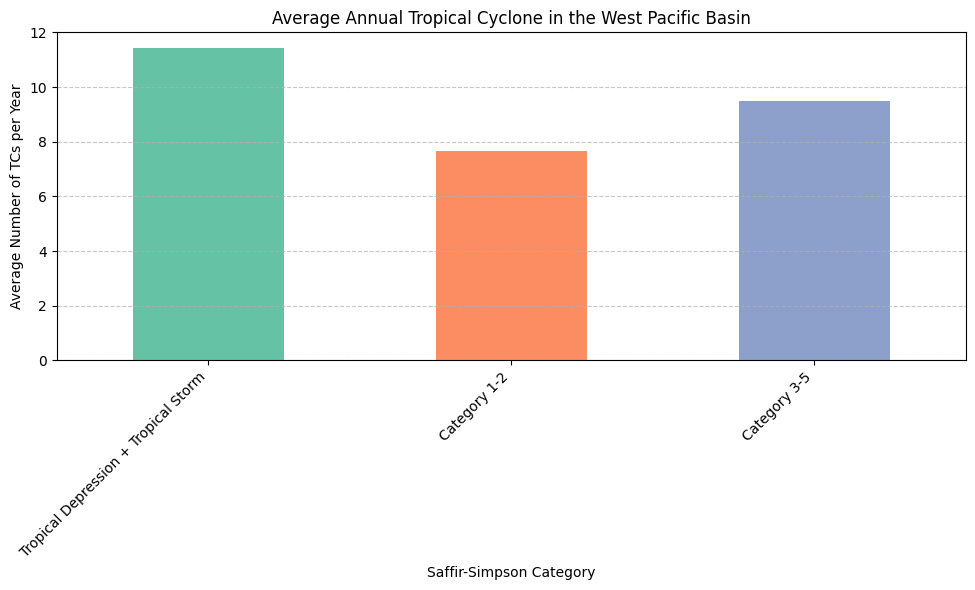

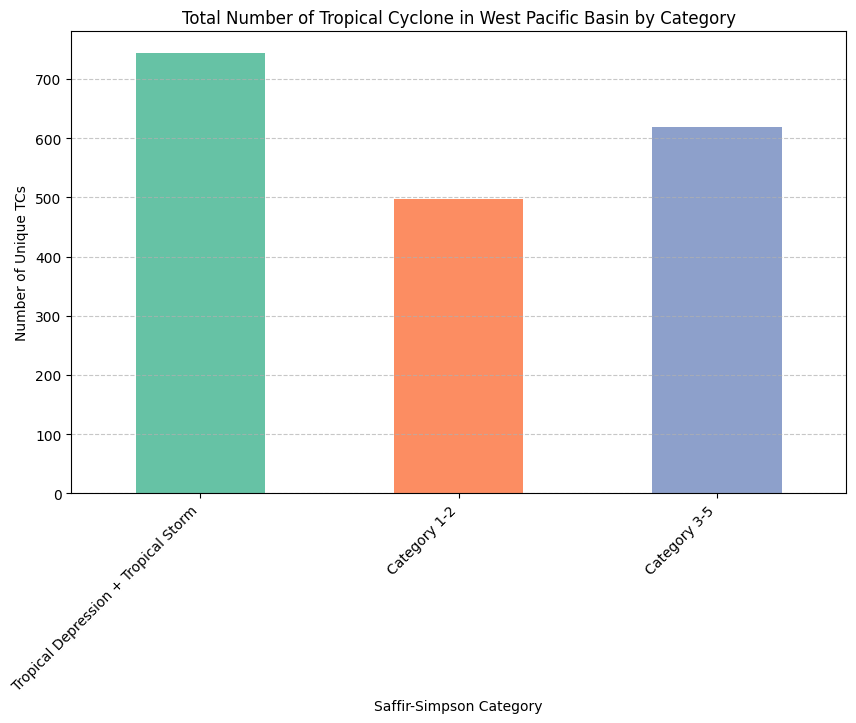

In [242]:
def categorize_tc(wind_speed):
    # Check for null or empty values
    if wind_speed is None or wind_speed == '' or (isinstance(wind_speed, float) and wind_speed != wind_speed):  # Handles None, empty string, and NaN
        return None
    # Categorize in reverse order
    if wind_speed >= 96:
        return "Category 3-5"
    elif wind_speed >= 64:
        return "Category 1-2"
    else:  # wind_speed < 64
        return "Tropical Depression + Tropical Storm"

tc_points1['category'] = tc_points1['USA_WIND'].apply(categorize_tc)


# For each TC, find the maximum wind speed to assign a single category
tc_max_wind = tc_points1.groupby('SID').agg({
    'USA_WIND': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['USA_WIND'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts1 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year1 = landfall_counts1 / total_years
print("\nAverage number of tropical cyclone in West Pacific Basin per year by category:")
for category, avg in avg_tcs_per_year1.items():
    print(f"{category}: {avg:.2f}")

# Print results
print("Number of unique tropical cyclones in West Pacific Basin by category:")
for category, count in landfall_counts1.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year1.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts1.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Total Number of Tropical Cyclone in West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [243]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("IBTRACS", landfall_counts1, avg_tcs_per_year1)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of IBTRACS.csv', index=False)
print("\nData saved to 'Result of IBTRACS.csv'")


Data saved to 'Result of IBTRACS.csv'


In [244]:
avg_tcs_per_year1

category
Tropical Depression + Tropical Storm    11.430769
Category 1-2                             7.661538
Category 3-5                             9.507692
Name: count, dtype: float64

# **1.2 1980-2014**

In [245]:
tc_pointsA = tc_points[(tc_points['SEASON'] >= 1980) & (tc_points['SEASON'] <= 2014)]


Average number of tropical cyclone in West Pacific Basin per year by category:
Tropical Depression + Tropical Storm: 13.83
Category 1-2: 7.66
Category 3-5: 9.14
Number of unique tropical cyclones in West Pacific Basin by category:
Tropical Depression + Tropical Storm: 484
Category 1-2: 268
Category 3-5: 320


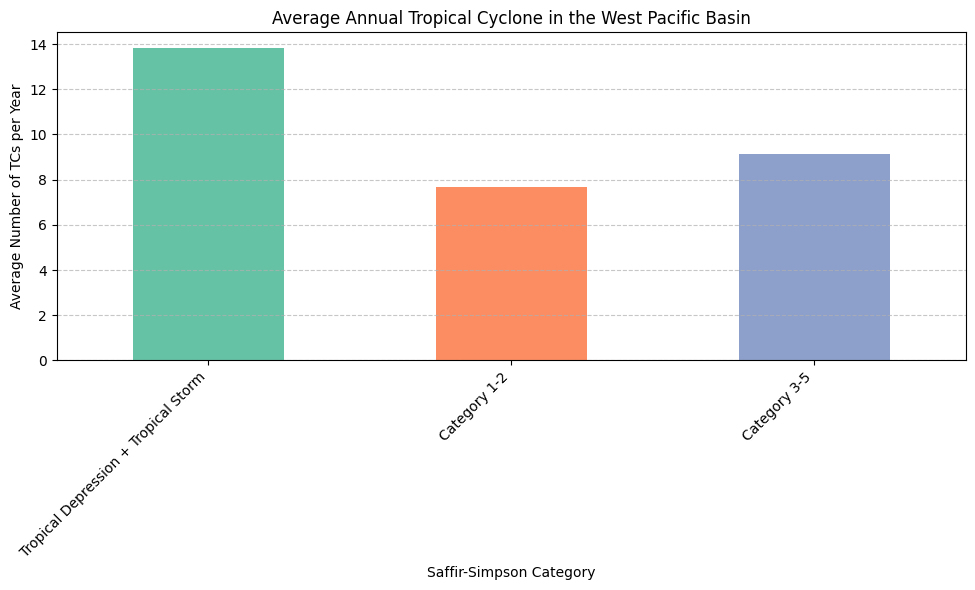

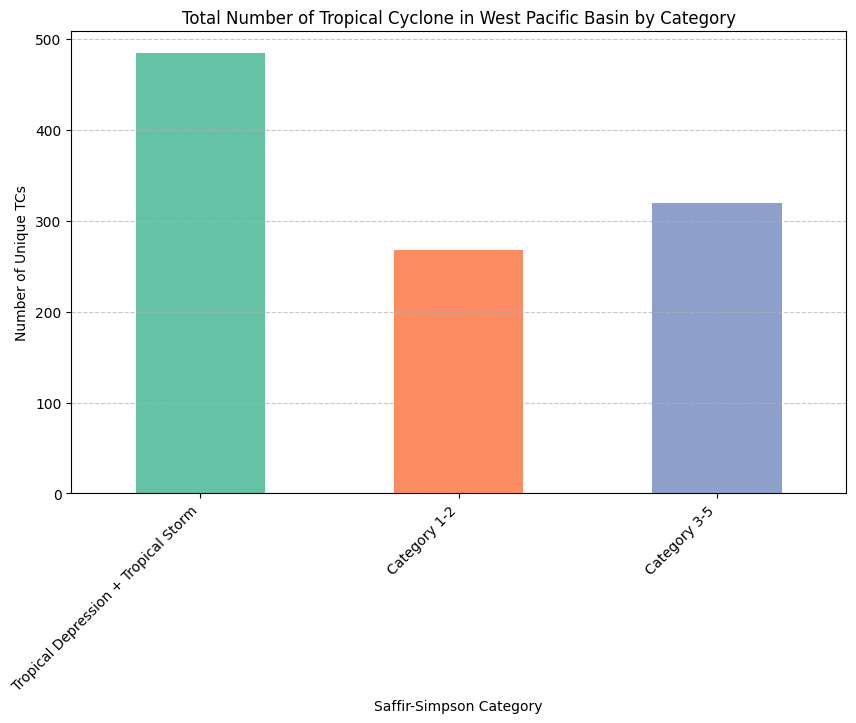

In [246]:
def categorize_tc(wind_speed):
    # Check for null or empty values
    if wind_speed is None or wind_speed == '' or (isinstance(wind_speed, float) and wind_speed != wind_speed):  # Handles None, empty string, and NaN
        return None
    # Categorize in reverse order
    if wind_speed >= 96:
        return "Category 3-5"
    elif wind_speed >= 64:
        return "Category 1-2"
    else:  # wind_speed < 64
        return "Tropical Depression + Tropical Storm"

tc_pointsA['category'] = tc_pointsA['USA_WIND'].apply(categorize_tc)

# For each TC, find the maximum wind speed to assign a single category
tc_max_wind = tc_pointsA.groupby('SID').agg({
    'USA_WIND': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['USA_WIND'].apply(categorize_tc)

# Count unique TCs in each category
landfall_countsA = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

total_years = 2014 - 1980 + 1
avg_tcs_per_yearA = landfall_countsA / total_years
print("\nAverage number of tropical cyclone in West Pacific Basin per year by category:")
for category, avg in avg_tcs_per_yearA.items():
    print(f"{category}: {avg:.2f}")

# Print results
print("Number of unique tropical cyclones in West Pacific Basin by category:")
for category, count in landfall_countsA.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_yearA.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_countsA.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Total Number of Tropical Cyclone in West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **1.3 1980-2024**

In [247]:
tc_pointsB = tc_points[(tc_points['SEASON'] >= 1980) & (tc_points['SEASON'] <= 2024)]


Average number of tropical cyclone in West Pacific Basin per year by category:
Tropical Depression + Tropical Storm: 13.96
Category 1-2: 7.27
Category 3-5: 9.11
Number of unique tropical cyclones in West Pacific Basin by category:
Tropical Depression + Tropical Storm: 628
Category 1-2: 327
Category 3-5: 410


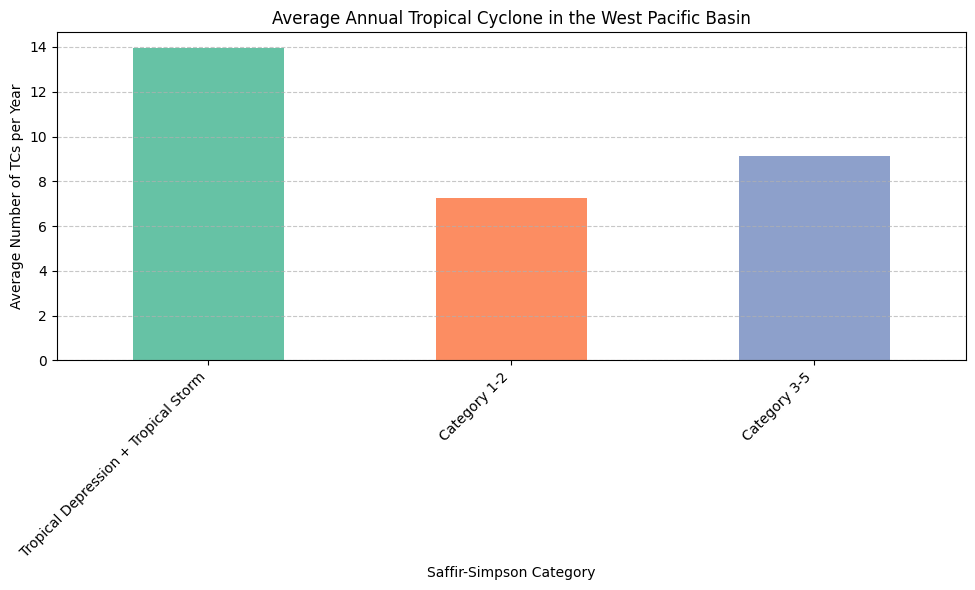

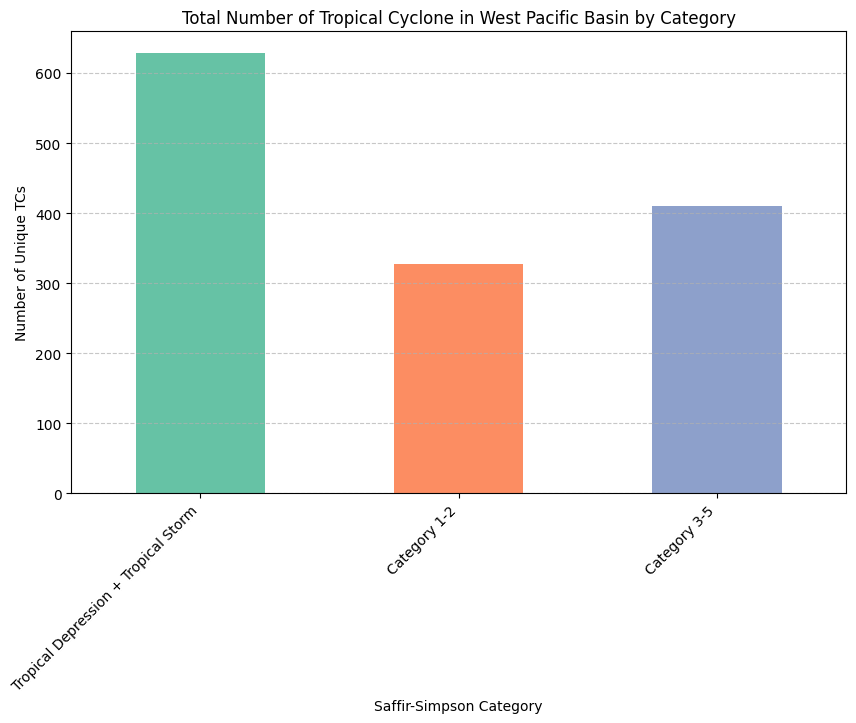

In [248]:
def categorize_tc(wind_speed):
    # Check for null or empty values
    if wind_speed is None or wind_speed == '' or (isinstance(wind_speed, float) and wind_speed != wind_speed):  # Handles None, empty string, and NaN
        return None
    # Categorize in reverse order
    if wind_speed >= 96:
        return "Category 3-5"
    elif wind_speed >= 64:
        return "Category 1-2"
    else:  # wind_speed < 64
        return "Tropical Depression + Tropical Storm"

tc_pointsB['category'] = tc_pointsB['USA_WIND'].apply(categorize_tc)

# For each TC, find the maximum wind speed to assign a single category
tc_max_wind = tc_pointsB.groupby('SID').agg({
    'USA_WIND': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['USA_WIND'].apply(categorize_tc)

# Count unique TCs in each category
landfall_countsB = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

total_years = 2024 - 1980 + 1
avg_tcs_per_yearB = landfall_countsB / total_years
print("\nAverage number of tropical cyclone in West Pacific Basin per year by category:")
for category, avg in avg_tcs_per_yearB.items():
    print(f"{category}: {avg:.2f}")

# Print results
print("Number of unique tropical cyclones in West Pacific Basin by category:")
for category, count in landfall_countsB.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_yearB.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_countsB.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Total Number of Tropical Cyclone in West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Compare above Result**

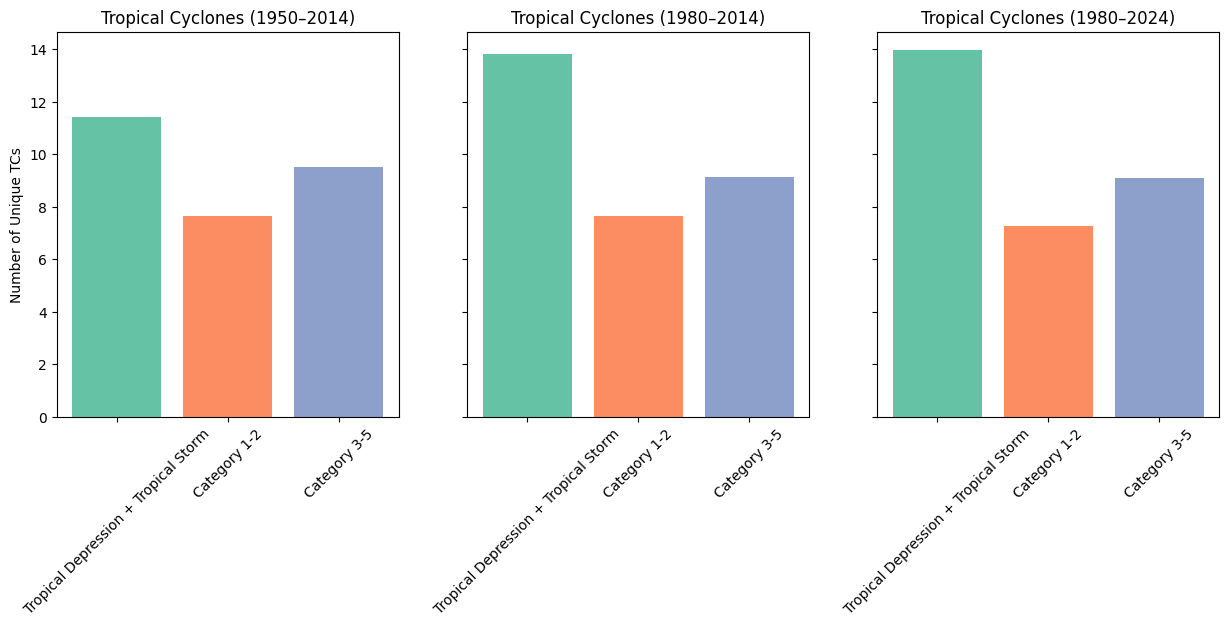

In [249]:
# Categories for plotting
categories = ["Tropical Depression + Tropical Storm", "Category 1-2", "Category 3-5"]

# Data for each time period
counts_1950_2014 = [avg_tcs_per_year1[cat] for cat in categories]
counts_1980_2014 = [avg_tcs_per_yearA[cat] for cat in categories]
counts_1980_2024 = [avg_tcs_per_yearB[cat] for cat in categories]

# Create three separate bar plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot for 1950–2014
ax1.bar(categories, counts_1950_2014, color=['#66c2a5', '#fc8d62', '#8da0cb'])
ax1.set_title('Tropical Cyclones (1950–2014)')
ax1.set_ylabel('Number of Unique TCs')
ax1.tick_params(axis='x', rotation=45)

# Plot for 1980–2014
ax2.bar(categories, counts_1980_2014, color=['#66c2a5', '#fc8d62', '#8da0cb'])
ax2.set_title('Tropical Cyclones (1980–2014)')
ax2.tick_params(axis='x', rotation=45)

# Plot for 1980–2024
ax3.bar(categories, counts_1980_2024, color=['#66c2a5', '#fc8d62', '#8da0cb'])
ax3.set_title('Tropical Cyclones (1980–2024)')
ax3.tick_params(axis='x', rotation=45)

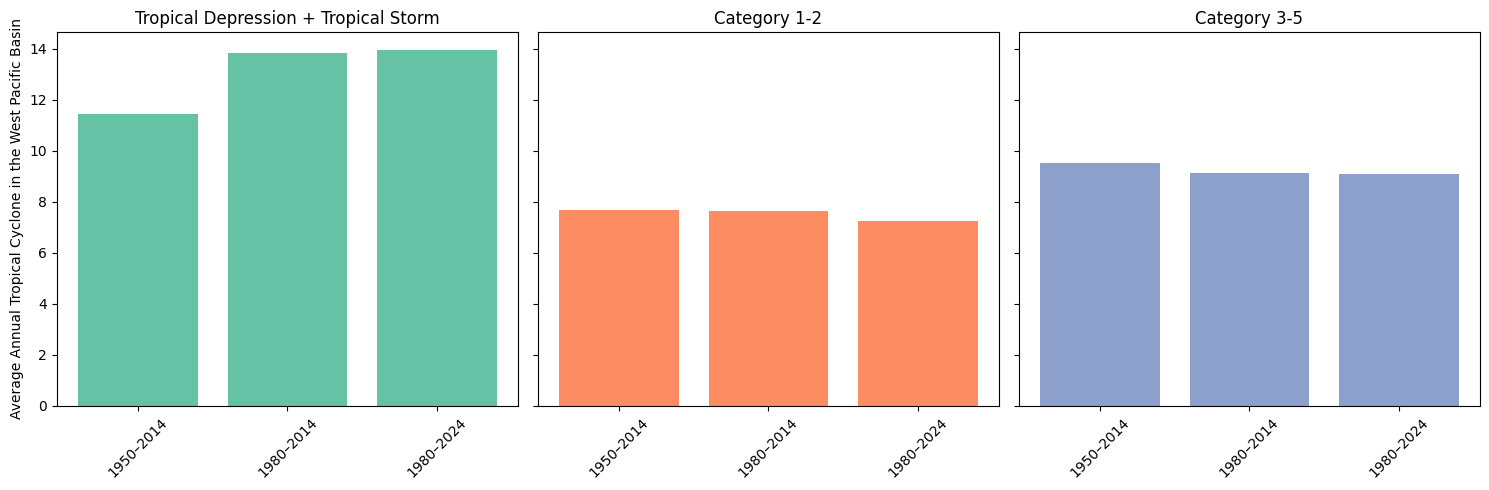

In [250]:
# Time periods for x-axis
time_periods = ["1950–2014", "1980–2014", "1980–2024"]

# Extract counts for each category across the three time periods
ts_td_counts = [
    avg_tcs_per_year1["Tropical Depression + Tropical Storm"],
    avg_tcs_per_yearA["Tropical Depression + Tropical Storm"],
    avg_tcs_per_yearB["Tropical Depression + Tropical Storm"]
]
cat1_2_counts = [
    avg_tcs_per_year1["Category 1-2"],
    avg_tcs_per_yearA["Category 1-2"],
    avg_tcs_per_yearB["Category 1-2"]
]
cat3_5_counts = [
    avg_tcs_per_year1["Category 3-5"],
    avg_tcs_per_yearA["Category 3-5"],
    avg_tcs_per_yearB["Category 3-5"]
]

# Create three separate bar plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot for Tropical Depression + Tropical Storm
ax1.bar(time_periods, ts_td_counts, color='#66c2a5')
ax1.set_title('Tropical Depression + Tropical Storm')
ax1.set_ylabel('Average Annual Tropical Cyclone in the West Pacific Basin')
ax1.tick_params(axis='x', rotation=45)

# Plot for Category 1-2
ax2.bar(time_periods, cat1_2_counts, color='#fc8d62')
ax2.set_title('Category 1-2')
ax2.tick_params(axis='x', rotation=45)

# Plot for Category 3-5
ax3.bar(time_periods, cat3_5_counts, color='#8da0cb')
ax3.set_title('Category 3-5')
ax3.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# **2.1 TempExt**

# **2.1.1 MPI-ESM1-2-XR**

# **highresSST-present**

In [251]:
# Define file paths
tc_shapefile = "MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)

In [252]:
tc_tracks

TRACK_ID        lat         lon    sfcWind          psl       time  \
0           10  14.461612  163.066193  12.323930  1010.213013 1950-07-02   
1           10  13.983235  161.853851   9.386438  1011.893005 1950-07-02   
2           10  12.796340  160.948029   8.412830  1007.478027 1950-07-02   
3           10  12.783008  159.565857   8.810930  1010.921021 1950-07-03   
4           10  12.516978  158.101654   9.304741  1010.151001 1950-07-03   
...        ...        ...         ...        ...          ...        ...   
4325      1262  20.008909  156.732605  11.040400  1005.711975 2012-10-11   
4326      1262  21.072060  157.080536   9.874936  1008.466003 2012-10-11   
4327      1262  22.195566  157.690002   9.606667  1006.804993 2012-10-11   
4328      1262  22.996050  158.506927   9.913074  1009.226013 2012-10-12   
4329      1262  24.538681  159.281647  11.812610  1007.905029 2012-10-12   

                                        experiment  Gust_1min  Category  \
0     MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn  15.774630         0   
1     MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn  12.014641         0   
2     MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn  10.768423         0   
3     MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn  11.277990         0   
4     MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn  11.910069         0   
...                                            ...        ...       ...   
4325  MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn  14.131711         0   
4326  MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn  12.639918         0   
4327  MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn  12.296533         0   
4328  MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn  12.688734         0   
4329  MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn  15.120140         0   

                        geometry  
0     POINT (163.06619 14.46161)  
1     POINT (161.85385 13.98324)  
2     POINT (160.94803 12.79634)  
3     POINT (159.56586 12.78301)  
4     POINT (158.10165 12.51698)  
...                          ...  
4325   POINT (156.7326 20.00891)  
4326  POINT (157.08054 21.07206)  
4327     POINT (157.69 22.19557)  
4328  POINT (158.50693 22.99605)  
4329  POINT (159.28165 24.53868)  

[4330 rows x 10 columns]


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 1.22
Category 1-2: 0.11
Category 3-5: 0.02
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 79
Category 1-2: 7
Category 3-5: 1


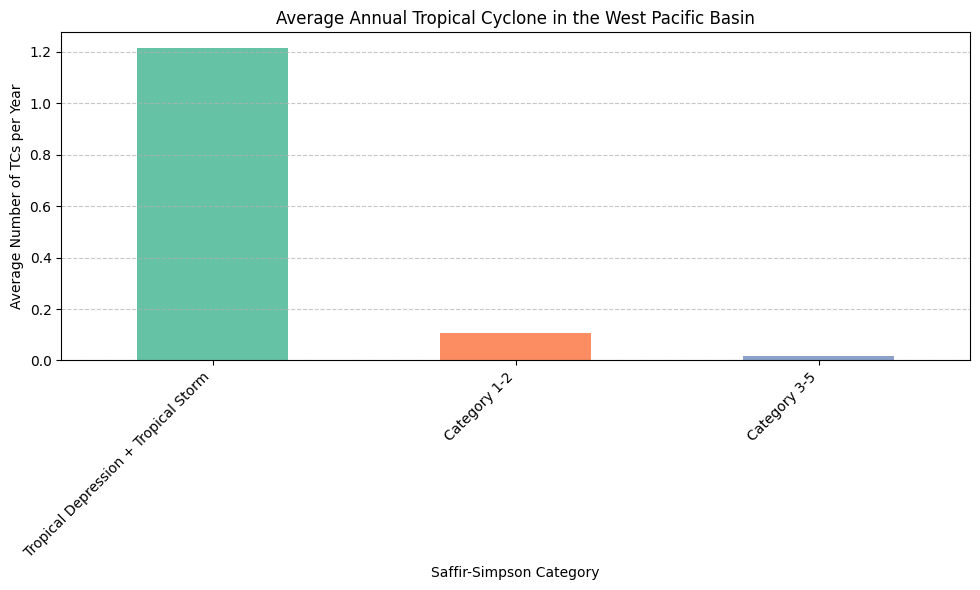

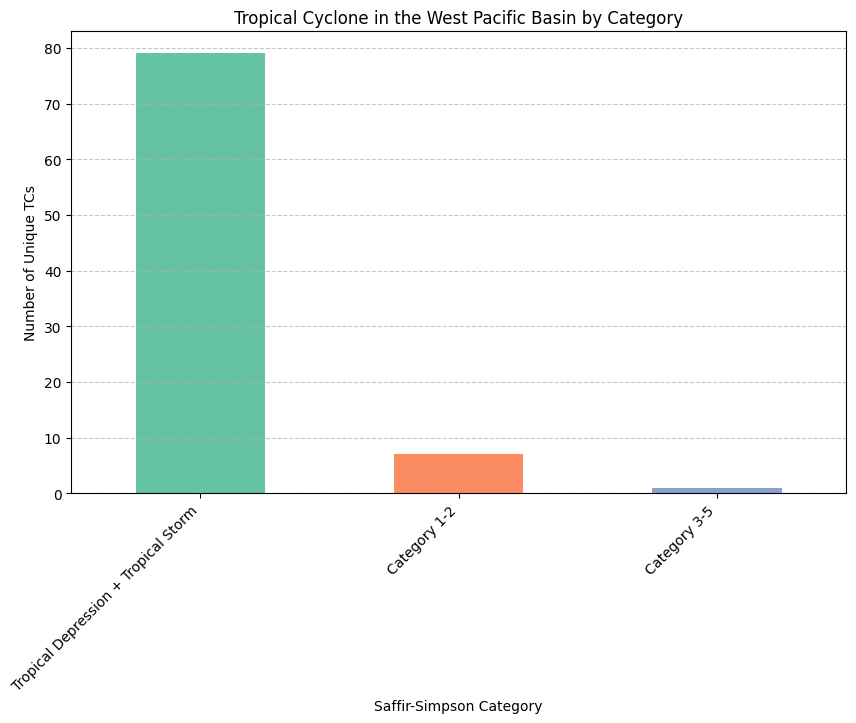

In [253]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts2 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs that make landfall
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year2 = landfall_counts2 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year2.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts2.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year2.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts2.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **hist-1950**

In [254]:
# Define file paths
tc_shapefile = "MPI-ESM1-2-XR_hist-1950_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 1.55
Category 1-2: 0.29
Category 3-5: 0.02
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 101
Category 1-2: 19
Category 3-5: 1


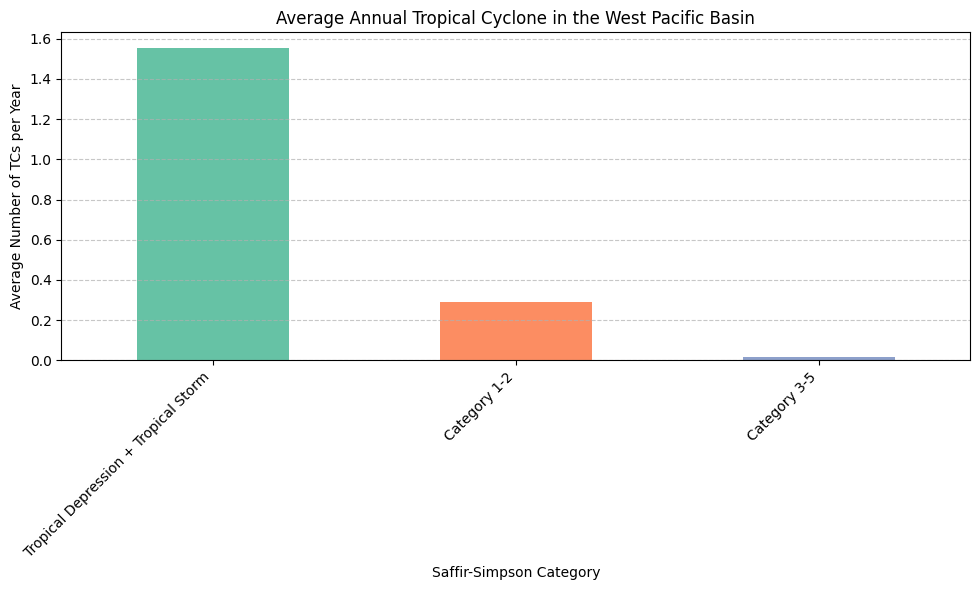

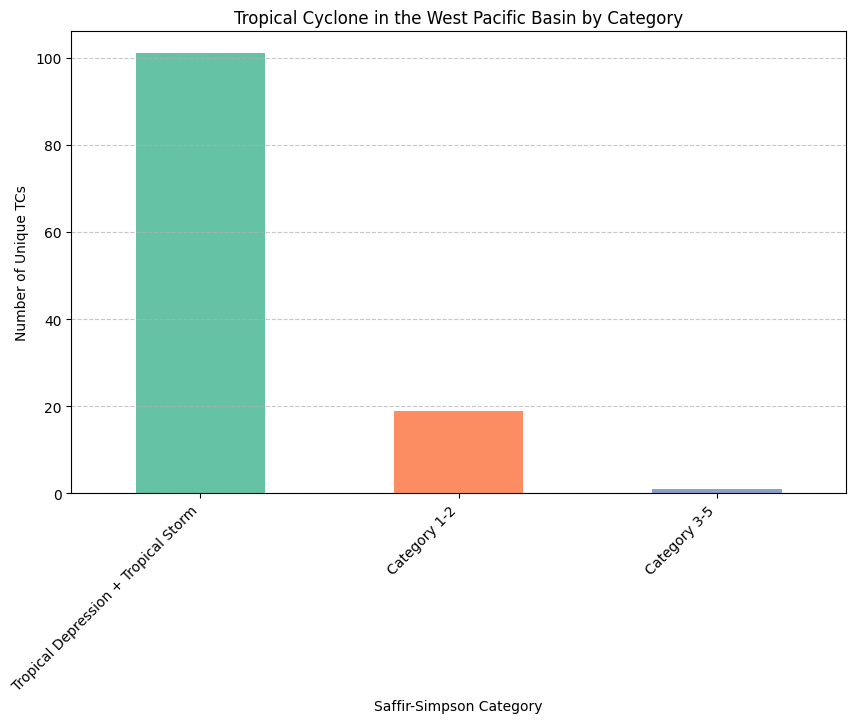

In [255]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts3 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year3 = landfall_counts3 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year3.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts3.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year3.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts3.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Result of MPI-ESM1-2-XR**

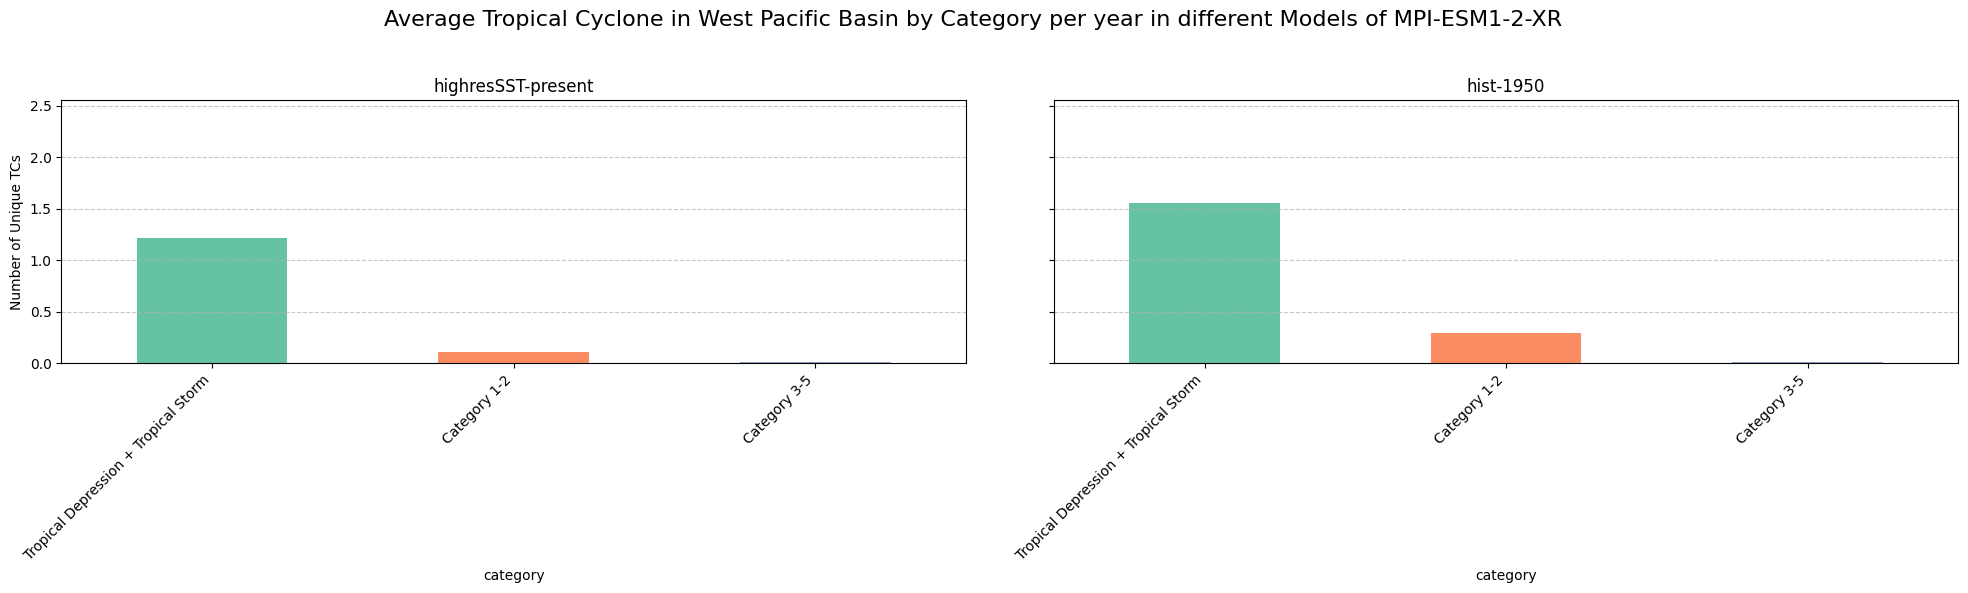

In [256]:
avg_landfall_counts_list = [
    (avg_tcs_per_year2, "highresSST-present"),
    (avg_tcs_per_year3, "hist-1950")
]

# Create subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in avg_landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(avg_landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average Tropical Cyclone in West Pacific Basin by Category per year in different Models of MPI-ESM1-2-XR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

In [257]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("highresSST-present", landfall_counts2, avg_tcs_per_year2),
    ("hist-1950", landfall_counts3, avg_tcs_per_year3)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of MPI-ESM1-2-XR.csv', index=False)
print("\nData saved to 'Result of MPI-ESM1-2-XR.csv'")


Data saved to 'Result of MPI-ESM1-2-XR.csv'


# **2.1.2 HadGem3-GC31-HH**

# **hist-1950**

In [258]:
# Define file paths
tc_shapefile = "HadGEM3-GC31-HH_hist-1950_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 8.31
Category 1-2: 3.43
Category 3-5: 0.71
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 540
Category 1-2: 223
Category 3-5: 46


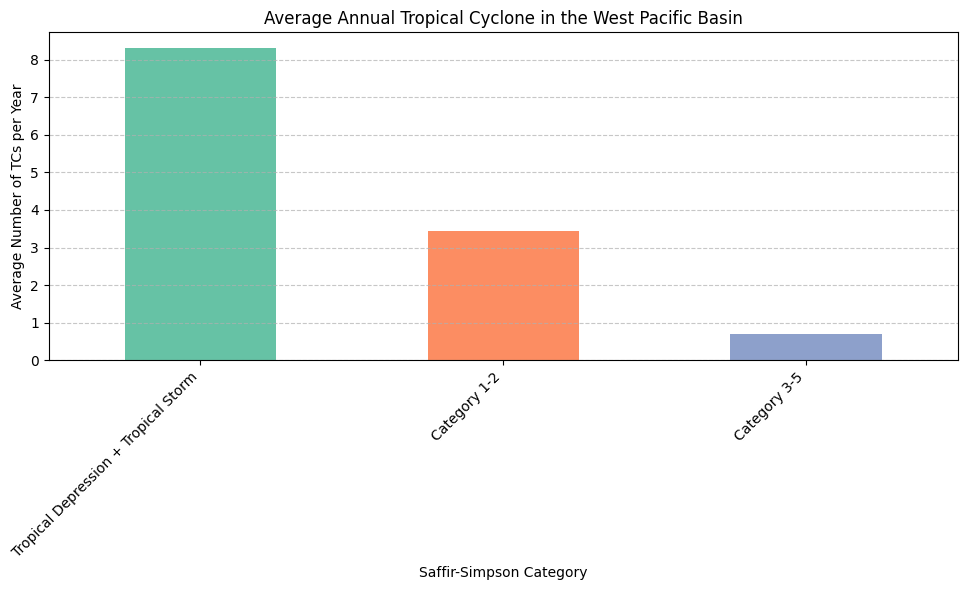

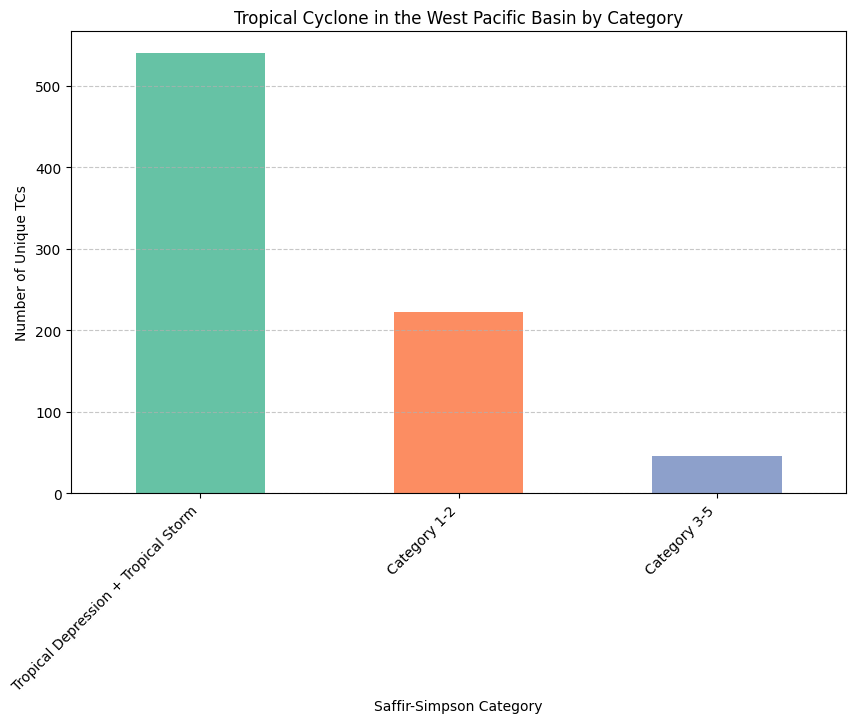

In [259]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts4 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year4 = landfall_counts4 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year4.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts4.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year4.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts4.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Result of HadGem3-GC31-HH**

In [260]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]
for dataset, counts, avg in [
    ("hist-1950", landfall_counts4, avg_tcs_per_year4)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of HadGem3-GC31-HH.csv', index=False)
print("\nData saved to 'Result of HadGem3-GC31-HH.csv'")



Data saved to 'Result of HadGem3-GC31-HH.csv'


# **2.1.3 ECMWF-IFS-HR**

# **highresSST-present**

**Round 1**

In [261]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_highresSST-present_r1i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 3.82
Category 1-2: 1.31
Category 3-5: 0.25
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 248
Category 1-2: 85
Category 3-5: 16


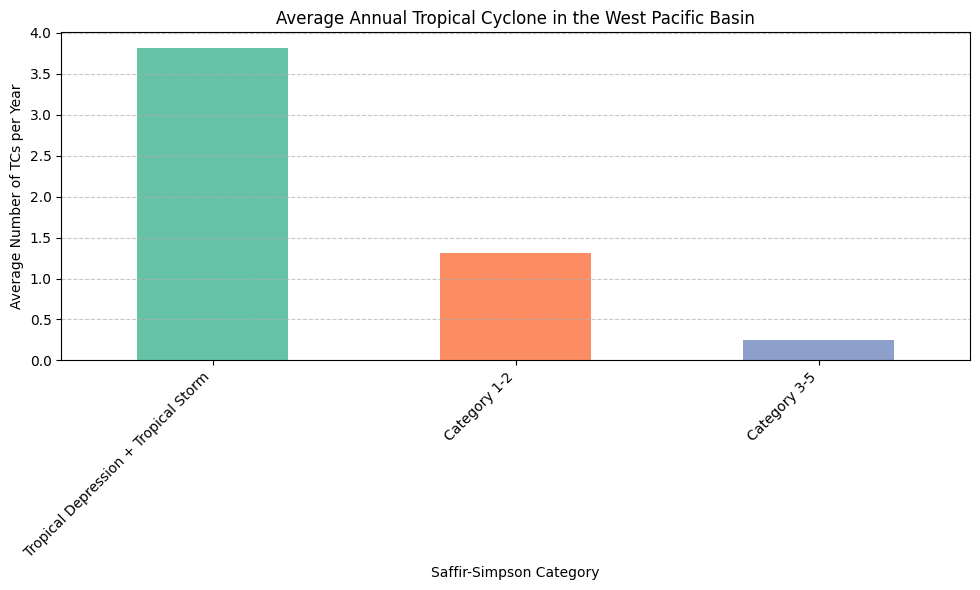

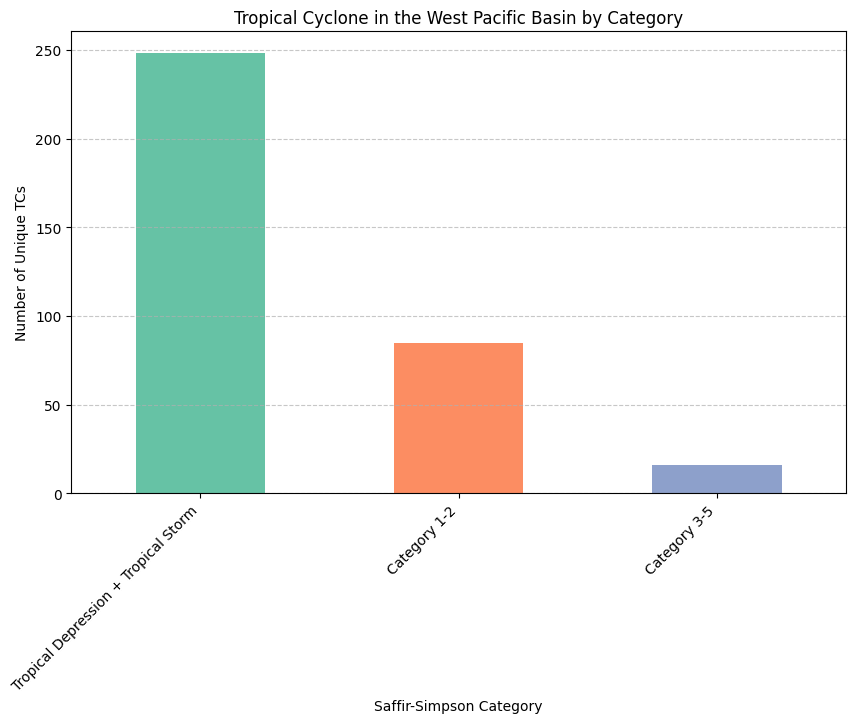

In [262]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts5 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year5 = landfall_counts5 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year5.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts5.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year5.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts5.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Round 5**

In [263]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_highresSST-present_r5i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 3.28
Category 1-2: 1.22
Category 3-5: 0.23
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 213
Category 1-2: 79
Category 3-5: 15


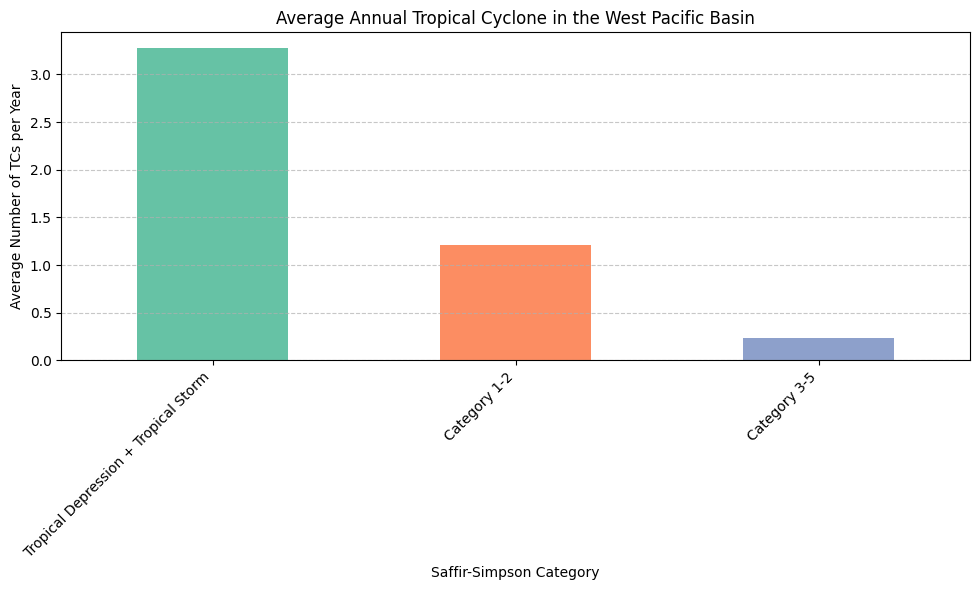

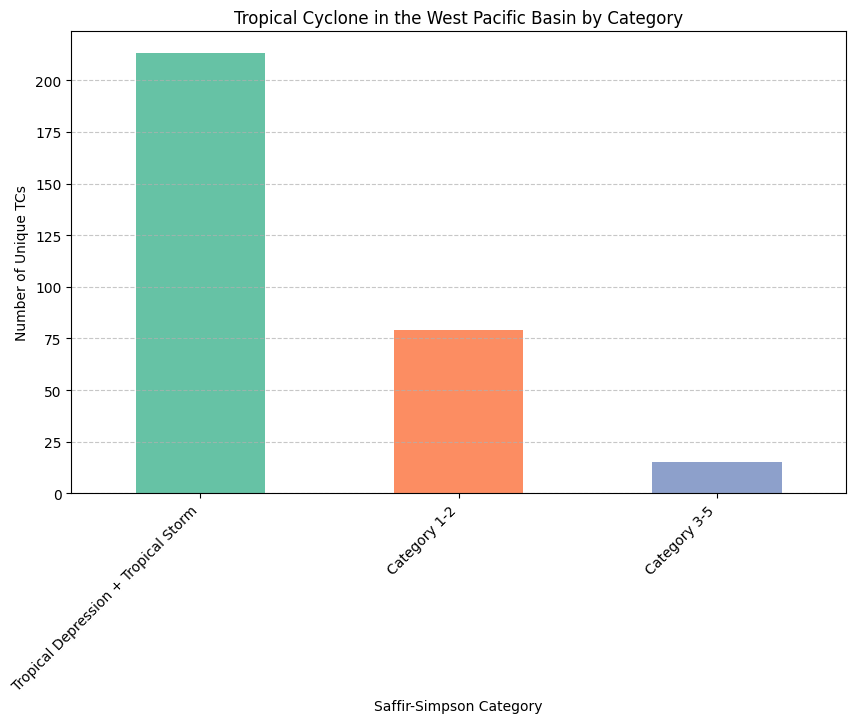

In [264]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts6 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year6 = landfall_counts6 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year6.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts6.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year6.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts6.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Round 6**

In [265]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_highresSST-present_r6i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 3.82
Category 1-2: 1.25
Category 3-5: 0.12
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 248
Category 1-2: 81
Category 3-5: 8


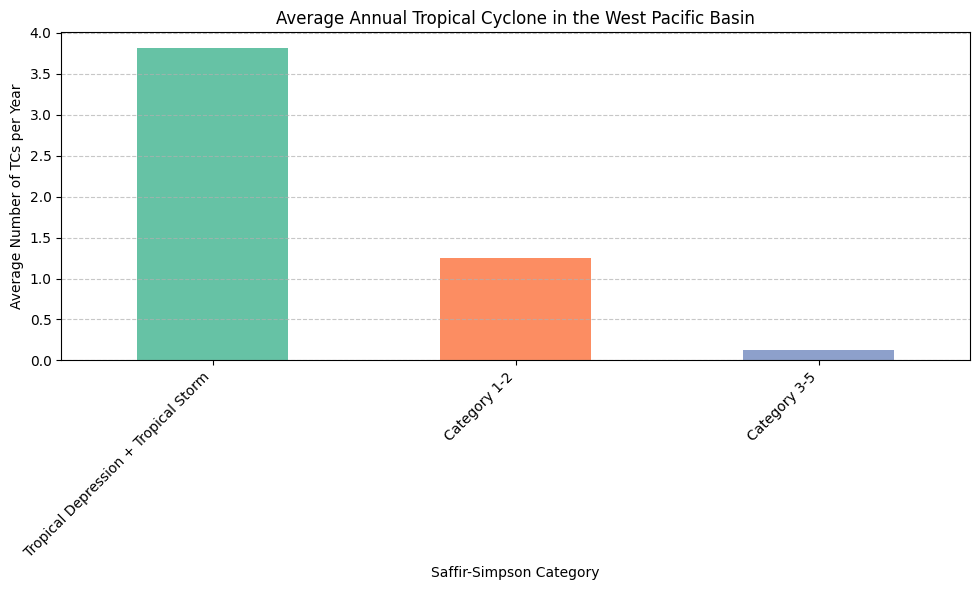

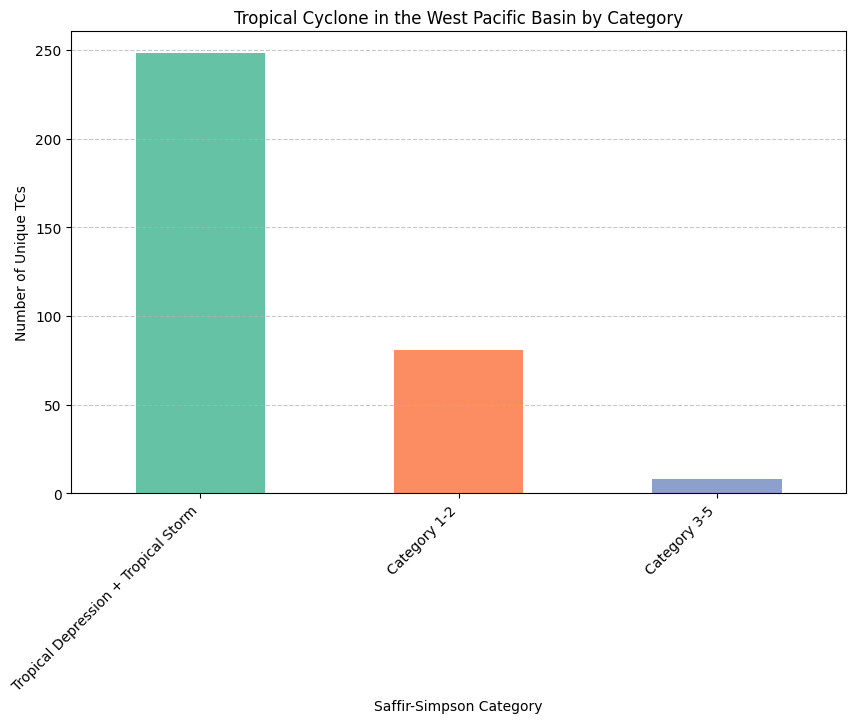

In [266]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts7 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year7 = landfall_counts7 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year7.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts7.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year7.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts7.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **hist-1950**

**round 1**

In [267]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_hist-1950_r1i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 1.58
Category 1-2: 0.25
Category 3-5: 0.05
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 103
Category 1-2: 16
Category 3-5: 3


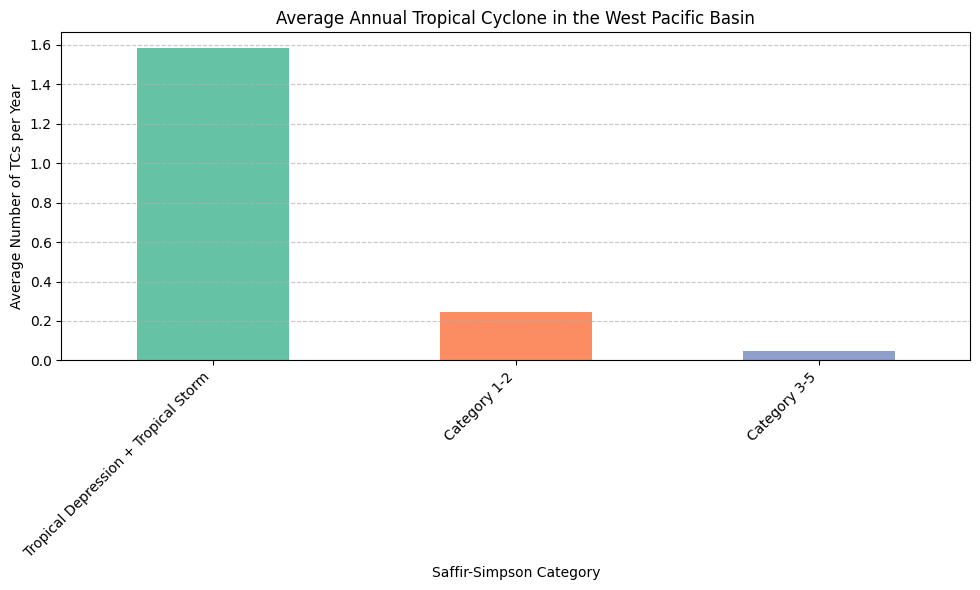

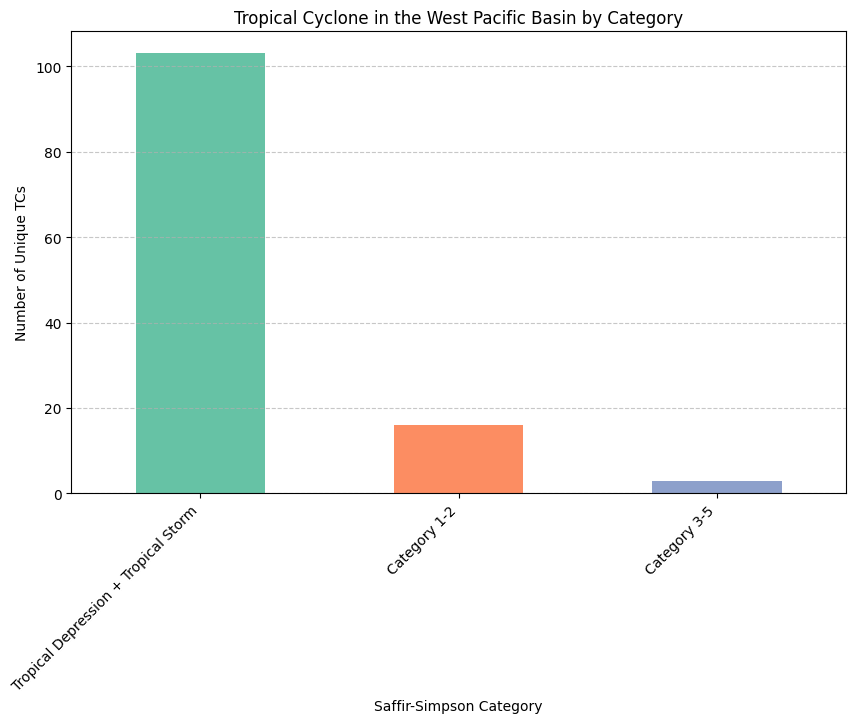

In [268]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts8 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year8 = landfall_counts8 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year8.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts8.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year8.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts8.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**round 5**

In [269]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_hist-1950_r5i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 1.52
Category 1-2: 0.15
Category 3-5: 0.05
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 99
Category 1-2: 10
Category 3-5: 3


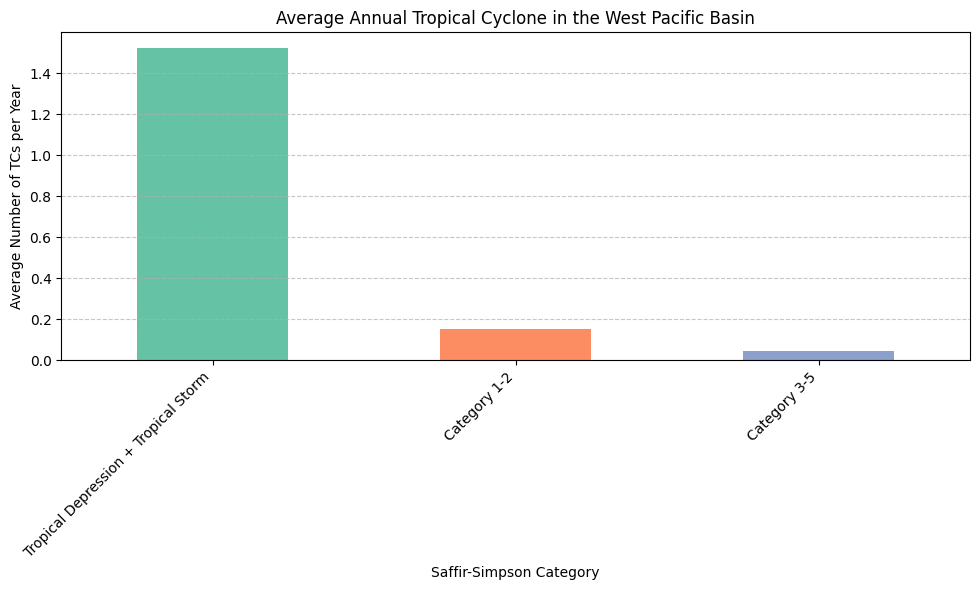

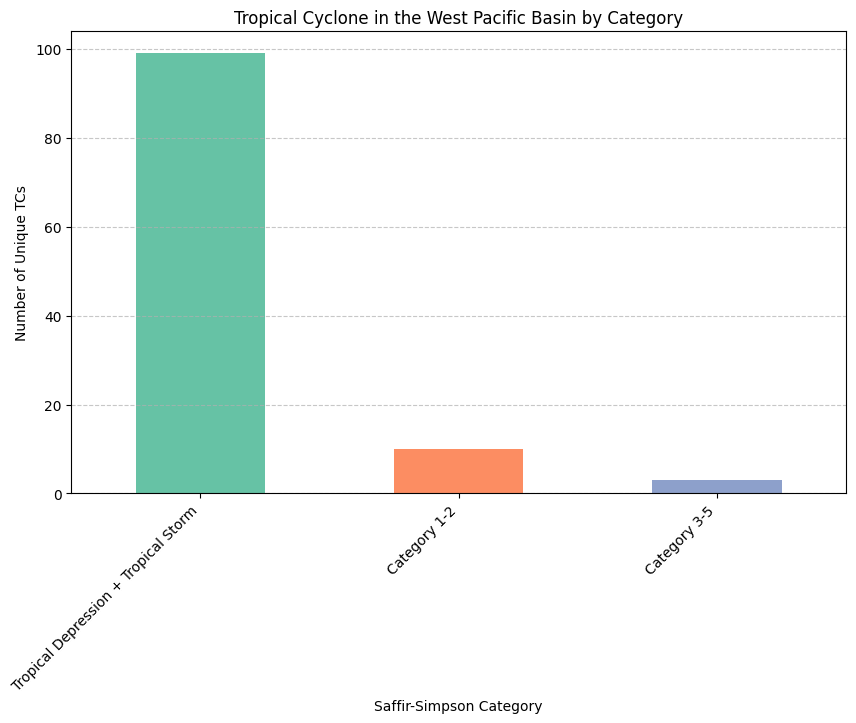

In [270]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts9 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year9 = landfall_counts9 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year9.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts9.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year9.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts9.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Round 6**

In [271]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_hist-1950_r6i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 1.52
Category 1-2: 0.15
Category 3-5: 0.05
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 99
Category 1-2: 10
Category 3-5: 3


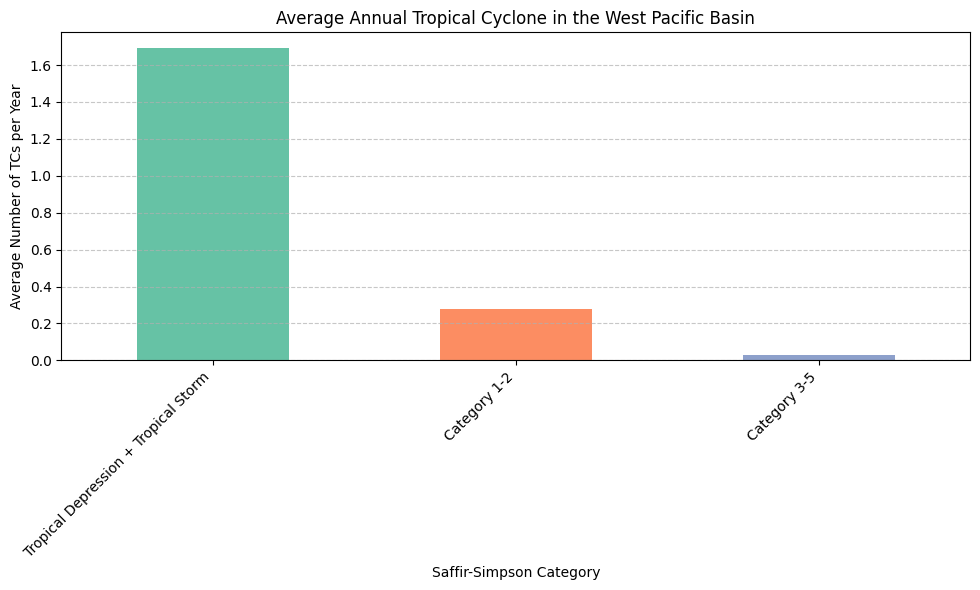

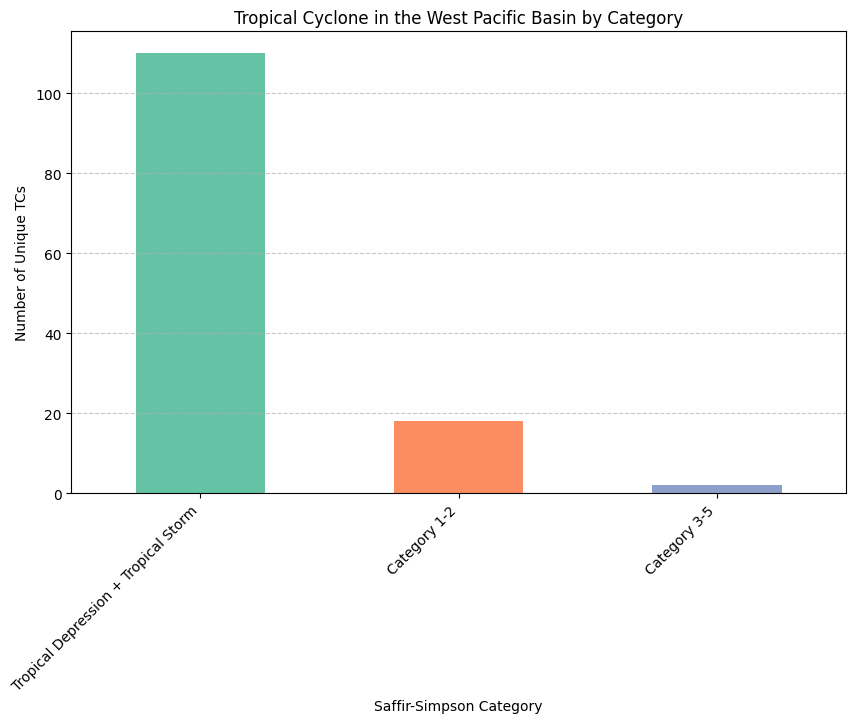

In [272]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts10 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year10 = landfall_counts10 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year9.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts9.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year10.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts10.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Result of ECMWF-IFS-HR**

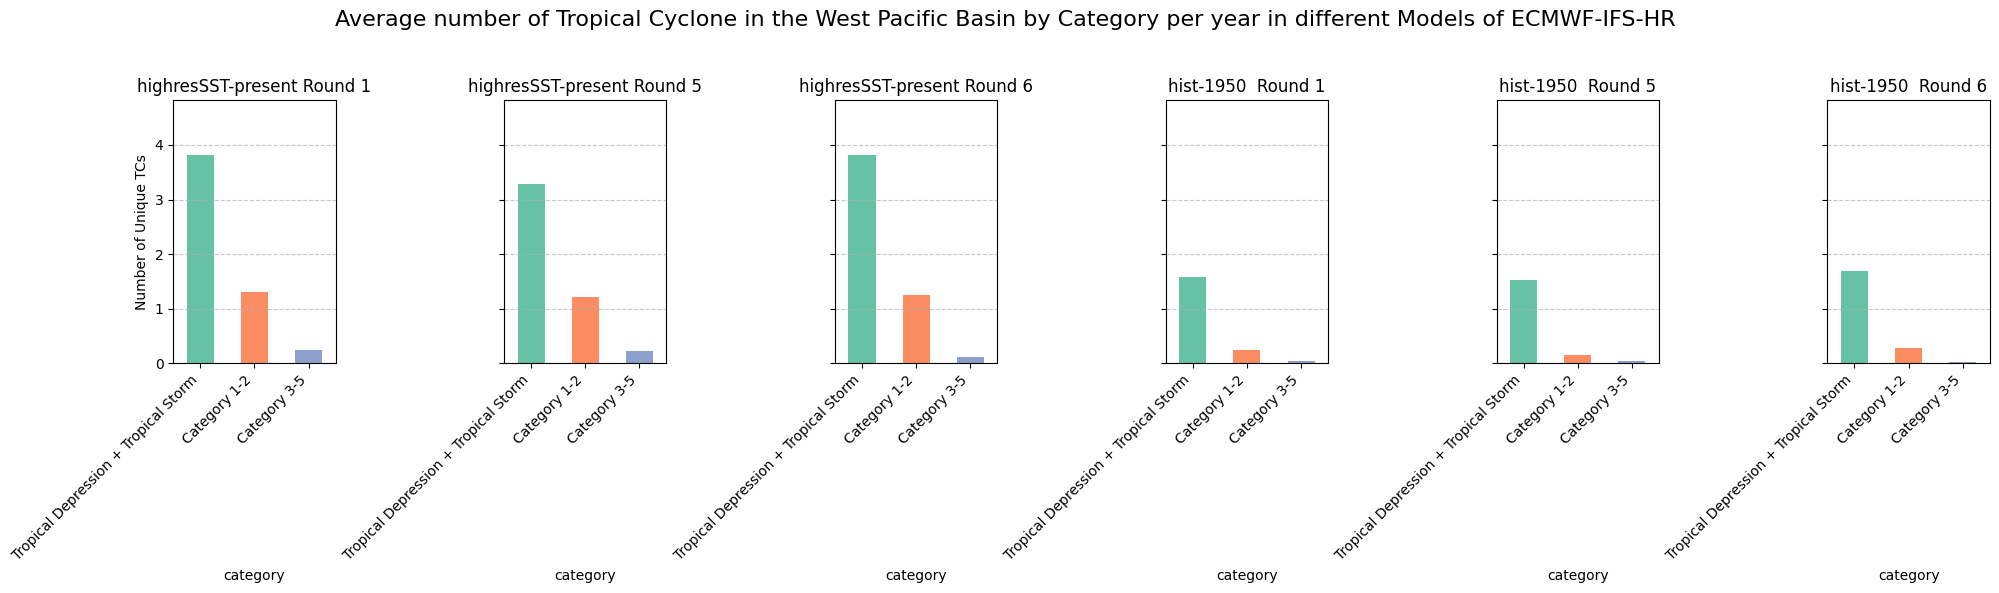

In [273]:
landfall_counts_list = [
    (avg_tcs_per_year5, "highresSST-present Round 1"),
    (avg_tcs_per_year6, "highresSST-present Round 5"),
    (avg_tcs_per_year7, "highresSST-present Round 6"),
    (avg_tcs_per_year8, "hist-1950  Round 1"),
    (avg_tcs_per_year9, "hist-1950  Round 5"),
    (avg_tcs_per_year10, "hist-1950  Round 6")
]

# Create subplots (1 row, 6 columns)
fig, axes = plt.subplots(1, 6, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average number of Tropical Cyclone in the West Pacific Basin by Category per year in different Models of ECMWF-IFS-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

# **2.1.4 EC-EARTH3P-HR**

# **highresSST-present**

**Round 1**

In [274]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_highresSST-present_r1i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 2.23
Category 1-2: 0.34
Category 3-5: 0.06
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 145
Category 1-2: 22
Category 3-5: 4


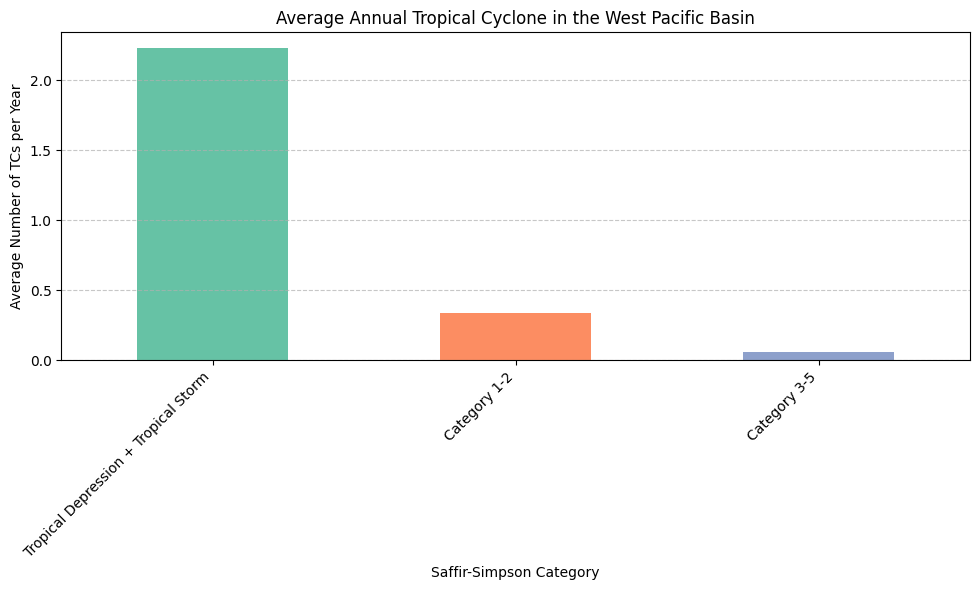

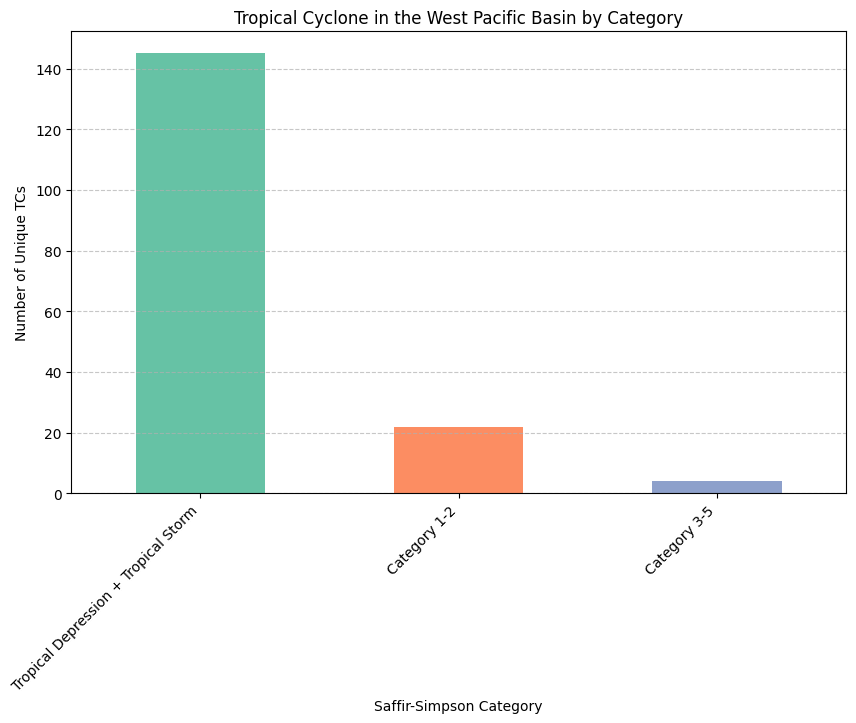

In [275]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts11 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year11 = landfall_counts11 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year11.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts11.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year11.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts11.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Round 2**

In [276]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_highresSST-present_r2i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 2.45
Category 1-2: 0.32
Category 3-5: 0.05
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 159
Category 1-2: 21
Category 3-5: 3


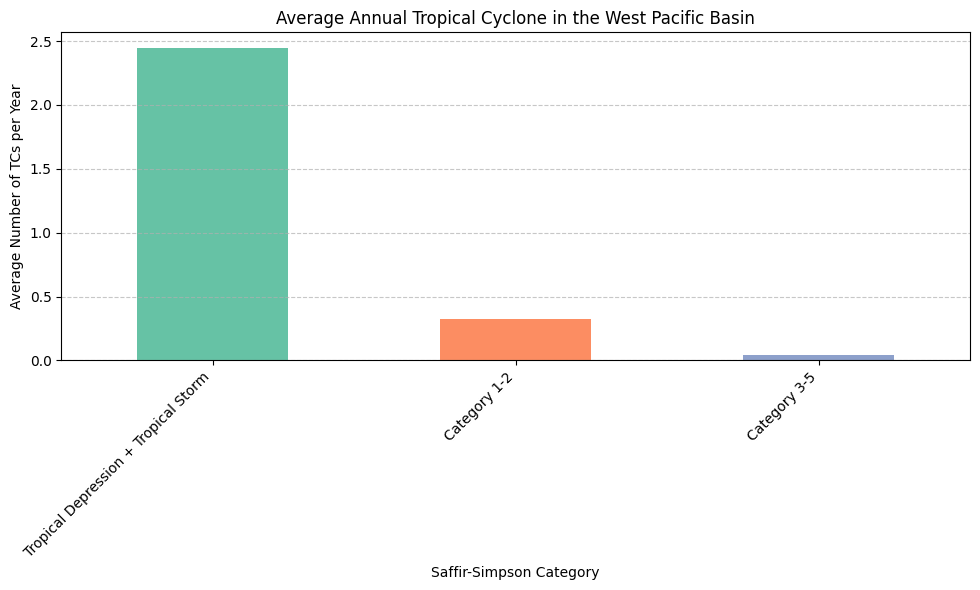

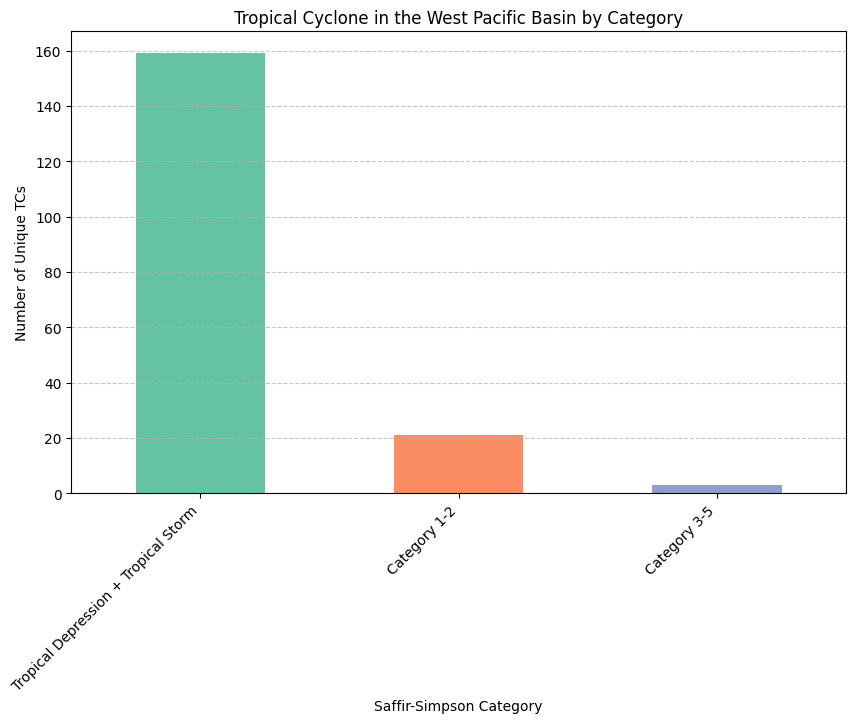

In [277]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts12 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year12 = landfall_counts12 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year12.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts12.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year12.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts12.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Round 3**

In [278]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_highresSST-present_r3i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 2.57
Category 1-2: 0.32
Category 3-5: 0.06
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 167
Category 1-2: 21
Category 3-5: 4


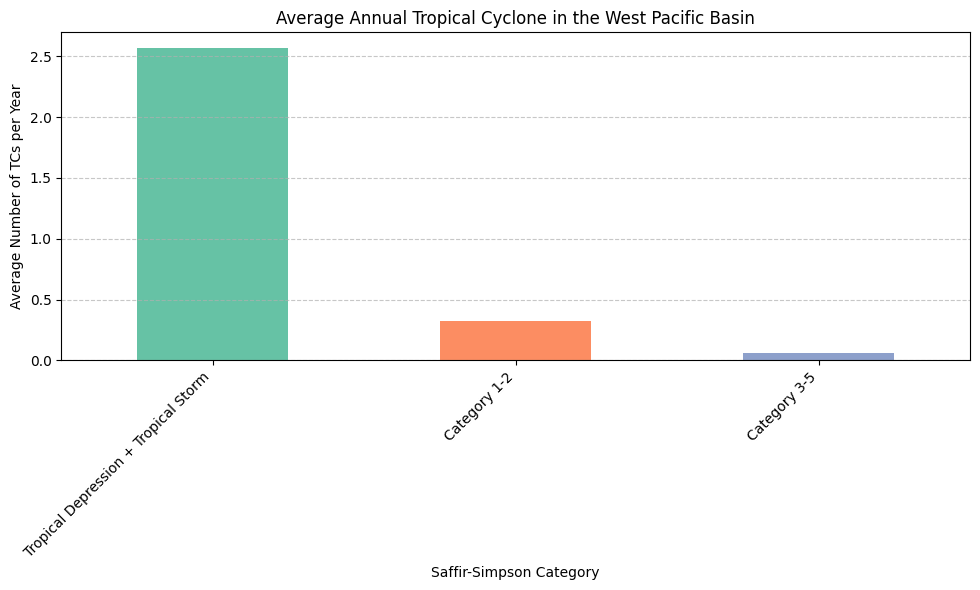

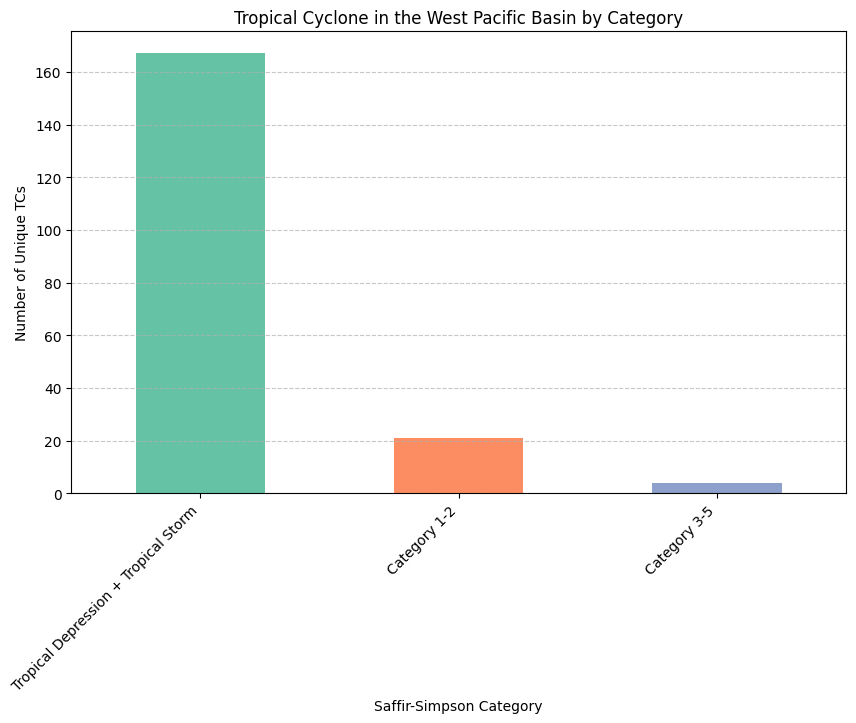

In [279]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts13 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year13 = landfall_counts13 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year13.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts13.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year13.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts13.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **hist-1950**

**round 1**

In [280]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_hist-1950_r1i1p2f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 3.09
Category 1-2: 0.25
Category 3-5: 0.11
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 201
Category 1-2: 16
Category 3-5: 7


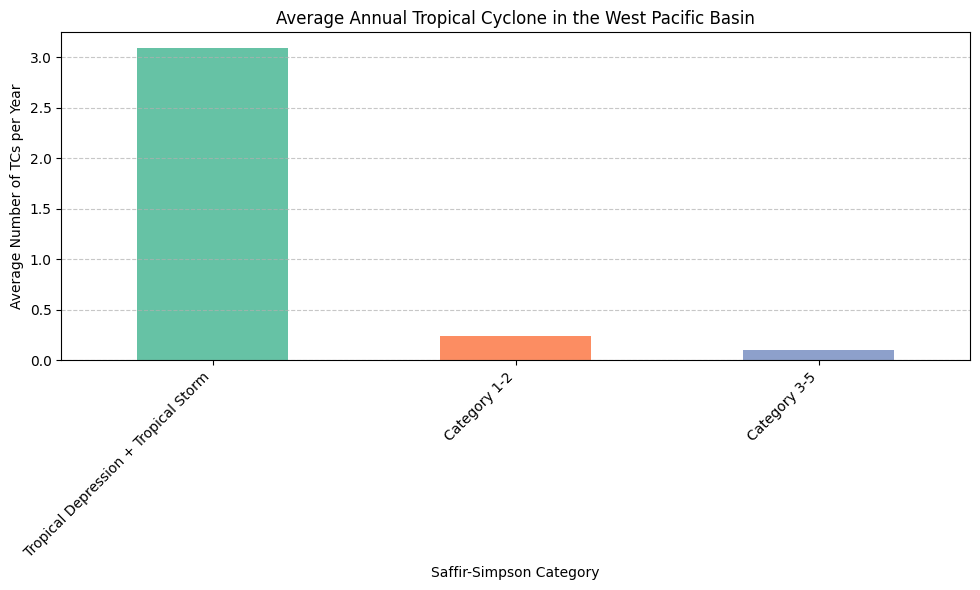

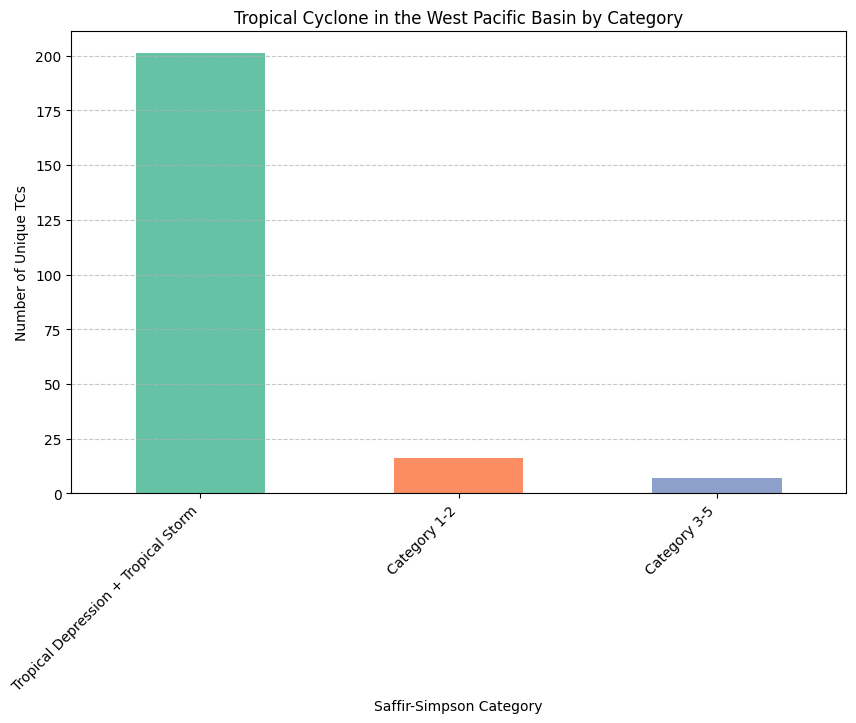

In [281]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts14 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year14 = landfall_counts14 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year14.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts14.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year14.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts14.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**round 2**

In [282]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_hist-1950_r2i1p2f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 2.71
Category 1-2: 0.22
Category 3-5: 0.05
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 176
Category 1-2: 14
Category 3-5: 3


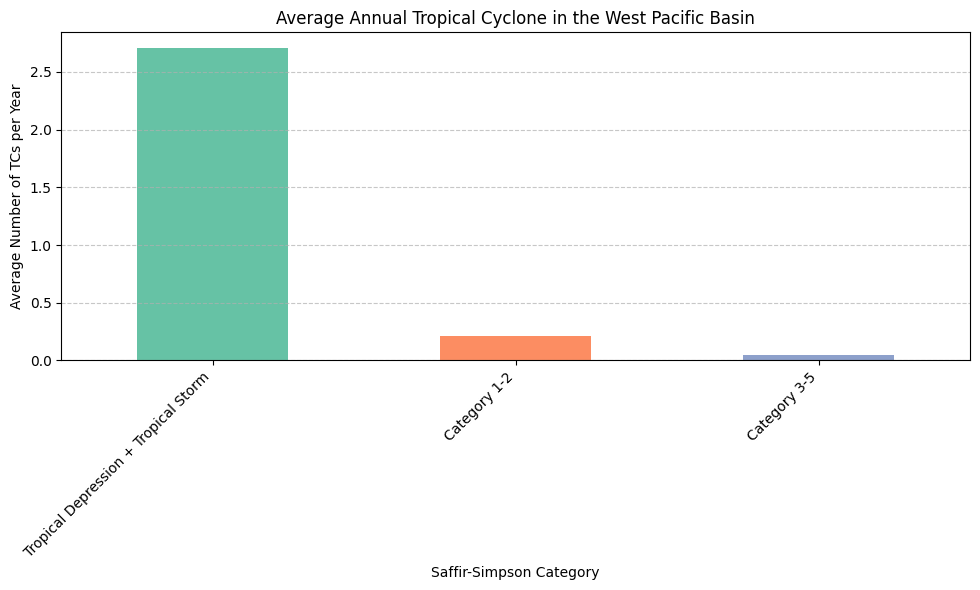

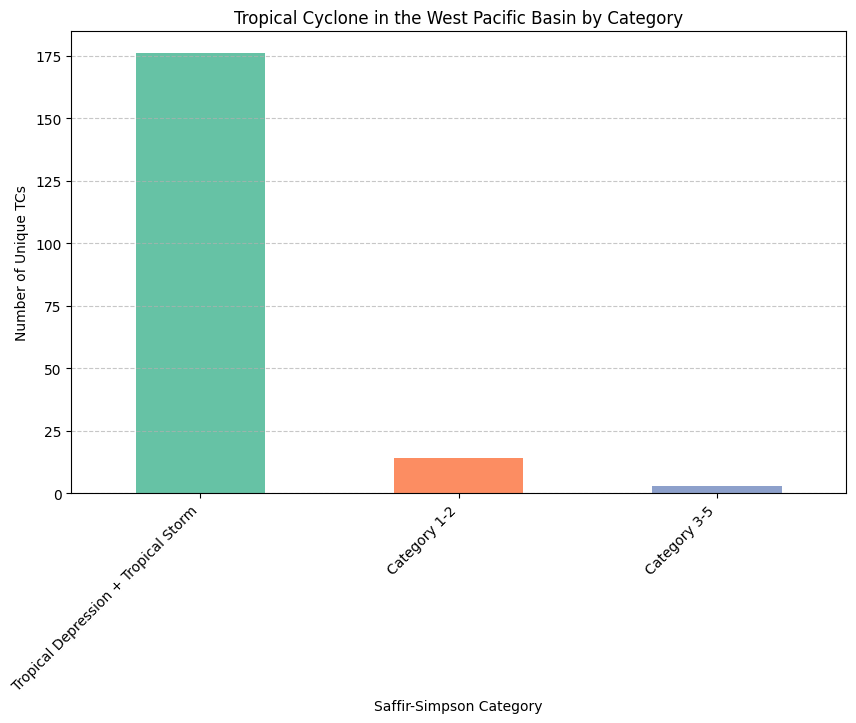

In [283]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts15 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year15 = landfall_counts15 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year15.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts15.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year15.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts15.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Result of EC-EARTH3P-HR**

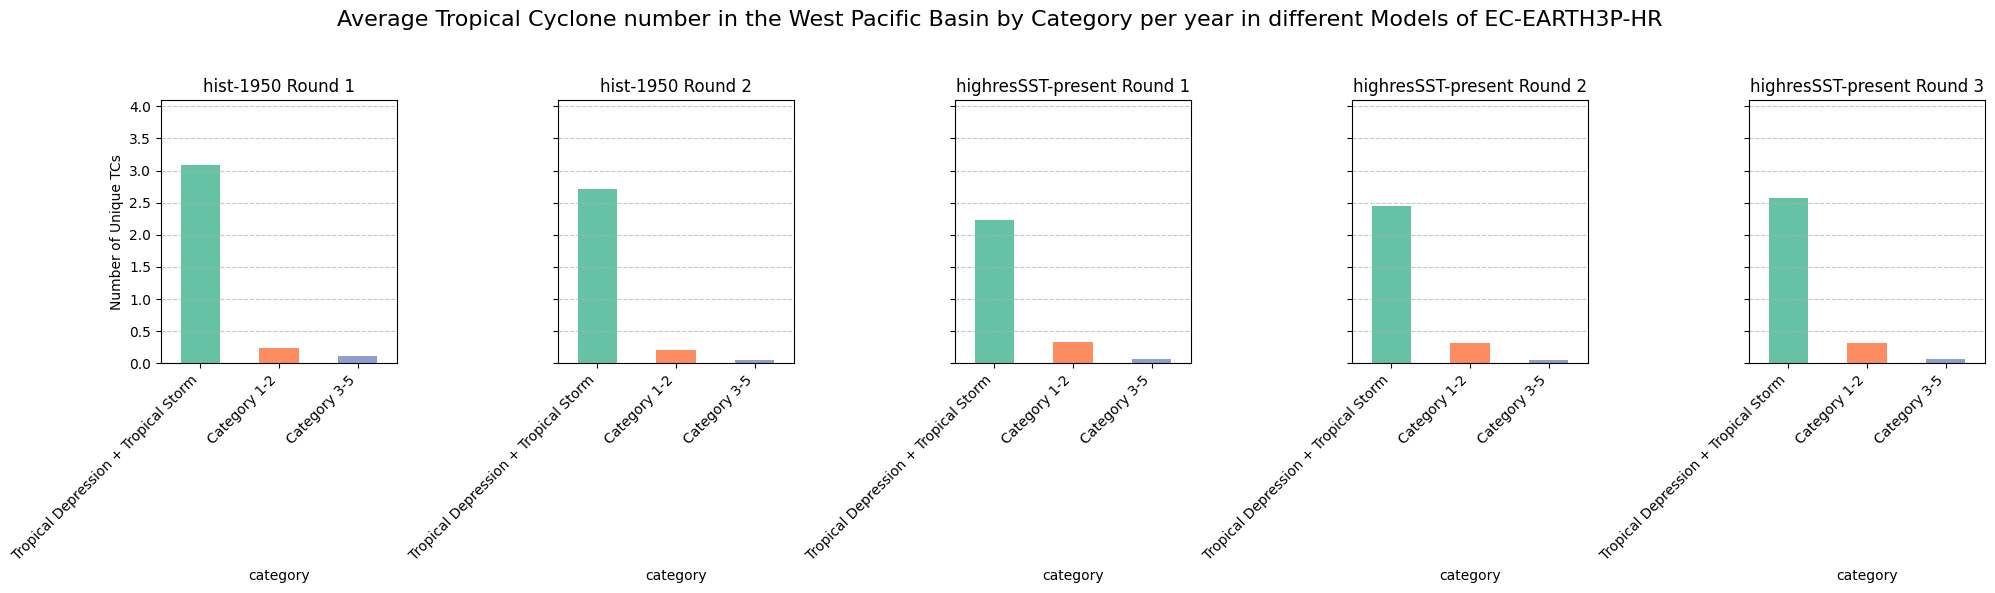

In [284]:
avg_landfall_counts_list = [
    (avg_tcs_per_year14, "hist-1950 Round 1"),
    (avg_tcs_per_year15, "hist-1950 Round 2"),
    (avg_tcs_per_year11, "highresSST-present Round 1"),
    (avg_tcs_per_year12, "highresSST-present Round 2"),
    (avg_tcs_per_year13, "highresSST-present Round 3")
]

# Create subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in avg_landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(avg_landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average Tropical Cyclone number in the West Pacific Basin by Category per year in different Models of EC-EARTH3P-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

In [285]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("hist-1950 Round 1", landfall_counts14, avg_tcs_per_year14),
    ("hist-1950 Round 2", landfall_counts15, avg_tcs_per_year15),
    ("highresSST-present Round 1", landfall_counts11, avg_tcs_per_year11),
    ("highresSST-present Round 2", landfall_counts12, avg_tcs_per_year12),
    ("highresSST-present Round 3", landfall_counts13, avg_tcs_per_year13)

]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of EC-EARTH3P-HR.csv', index=False)
print("\nData saved to 'Result of EC-EARTH3P-HR.csv' ")


Data saved to 'Result of EC-EARTH3P-HR.csv' 


# **2.1.5 CNRM-CM6-1-HR**

# **highresSST-present**

In [286]:
# Define file paths
tc_shapefile = "CNRM-CM6-1-HR_highresSST-present_r1i1p1f2_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 6.89
Category 1-2: 3.43
Category 3-5: 1.80
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 448
Category 1-2: 223
Category 3-5: 117


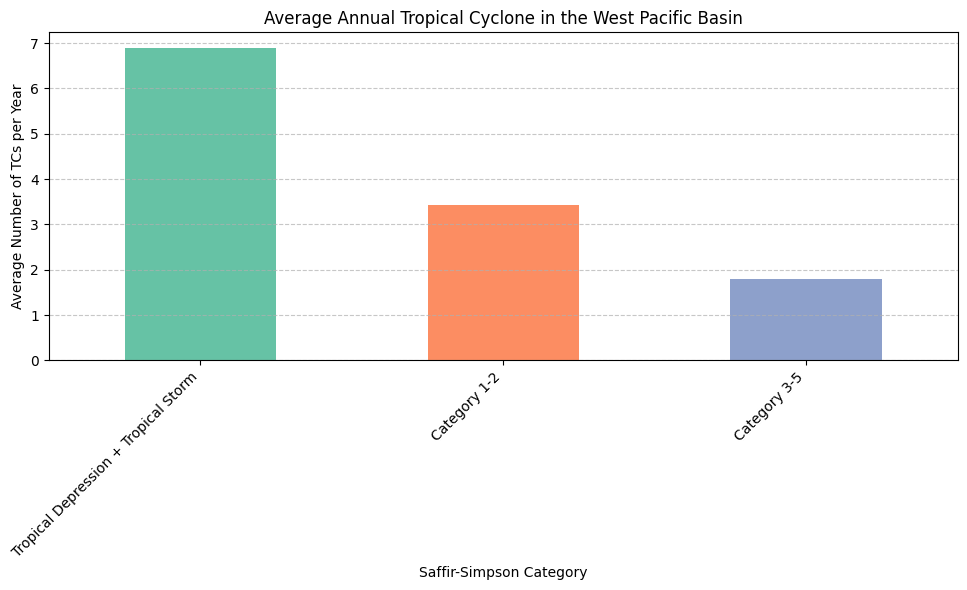

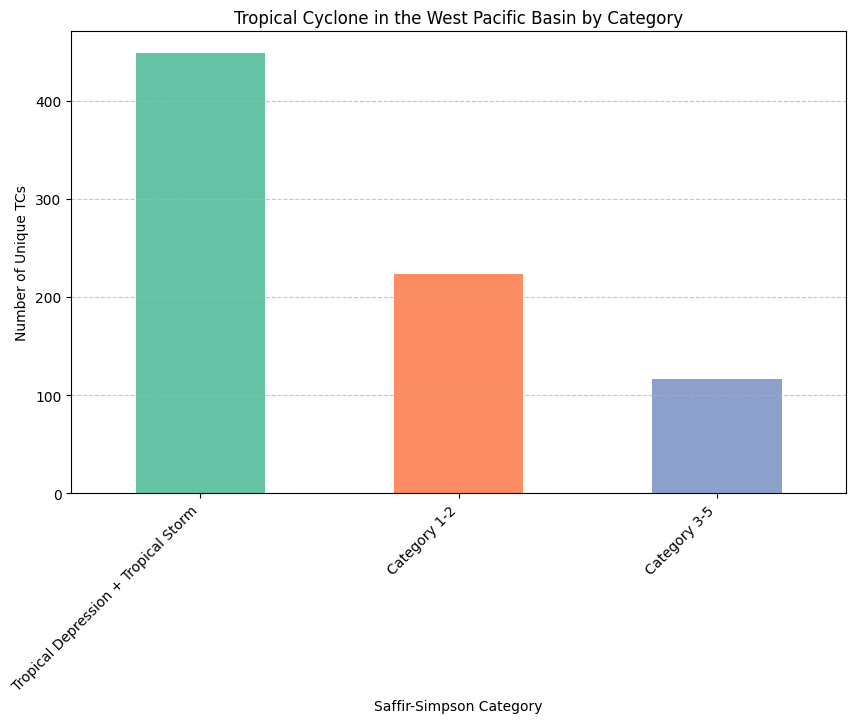

In [287]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts16 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs that make landfall
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year16 = landfall_counts16 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year16.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts16.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year16.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts16.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **hist-1950**

In [288]:
# Define file paths
tc_shapefile = "CNRM-CM6-1-HR_hist-1950_r1i1p1f2_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 8.00
Category 1-2: 4.82
Category 3-5: 1.48
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 520
Category 1-2: 313
Category 3-5: 96


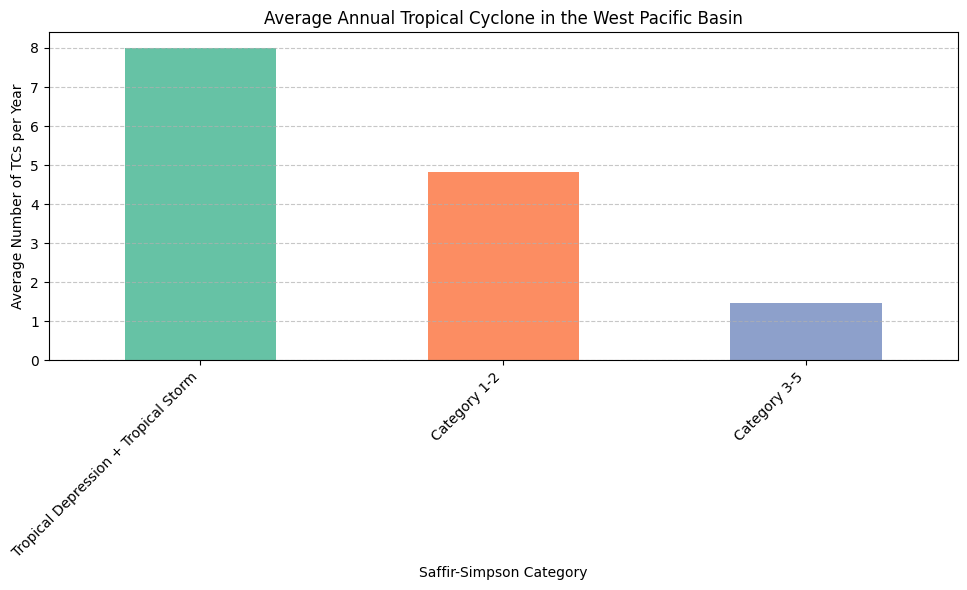

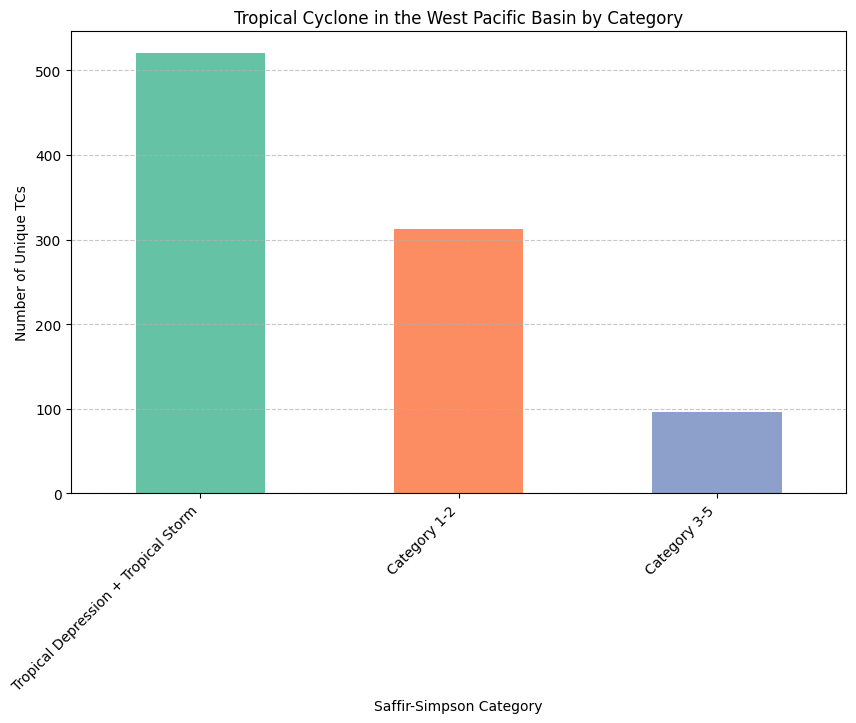

In [289]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts17 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year17 = landfall_counts17 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year17.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts17.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year17.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts17.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Result of CNRM-CM6-1-HR**

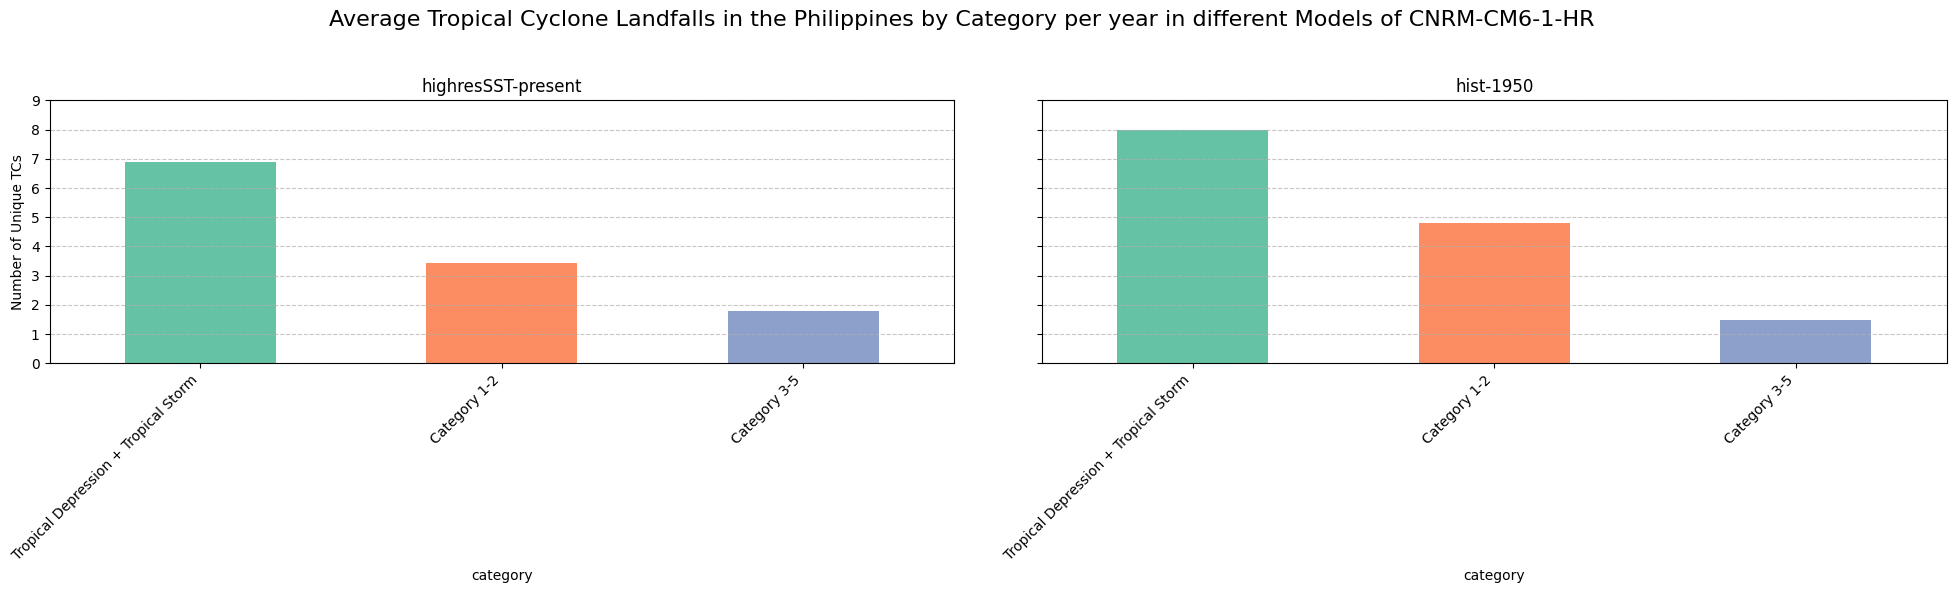

In [290]:
avg_landfall_counts_list = [
    (avg_tcs_per_year16, "highresSST-present"),
    (avg_tcs_per_year17, "hist-1950")
]

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in avg_landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(avg_landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average Tropical Cyclone Landfalls in the Philippines by Category per year in different Models of CNRM-CM6-1-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

In [291]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("highresSST-present", landfall_counts16, avg_tcs_per_year16),
    ("hist-1950", landfall_counts17, avg_tcs_per_year17)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of CNRM-CM6-1-HR.csv', index=False)
print("\nData saved to 'Result of CNRM-CM6-1-HR.csv' ")


Data saved to 'Result of CNRM-CM6-1-HR.csv' 


# **Comparsion between IBTRACS and TempExt**

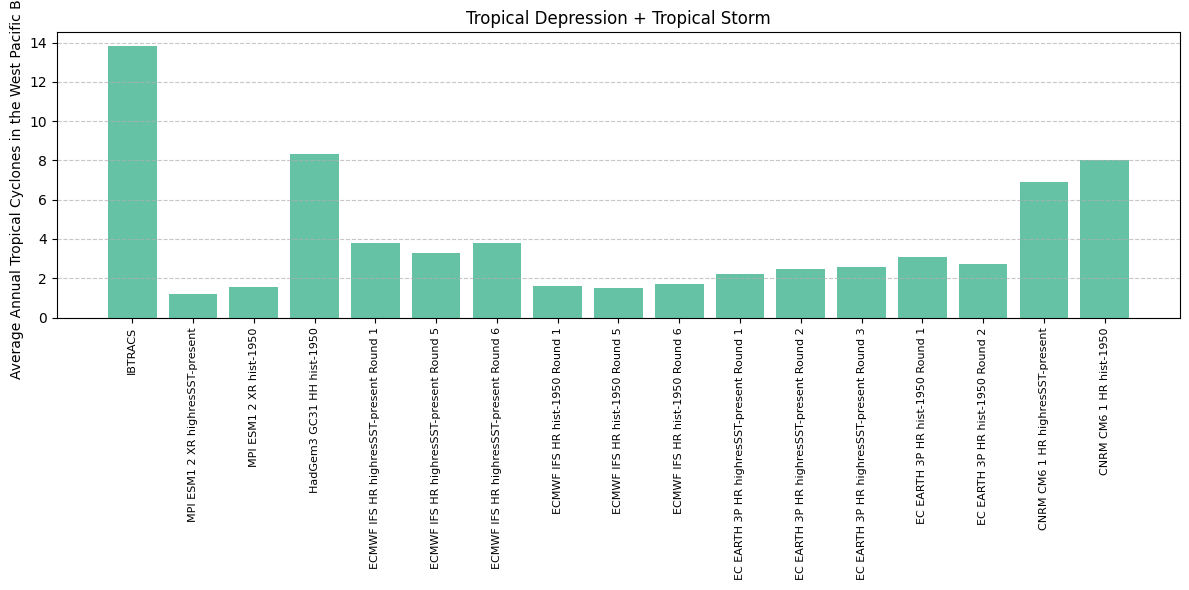

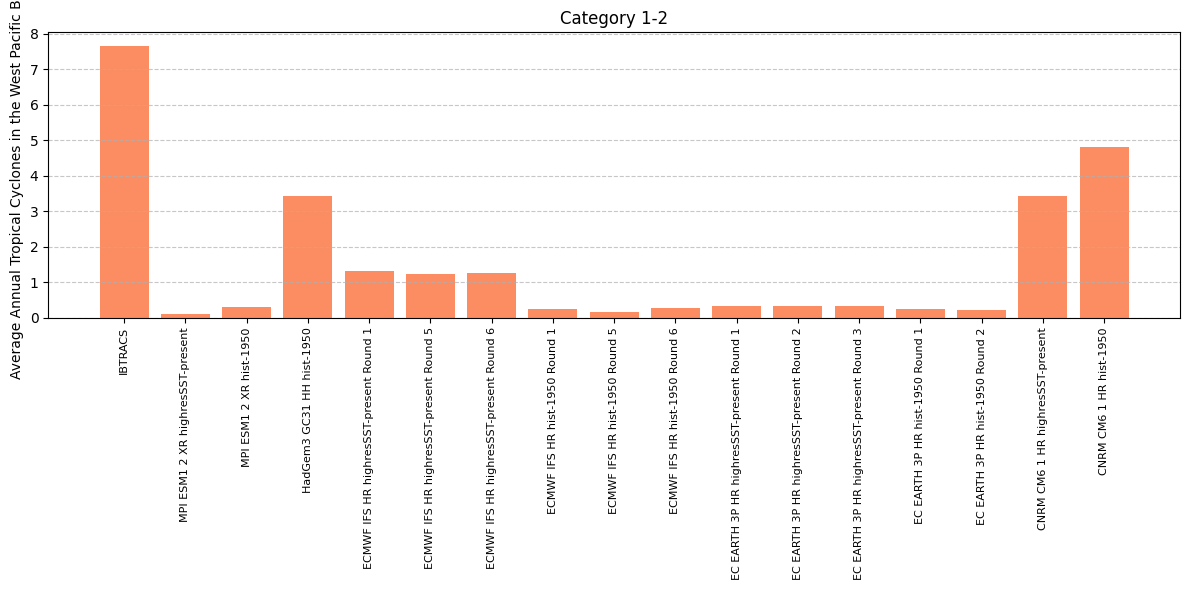

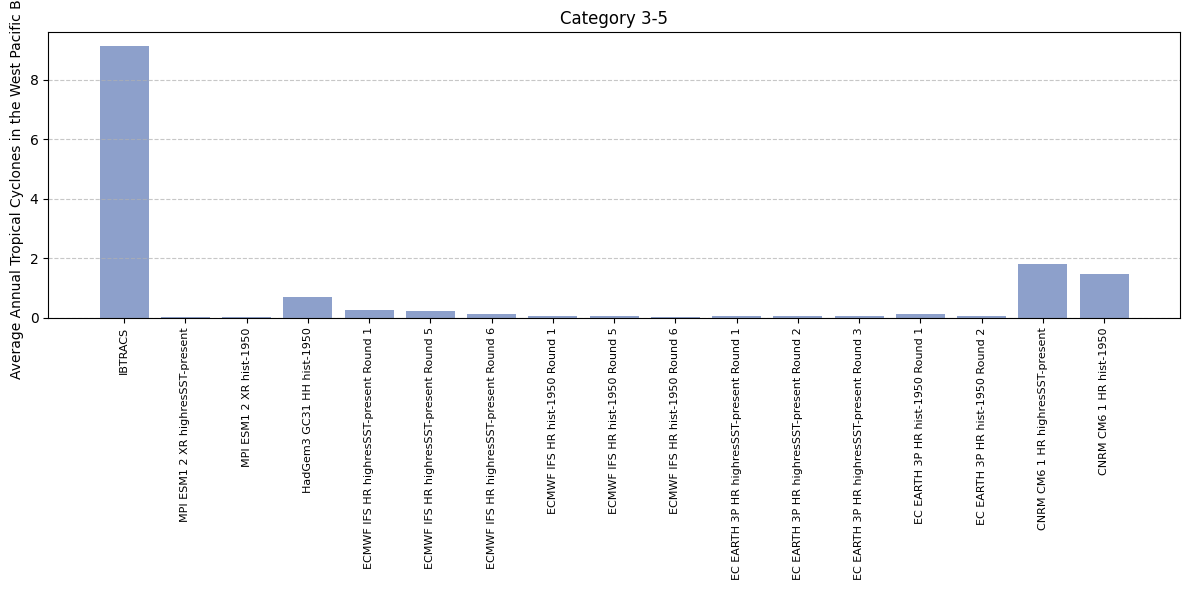

In [292]:
# title for x-axis
time_periods = ["IBTRACS",
                "MPI ESM1 2 XR highresSST-present", "MPI ESM1 2 XR hist-1950",
                "HadGem3 GC31 HH hist-1950",
                "ECMWF IFS HR highresSST-present Round 1",  "ECMWF IFS HR highresSST-present Round 5",  "ECMWF IFS HR highresSST-present Round 6",
                "ECMWF IFS HR hist-1950 Round 1", "ECMWF IFS HR hist-1950 Round 5", "ECMWF IFS HR hist-1950 Round 6",
                "EC EARTH 3P HR highresSST-present Round 1", "EC EARTH 3P HR highresSST-present Round 2", "EC EARTH 3P HR highresSST-present Round 3",
                "EC EARTH 3P HR hist-1950 Round 1",  "EC EARTH 3P HR hist-1950 Round 2",
                "CNRM CM6 1 HR highresSST-present", "CNRM CM6 1 HR hist-1950"]

# Extract counts for each category across the three time periods
ts_td_counts = [
    avg_tcs_per_yearA["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year2["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year3["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year4["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year5["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year6["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year7["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year8["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year9["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year10["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year11["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year12["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year13["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year14["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year15["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year16["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year17["Tropical Depression + Tropical Storm"]
]
cat1_2_counts = [
    avg_tcs_per_yearA["Category 1-2"],
    avg_tcs_per_year2["Category 1-2"],
    avg_tcs_per_year3["Category 1-2"],
    avg_tcs_per_year4["Category 1-2"],
    avg_tcs_per_year5["Category 1-2"],
    avg_tcs_per_year6["Category 1-2"],
    avg_tcs_per_year7["Category 1-2"],
    avg_tcs_per_year8["Category 1-2"],
    avg_tcs_per_year9["Category 1-2"],
    avg_tcs_per_year10["Category 1-2"],
    avg_tcs_per_year11["Category 1-2"],
    avg_tcs_per_year12["Category 1-2"],
    avg_tcs_per_year13["Category 1-2"],
    avg_tcs_per_year14["Category 1-2"],
    avg_tcs_per_year15["Category 1-2"],
    avg_tcs_per_year16["Category 1-2"],
    avg_tcs_per_year17["Category 1-2"]
]

cat3_5_counts = [
    avg_tcs_per_yearA["Category 3-5"],
    avg_tcs_per_year2["Category 3-5"],
    avg_tcs_per_year3["Category 3-5"],
    avg_tcs_per_year4["Category 3-5"],
    avg_tcs_per_year5["Category 3-5"],
    avg_tcs_per_year6["Category 3-5"],
    avg_tcs_per_year7["Category 3-5"],
    avg_tcs_per_year8["Category 3-5"],
    avg_tcs_per_year9["Category 3-5"],
    avg_tcs_per_year10["Category 3-5"],
    avg_tcs_per_year11["Category 3-5"],
    avg_tcs_per_year12["Category 3-5"],
    avg_tcs_per_year13["Category 3-5"],
    avg_tcs_per_year14["Category 3-5"],
    avg_tcs_per_year15["Category 3-5"],
    avg_tcs_per_year16["Category 3-5"],
    avg_tcs_per_year17["Category 3-5"]
]

# Plot 1: Tropical Depression + Tropical Storm
plt.figure(figsize=(12, 6))
plt.bar(time_periods, ts_td_counts, color='#66c2a5')
plt.title('Tropical Depression + Tropical Storm')
plt.ylabel('Average Annual Tropical Cyclones in the West Pacific Basin')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Category 1-2
plt.figure(figsize=(12, 6))
plt.bar(time_periods, cat1_2_counts, color='#fc8d62')
plt.title('Category 1-2')
plt.ylabel('Average Annual Tropical Cyclones in the West Pacific Basin')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 3: Category 3-5
plt.figure(figsize=(12, 6))
plt.bar(time_periods, cat3_5_counts, color='#8da0cb')
plt.title('Category 3-5')
plt.ylabel('Average Annual Tropical Cyclones in the West Pacific Basin')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [293]:
tc_points = gpd.read_file("IBTrACS.WP.list.v04r01.points.shp")
lines = gpd.read_file("IBTrACS.WP.list.v04r01.lines.shp")

tc_points = tc_points.to_crs(epsg=4326)

# **2.2 TRACK**

# **2.2.1 MPI-ESM1-2-XR**

# **highresSST-future**

# **highresSST-present**

In [294]:
# Define file paths
tc_shapefile = "TRACK_MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 1.22
Category 1-2: 0.11
Category 3-5: 0.02
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 79
Category 1-2: 7
Category 3-5: 1


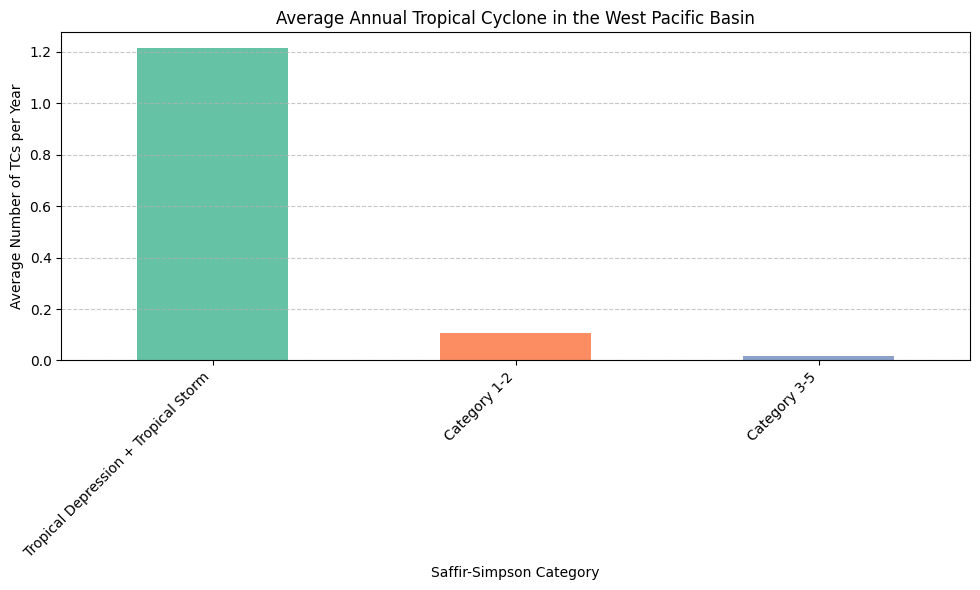

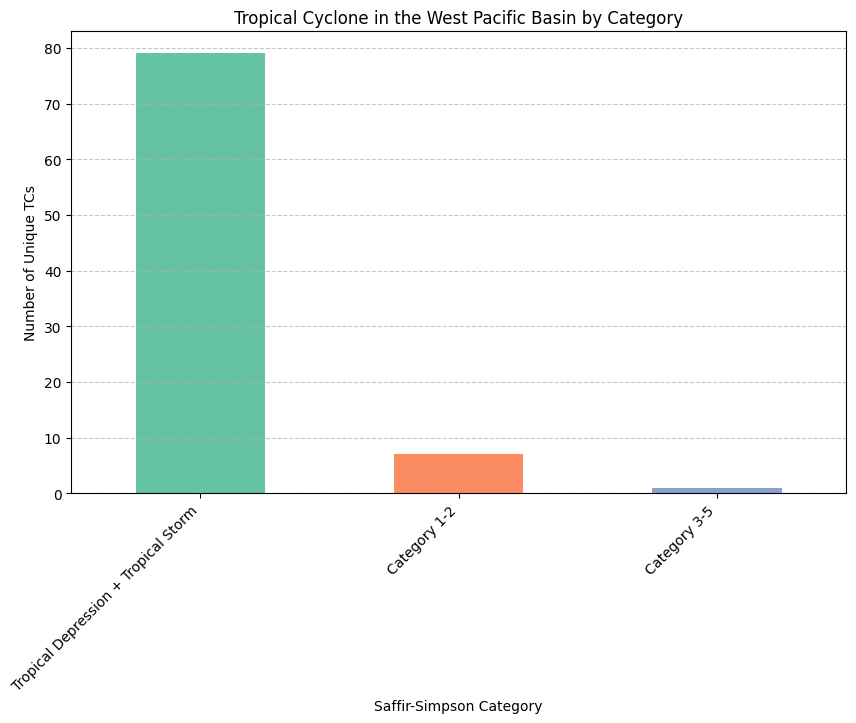

In [295]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts18 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs that make landfall
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year18 = landfall_counts18 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year18.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts18.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year18.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts18.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **hist-1950**

In [296]:
# Define file paths
tc_shapefile = "TRACK_MPI-ESM1-2-XR_hist-1950_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 1.55
Category 1-2: 0.29
Category 3-5: 0.02
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 101
Category 1-2: 19
Category 3-5: 1


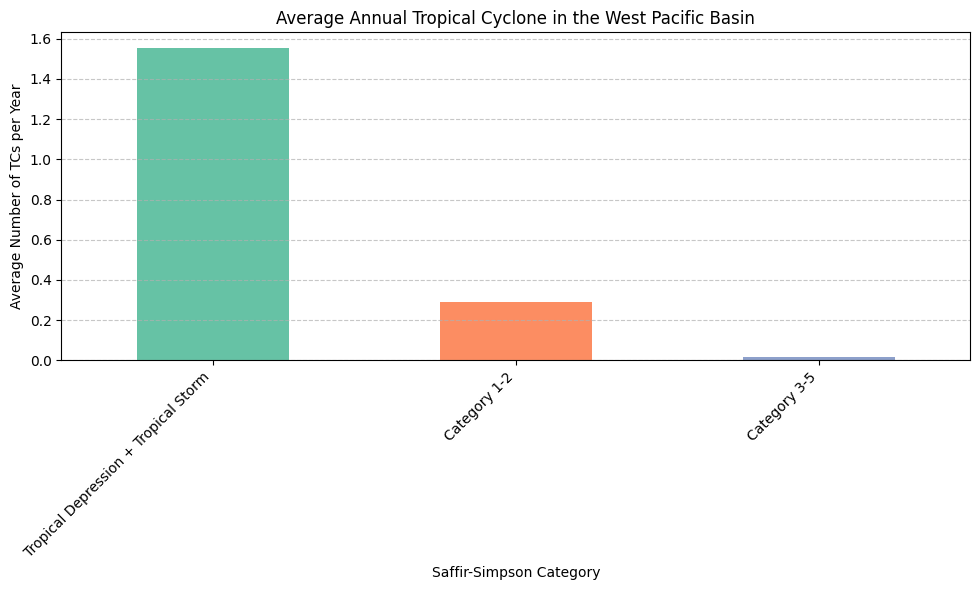

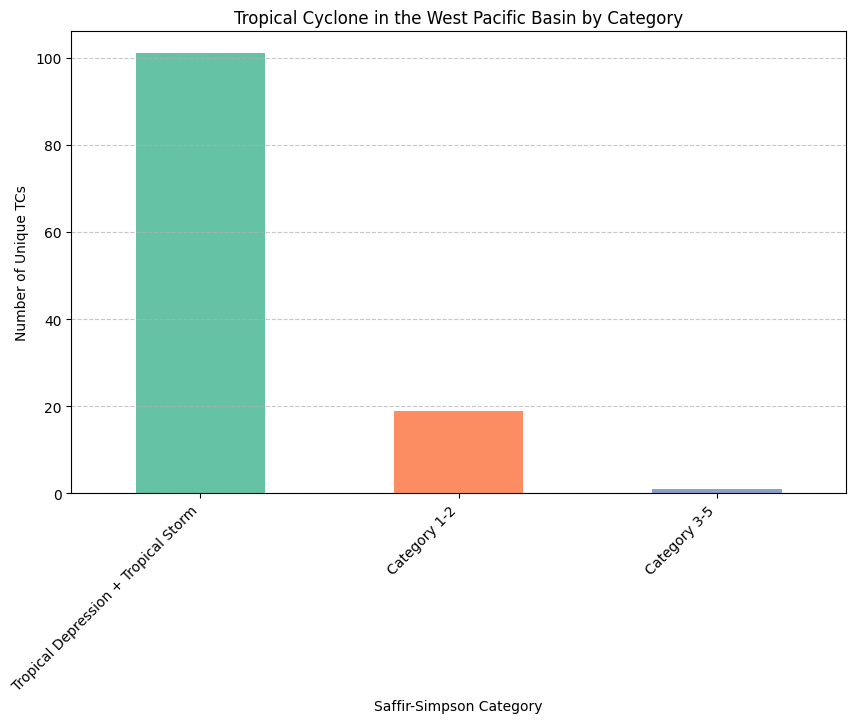

In [297]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts19 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year19 = landfall_counts19 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year19.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts19.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year19.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts19.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Result of MPI-ESM1-2-XR**

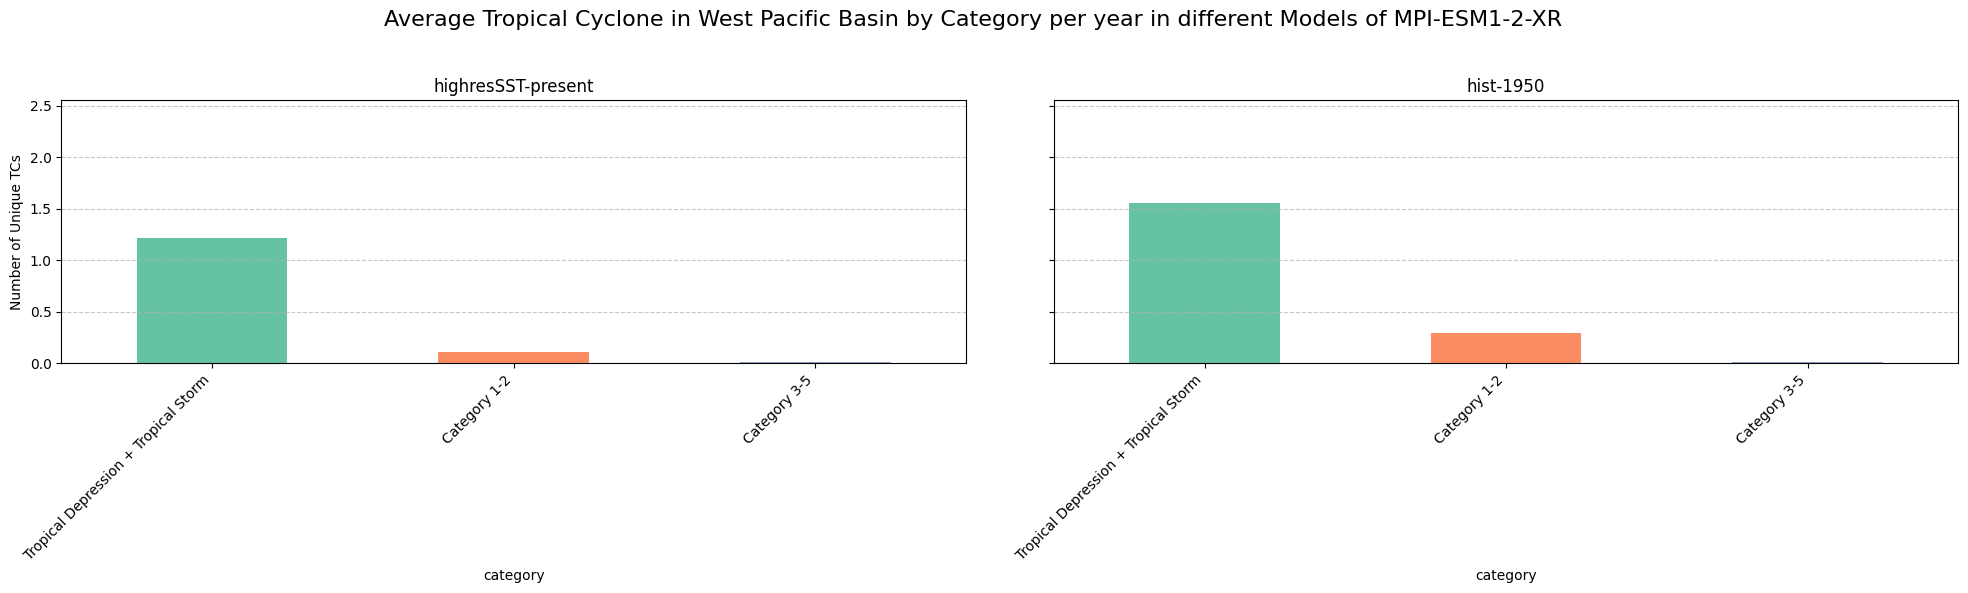

In [298]:
avg_landfall_counts_list = [
    (avg_tcs_per_year18, "highresSST-present"),
    (avg_tcs_per_year19, "hist-1950")
]

# Create subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in avg_landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(avg_landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average Tropical Cyclone in West Pacific Basin by Category per year in different Models of MPI-ESM1-2-XR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

In [299]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("highresSST-present", landfall_counts18, avg_tcs_per_year18),
    ("hist-1950", landfall_counts19, avg_tcs_per_year19)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of MPI-ESM1-2-XR.csv', index=False)
print("\nData saved to 'Result of MPI-ESM1-2-XR.csv'")


Data saved to 'Result of MPI-ESM1-2-XR.csv'


# **2.2.2 HadGem3-GC31-HH**

# **hist-1950**

In [300]:
# Define file paths
tc_shapefile = "TRACK_HadGEM3-GC31-HH_hist-1950_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 8.31
Category 1-2: 3.43
Category 3-5: 0.71
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 540
Category 1-2: 223
Category 3-5: 46


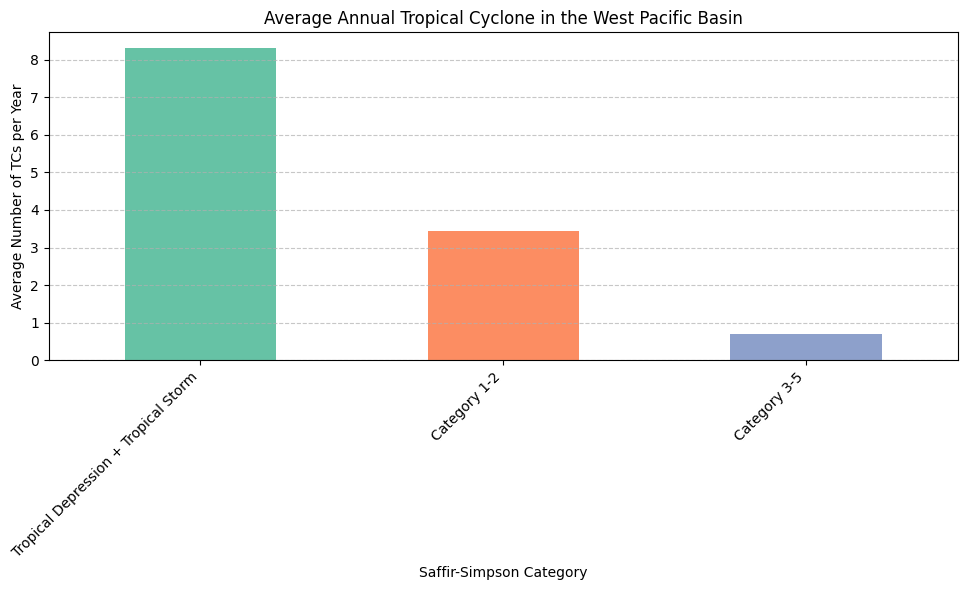

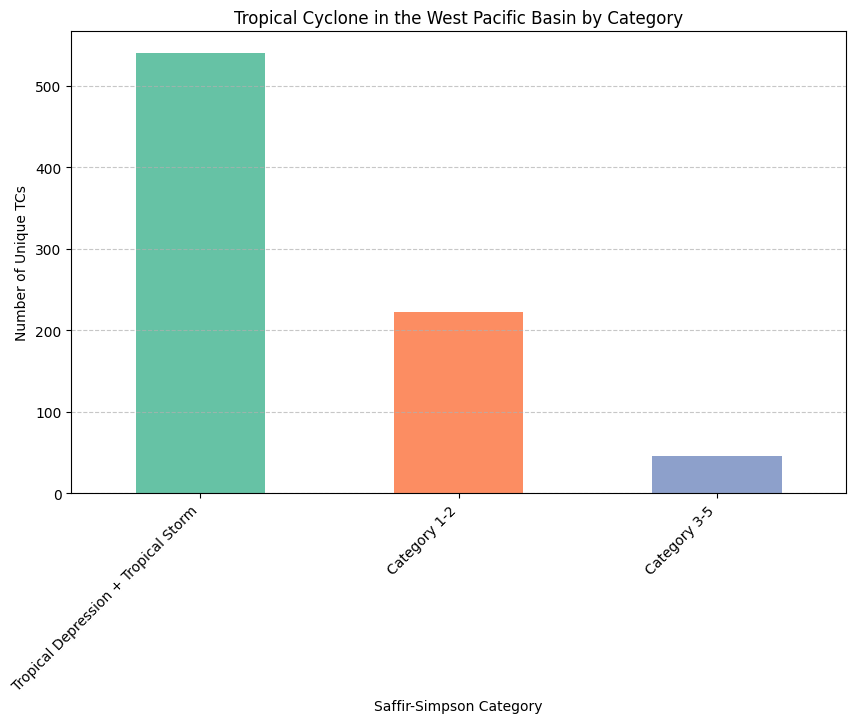

In [301]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts20 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year20 = landfall_counts20 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year20.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts20.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year20.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts20.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Result of HadGem3-GC31-HH**

In [302]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]
for dataset, counts, avg in [
    ("hist-1950", landfall_counts20, avg_tcs_per_year20)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of HadGem3-GC31-HH.csv', index=False)
print("\nData saved to 'Result of HadGem3-GC31-HH.csv'")



Data saved to 'Result of HadGem3-GC31-HH.csv'


# **2.2.3 ECMWF-IFS-HR**

# **highresSST-present**

**Round 1**

In [303]:
# Define file paths
tc_shapefile = "TRACK_ECMWF-IFS-HR_highresSST-present_r1i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 3.82
Category 1-2: 1.31
Category 3-5: 0.25
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 248
Category 1-2: 85
Category 3-5: 16


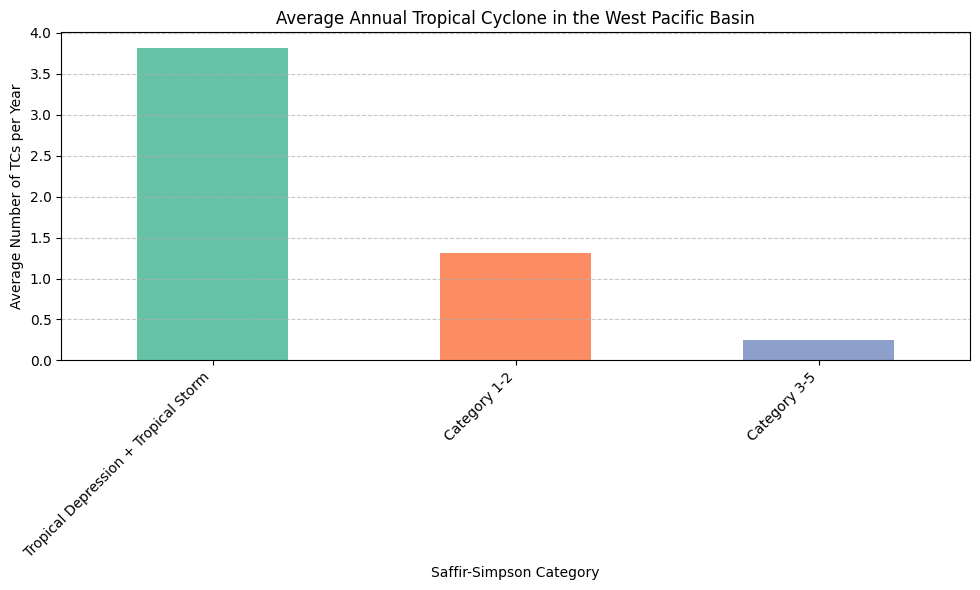

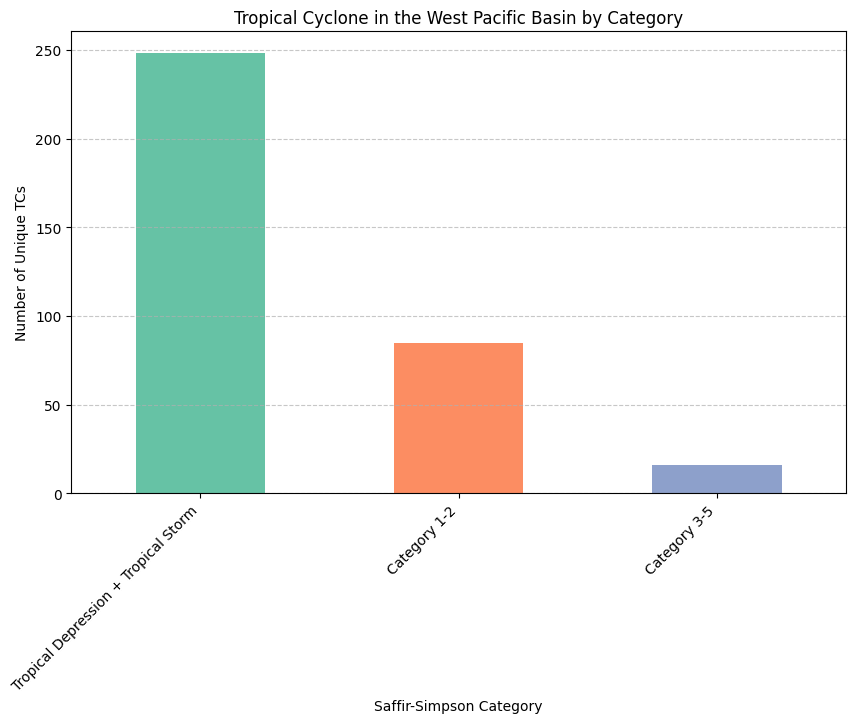

In [304]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts21 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year21 = landfall_counts21 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year21.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts21.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year21.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts21.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Round 5**

In [305]:
# Define file paths
tc_shapefile = "TRACK_ECMWF-IFS-HR_highresSST-present_r5i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 3.28
Category 1-2: 1.22
Category 3-5: 0.23
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 213
Category 1-2: 79
Category 3-5: 15


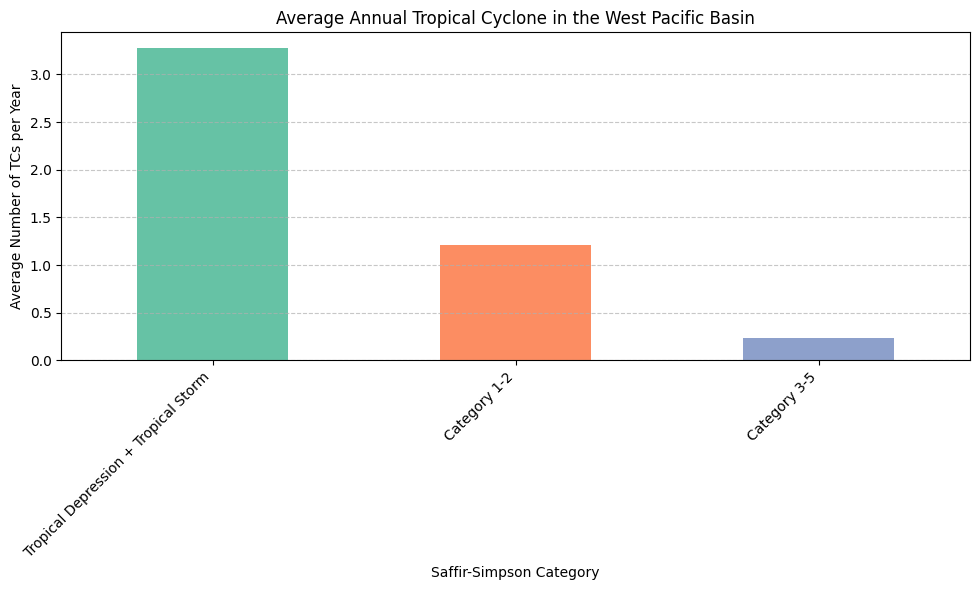

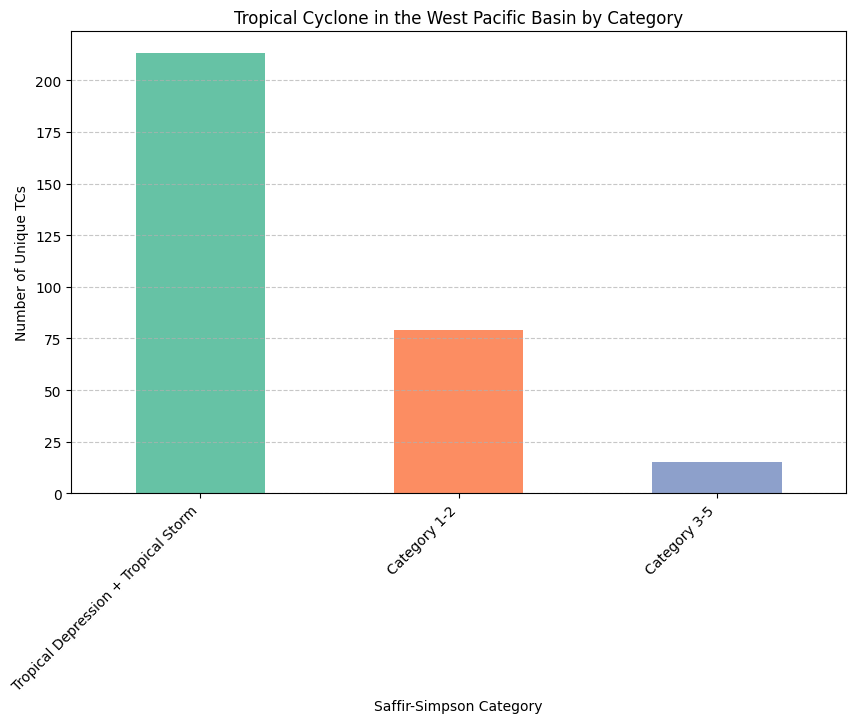

In [306]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts22 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year22 = landfall_counts22 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year22.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts22.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year22.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts22.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Round 6**

In [307]:
# Define file paths
tc_shapefile = "TRACK_ECMWF-IFS-HR_highresSST-present_r6i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 3.82
Category 1-2: 1.25
Category 3-5: 0.12
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 248
Category 1-2: 81
Category 3-5: 8


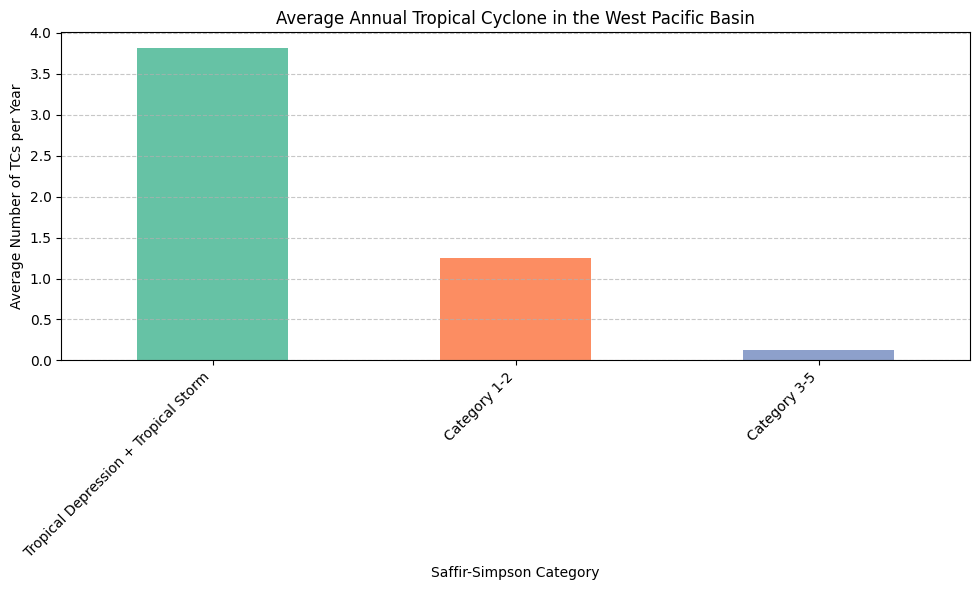

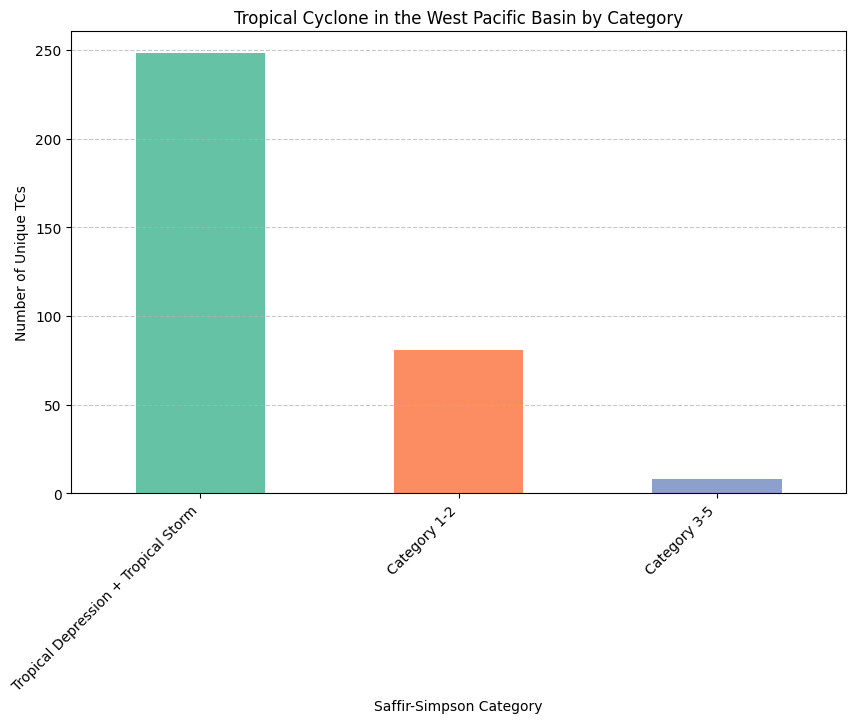

In [308]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts23 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year23 = landfall_counts23 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year23.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts23.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year23.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts23.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **hist-1950**

**round 1**

In [309]:
# Define file paths
tc_shapefile = "TRACK_ECMWF-IFS-HR_hist-1950_r1i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 1.58
Category 1-2: 0.25
Category 3-5: 0.05
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 103
Category 1-2: 16
Category 3-5: 3


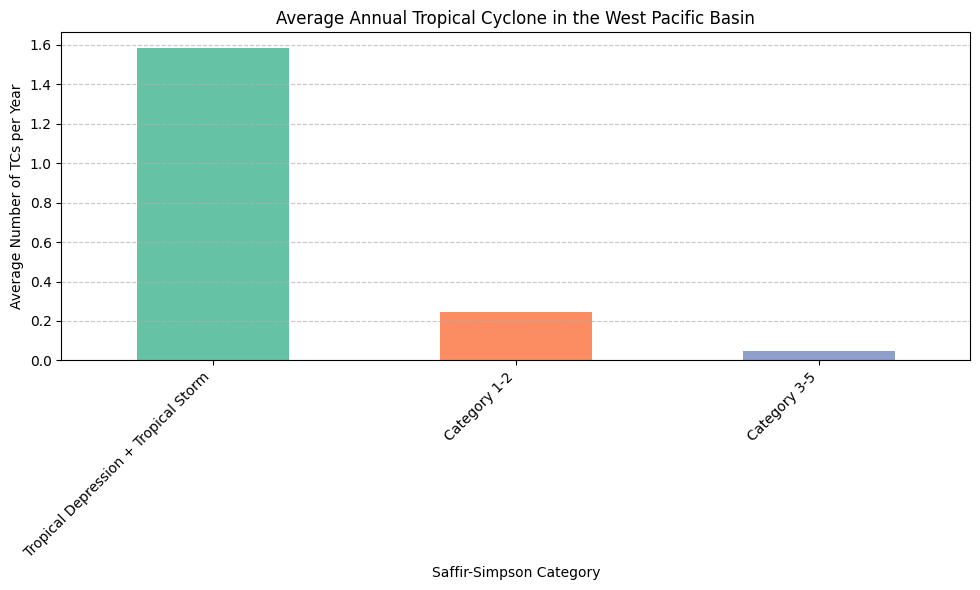

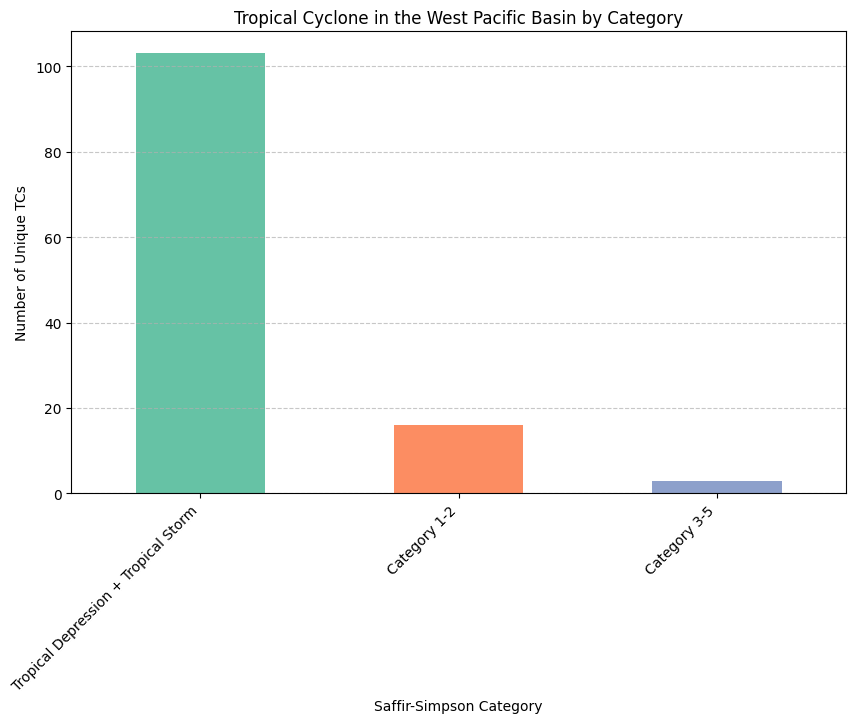

In [310]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts24 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year24 = landfall_counts24 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year24.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts24.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year24.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts24.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**round 5**

In [311]:
# Define file paths
tc_shapefile = "TRACK_ECMWF-IFS-HR_hist-1950_r5i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 1.52
Category 1-2: 0.15
Category 3-5: 0.05
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 99
Category 1-2: 10
Category 3-5: 3


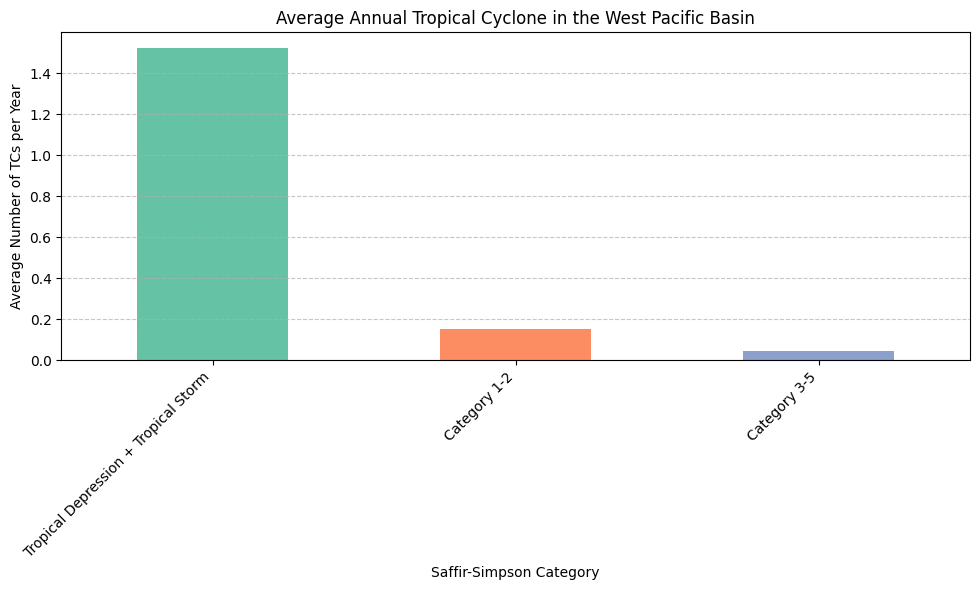

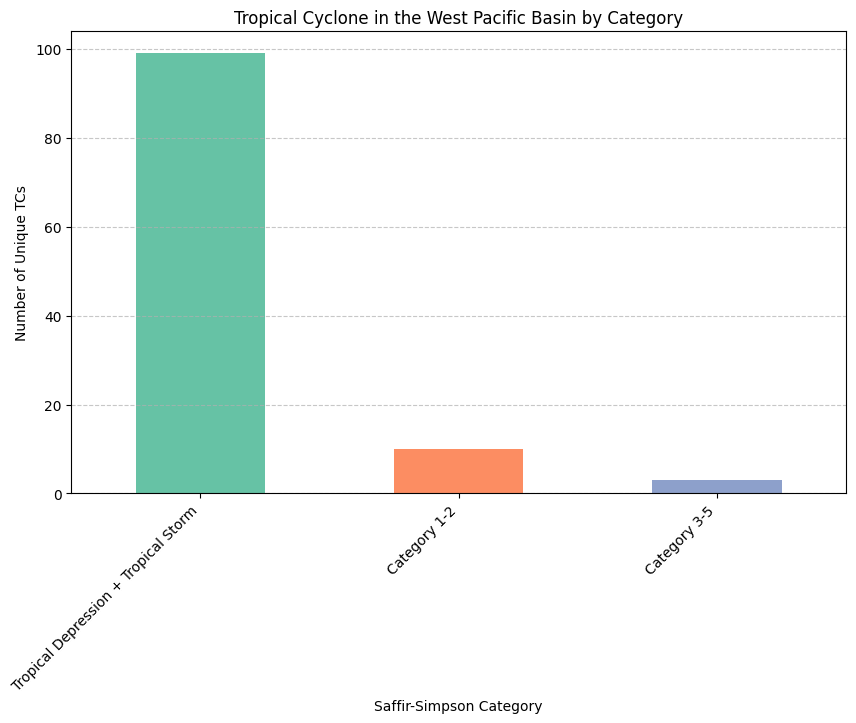

In [312]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts25 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year25 = landfall_counts25 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year25.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts25.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year25.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts25.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Round 6**

In [313]:
# Define file paths
tc_shapefile = "TRACK_ECMWF-IFS-HR_hist-1950_r6i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 1.69
Category 1-2: 0.28
Category 3-5: 0.03
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 110
Category 1-2: 18
Category 3-5: 2


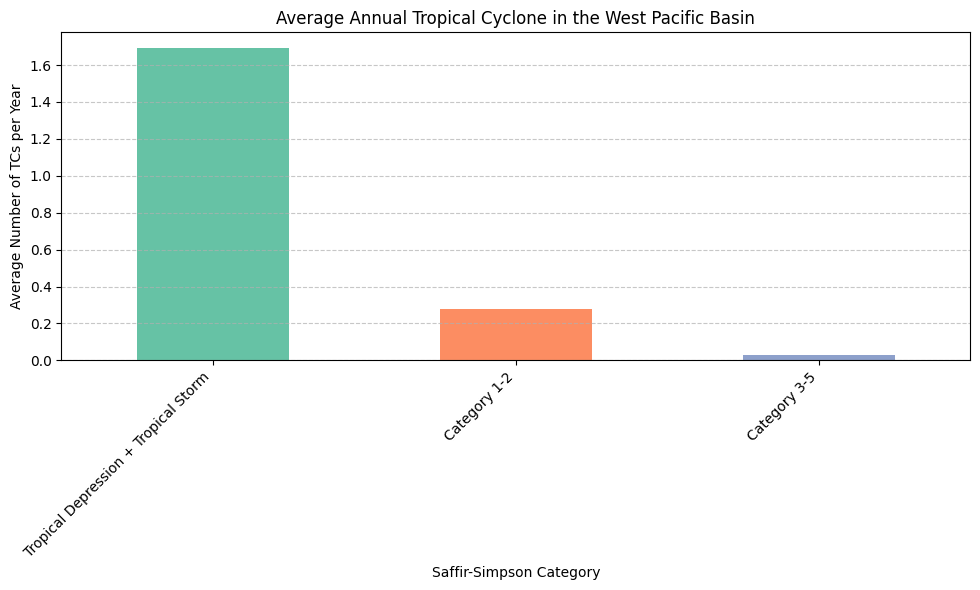

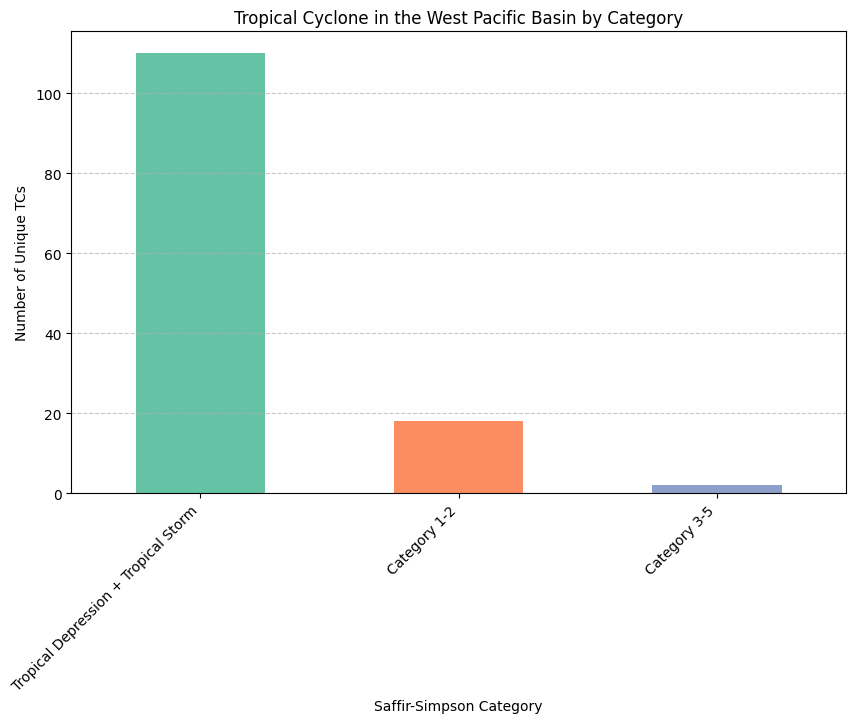

In [314]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts26 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year26 = landfall_counts26 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year26.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts26.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year26.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts26.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Result of ECMWF-IFS-HR**

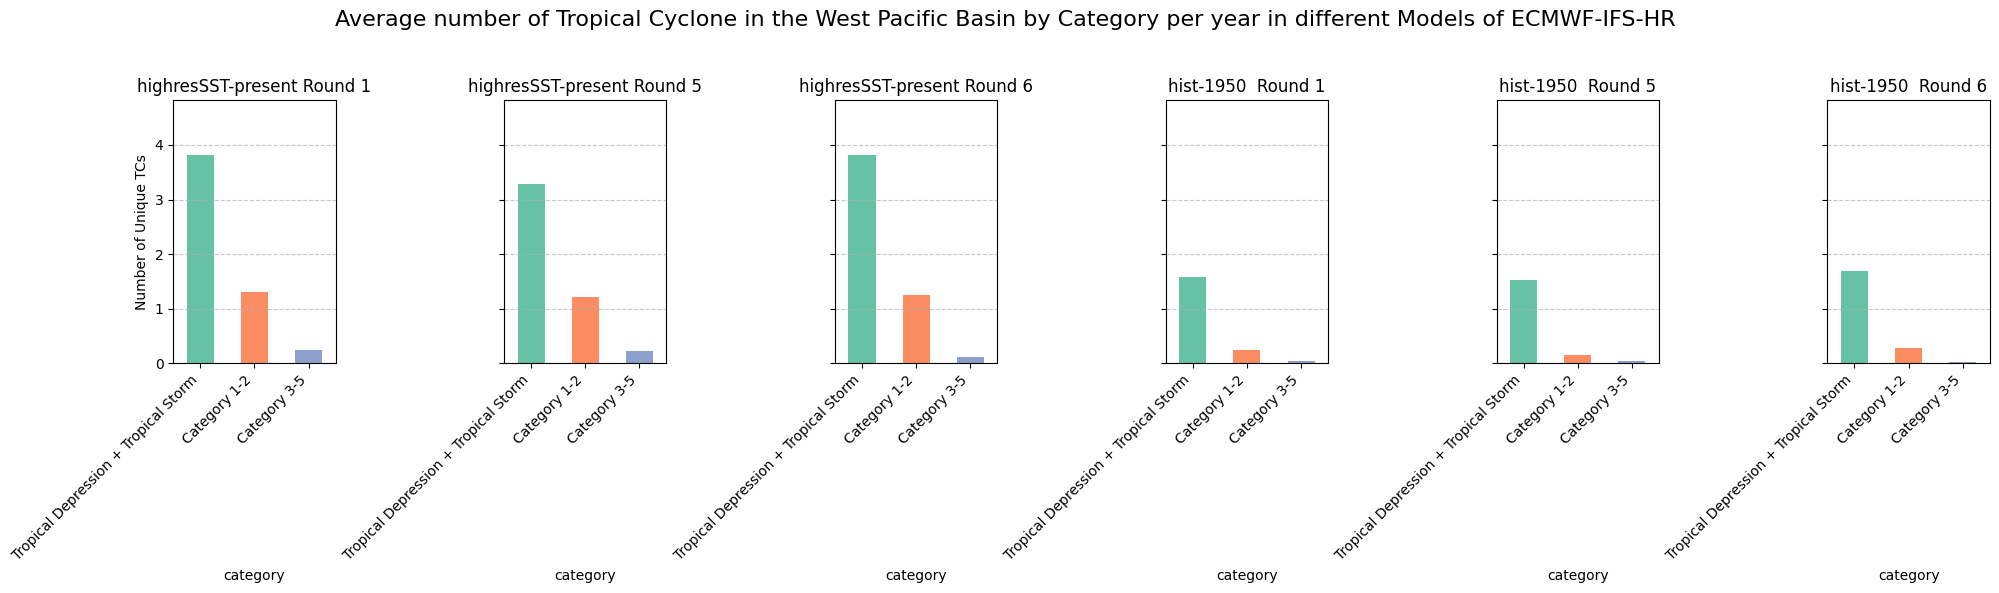

In [315]:
# List of landfall counts and their labels
landfall_counts_list = [
    (avg_tcs_per_year21, "highresSST-present Round 1"),
    (avg_tcs_per_year22, "highresSST-present Round 5"),
    (avg_tcs_per_year23, "highresSST-present Round 6"),
    (avg_tcs_per_year24, "hist-1950  Round 1"),
    (avg_tcs_per_year25, "hist-1950  Round 5"),
    (avg_tcs_per_year26, "hist-1950  Round 6")
]

# Create subplots (1 row, 6 columns)
fig, axes = plt.subplots(1, 6, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average number of Tropical Cyclone in the West Pacific Basin by Category per year in different Models of ECMWF-IFS-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

In [316]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("highresSST-present Round 1", landfall_counts21, avg_tcs_per_year21),
    ("highresSST-present Round 5", landfall_counts22, avg_tcs_per_year22),
    ("highresSST-present Round 6", landfall_counts23, avg_tcs_per_year23),
    ("hist-1950 Round 1", landfall_counts24, avg_tcs_per_year24),
    ("hist-1950 Round 5", landfall_counts25, avg_tcs_per_year25),
    ("hist-1950 Round 6", landfall_counts26, avg_tcs_per_year26)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of ECMWF-IFS-HR.csv', index=False)
print("\nData saved to 'Result of ECMWF-IFS-HR.csv' ")


Data saved to 'Result of ECMWF-IFS-HR.csv' 


# **2.2.4 EC-EARTH3P-HR**

# **highresSST-present**

**Round 1**

In [317]:
# Define file paths
tc_shapefile = "TRACK_EC-Earth3P-HR_highresSST-present_r1i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 2.23
Category 1-2: 0.34
Category 3-5: 0.06
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 145
Category 1-2: 22
Category 3-5: 4


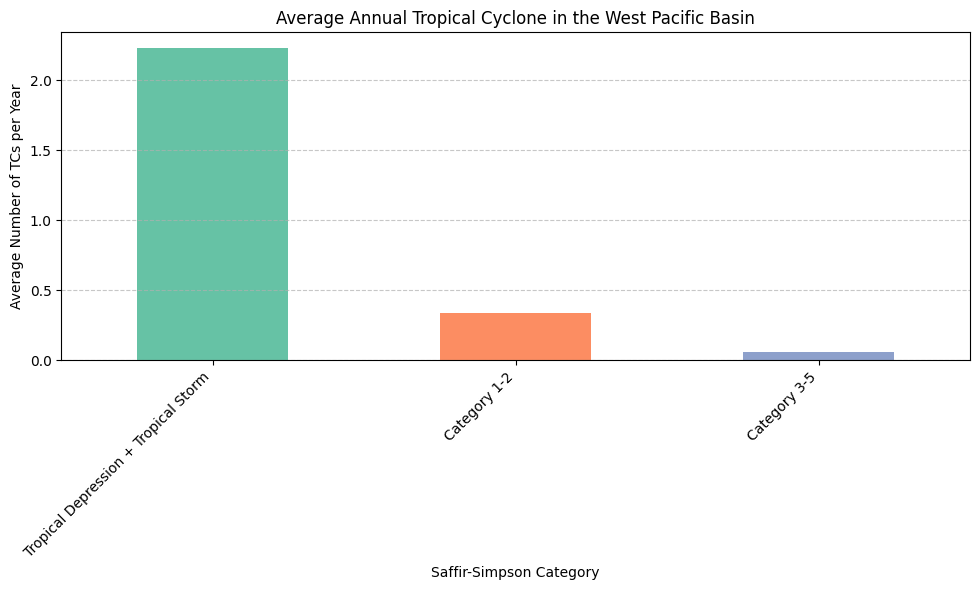

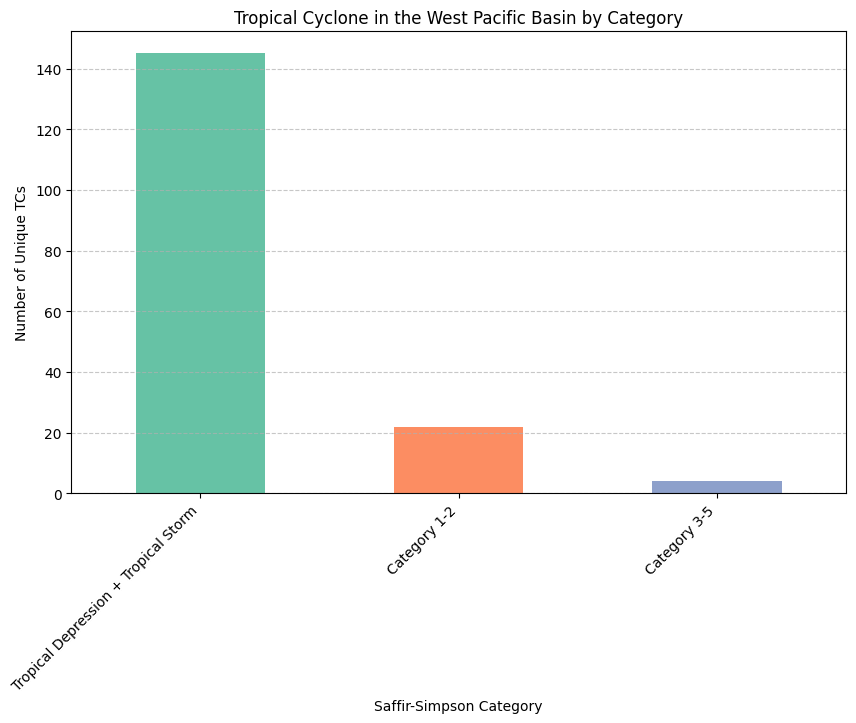

In [318]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts27 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year27 = landfall_counts27 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year27.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts27.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year27.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts27.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Round 2**

In [319]:
# Define file paths
tc_shapefile = "TRACK_EC-Earth3P-HR_highresSST-present_r2i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 2.45
Category 1-2: 0.32
Category 3-5: 0.05
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 159
Category 1-2: 21
Category 3-5: 3


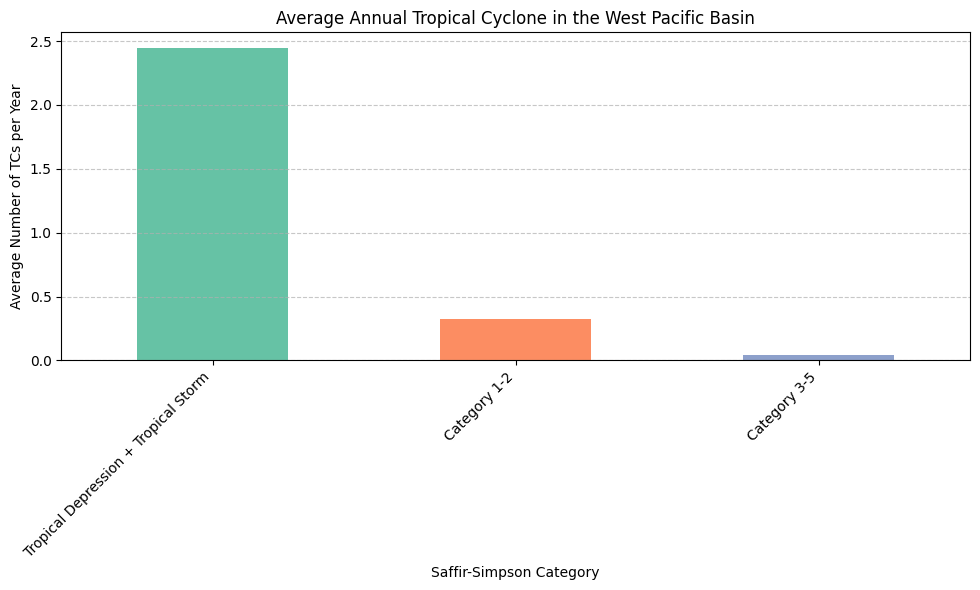

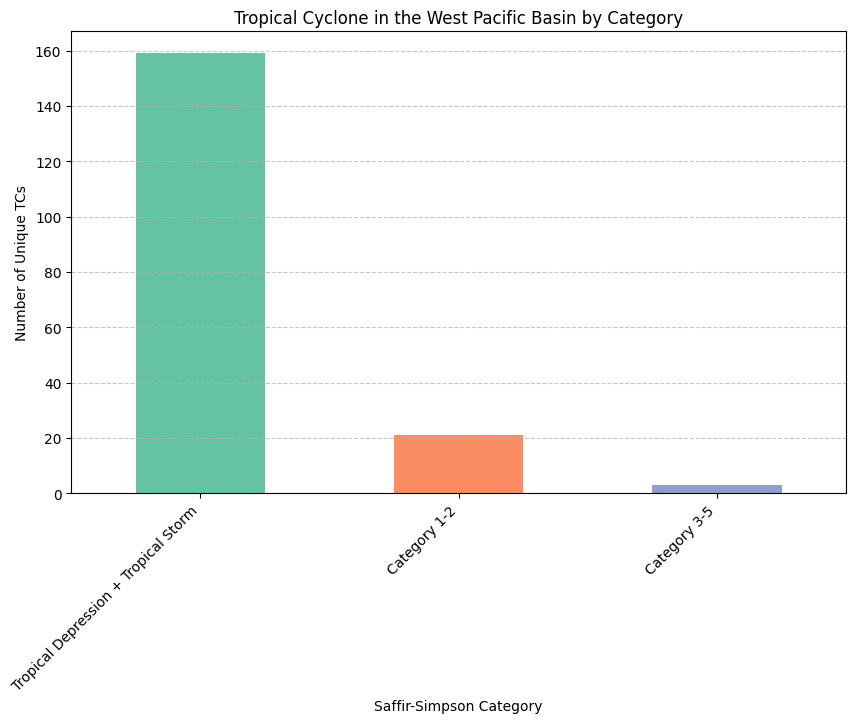

In [320]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts28 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year28 = landfall_counts28 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year28.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts28.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year28.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts28.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Round 3**

In [321]:
# Define file paths
tc_shapefile = "TRACK_EC-Earth3P-HR_highresSST-present_r3i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 2.57
Category 1-2: 0.32
Category 3-5: 0.06
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 167
Category 1-2: 21
Category 3-5: 4


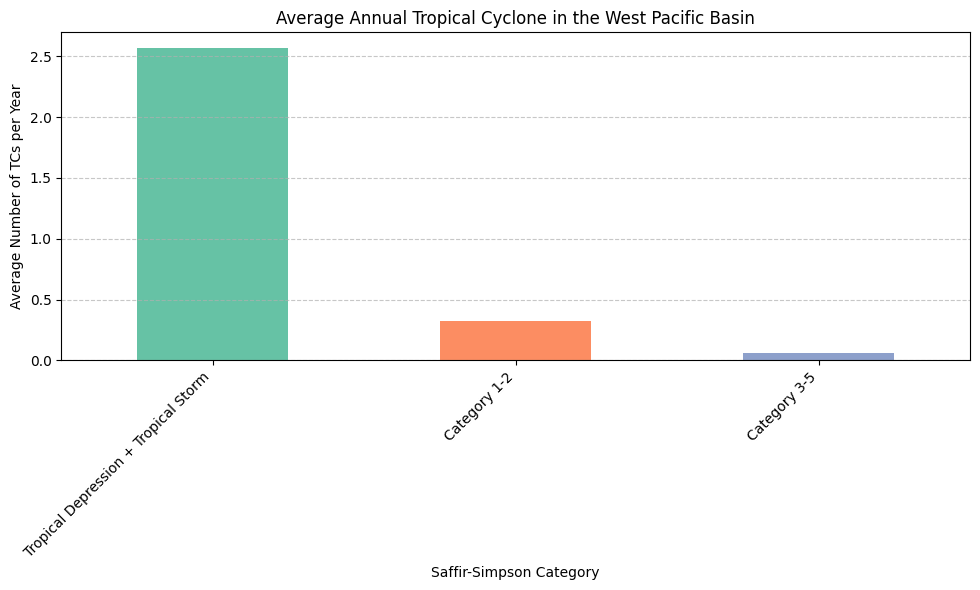

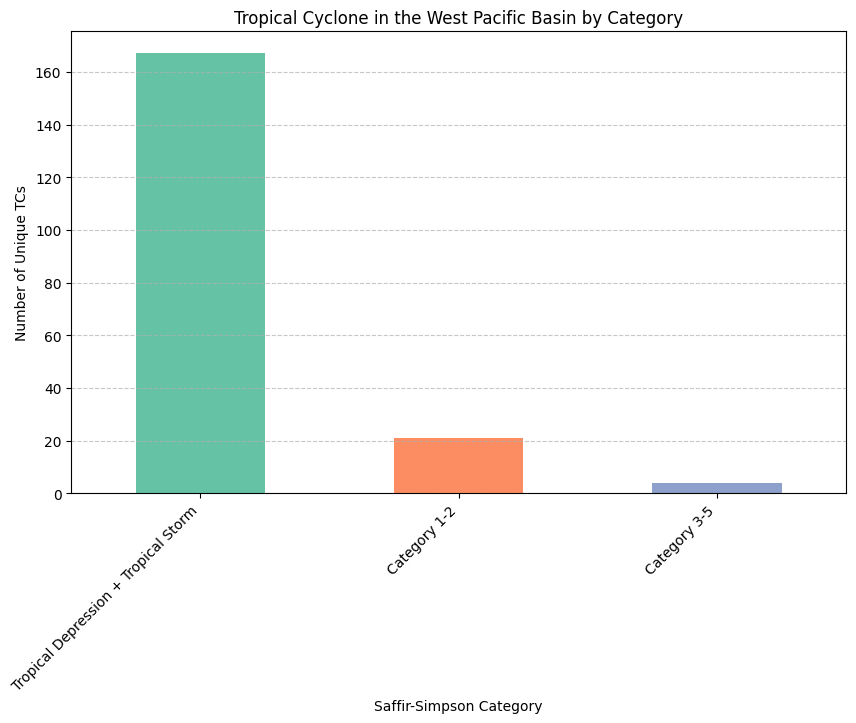

In [322]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts29 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year29 = landfall_counts29 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year29.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts29.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year29.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts29.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **hist-1950**

**round 1**

In [323]:
# Define file paths
tc_shapefile = "TRACK_EC-Earth3P-HR_hist-1950_r1i1p2f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 3.09
Category 1-2: 0.25
Category 3-5: 0.11
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 201
Category 1-2: 16
Category 3-5: 7


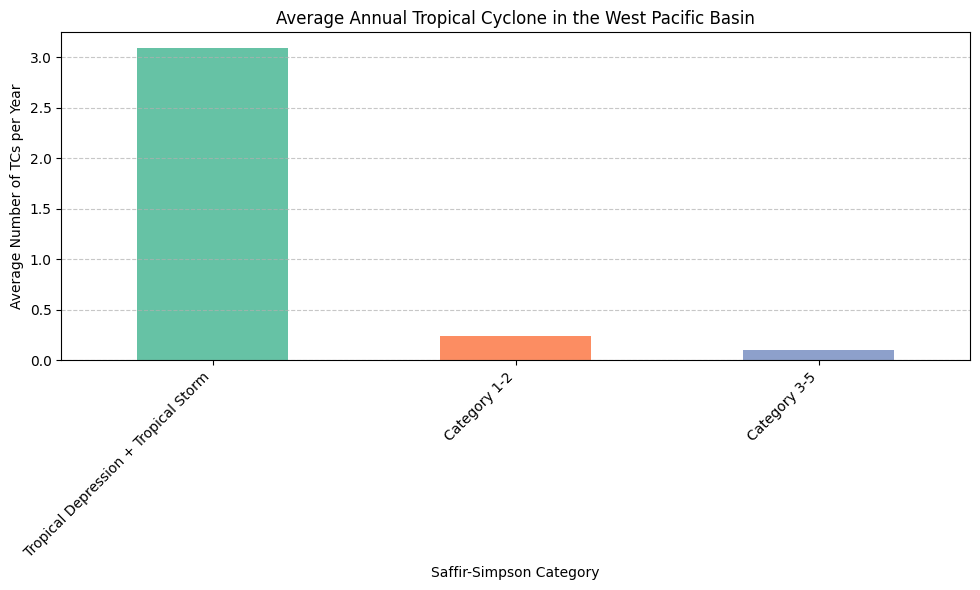

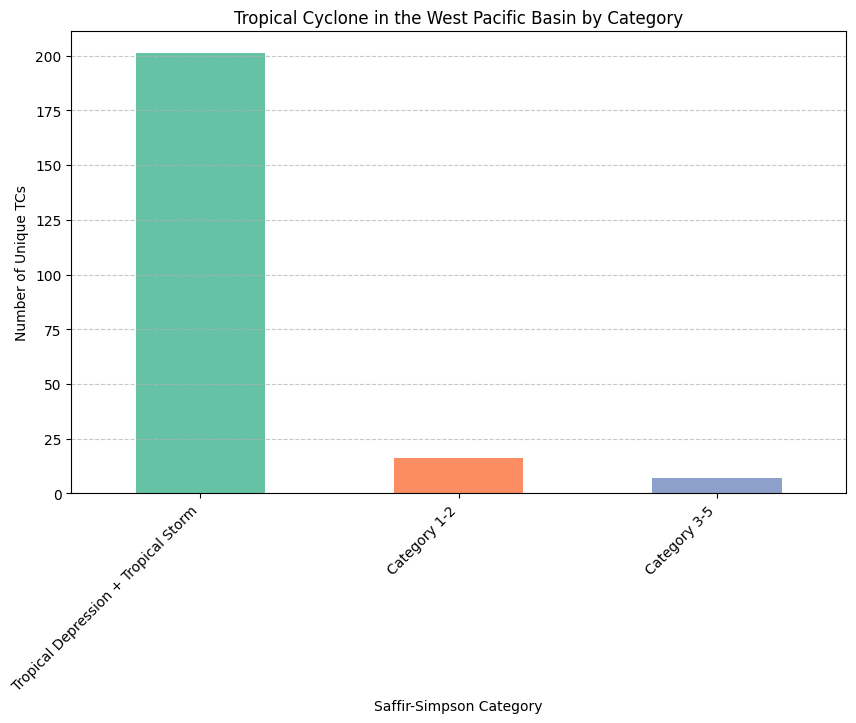

In [324]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts30 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year30 = landfall_counts30 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year30.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts30.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year30.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts30.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**round 2**

In [325]:
# Define file paths
tc_shapefile = "TRACK_EC-Earth3P-HR_hist-1950_r2i1p2f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 2.71
Category 1-2: 0.22
Category 3-5: 0.05
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 176
Category 1-2: 14
Category 3-5: 3


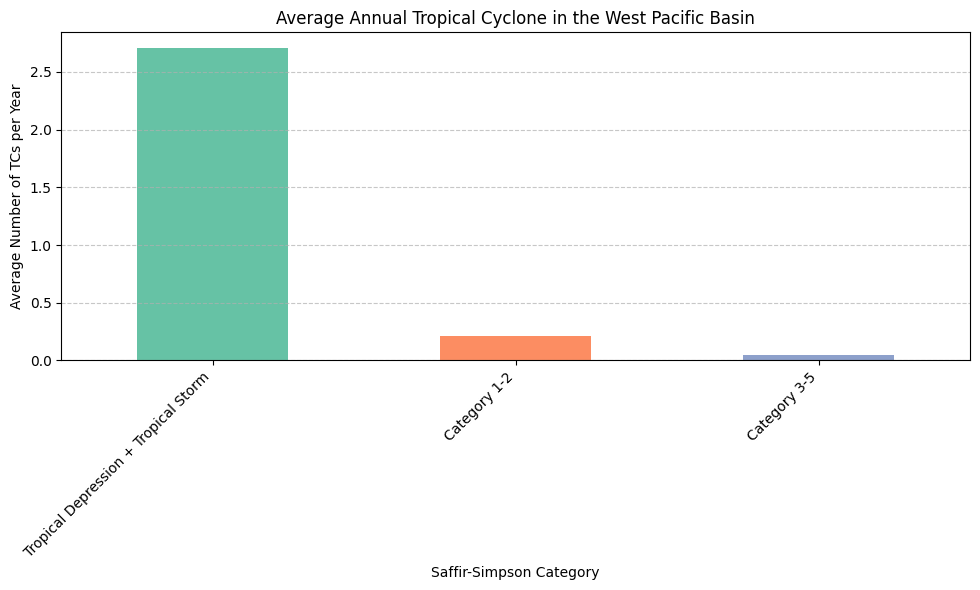

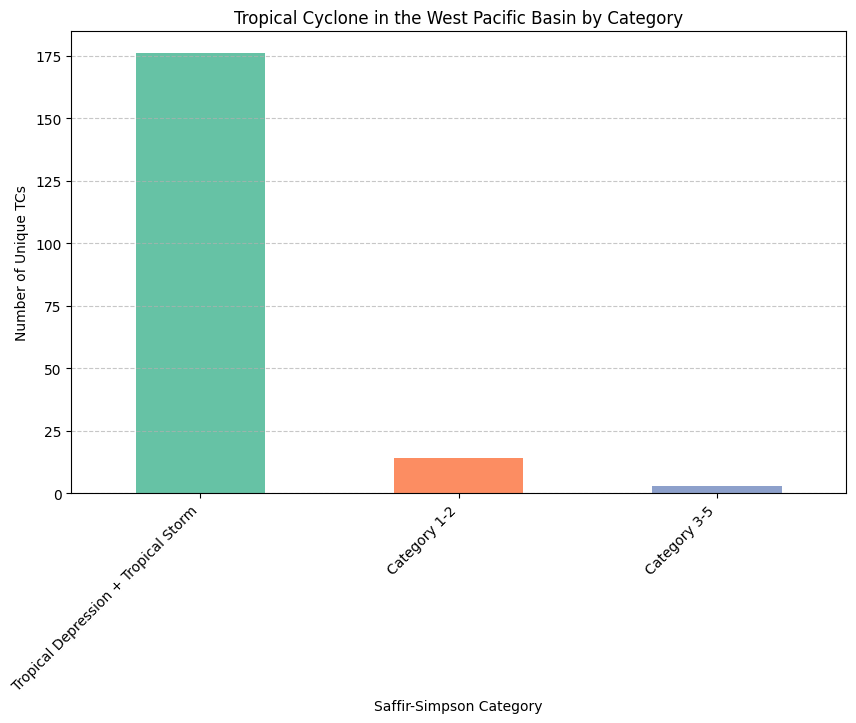

In [326]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts31 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year31 = landfall_counts31 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year31.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts31.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year31.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts31.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Result of EC-EARTH3P-HR**

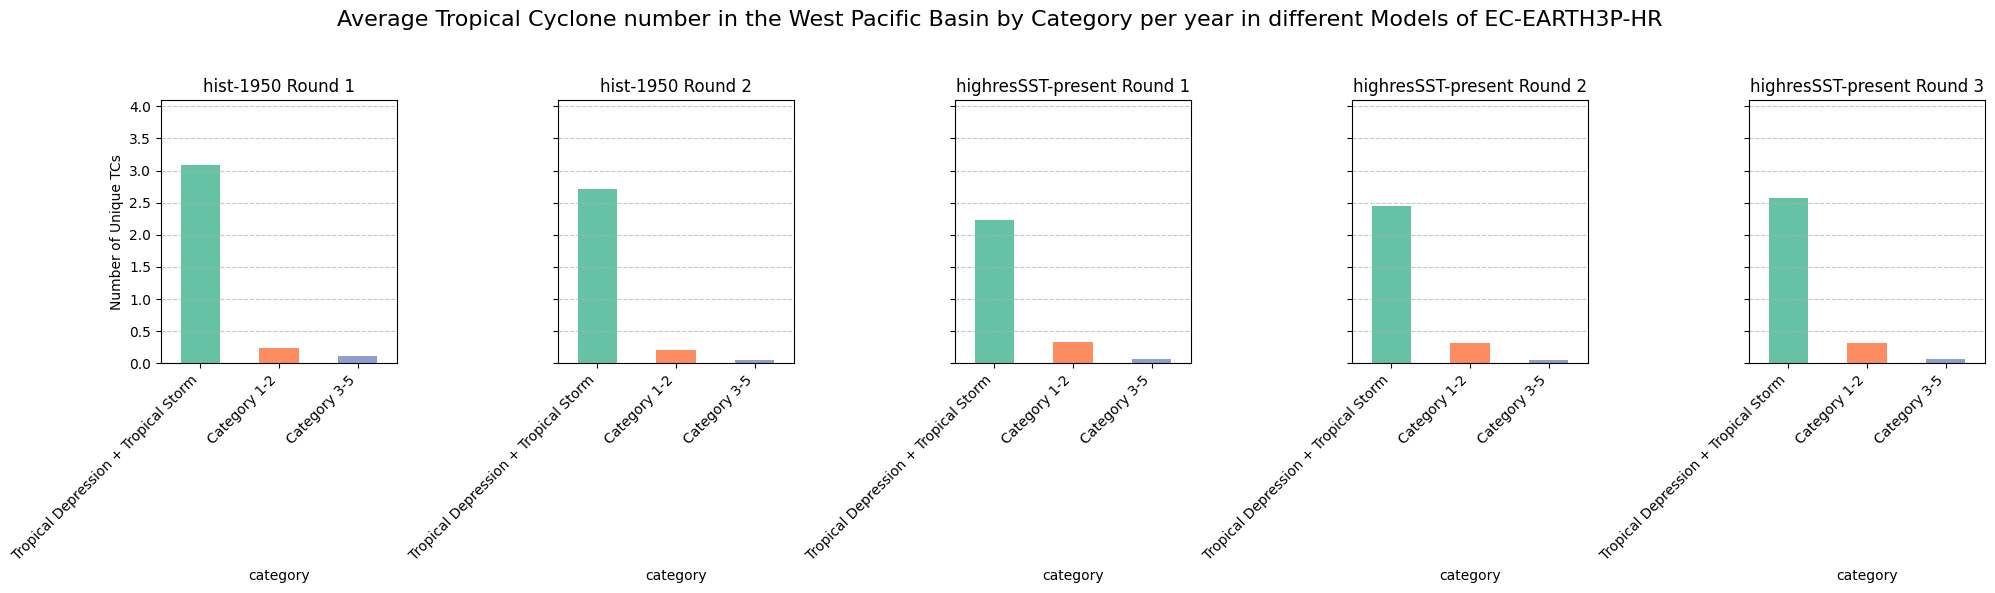

In [327]:
avg_landfall_counts_list = [
    (avg_tcs_per_year30, "hist-1950 Round 1"),
    (avg_tcs_per_year31, "hist-1950 Round 2"),
    (avg_tcs_per_year27, "highresSST-present Round 1"),
    (avg_tcs_per_year28, "highresSST-present Round 2"),
    (avg_tcs_per_year29, "highresSST-present Round 3")
]

# Create subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in avg_landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(avg_landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average Tropical Cyclone number in the West Pacific Basin by Category per year in different Models of EC-EARTH3P-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

In [328]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("hist-1950 Round 1", landfall_counts30, avg_tcs_per_year30),
    ("hist-1950 Round 2", landfall_counts31, avg_tcs_per_year31),
    ("highresSST-present Round 1", landfall_counts27, avg_tcs_per_year27),
    ("highresSST-present Round 2", landfall_counts28, avg_tcs_per_year28),
    ("highresSST-present Round 3", landfall_counts29, avg_tcs_per_year29)

]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of EC-EARTH3P-HR.csv', index=False)
print("\nData saved to 'Result of EC-EARTH3P-HR.csv' ")


Data saved to 'Result of EC-EARTH3P-HR.csv' 


# **2.2.5 CNRM-CM6-1-HR**

# **highresSST-present**

In [329]:
# Define file paths
tc_shapefile = "TRACK_CNRM-CM6-1-HR_highresSST-present_r1i1p1f2_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 6.89
Category 1-2: 3.43
Category 3-5: 1.80
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 448
Category 1-2: 223
Category 3-5: 117


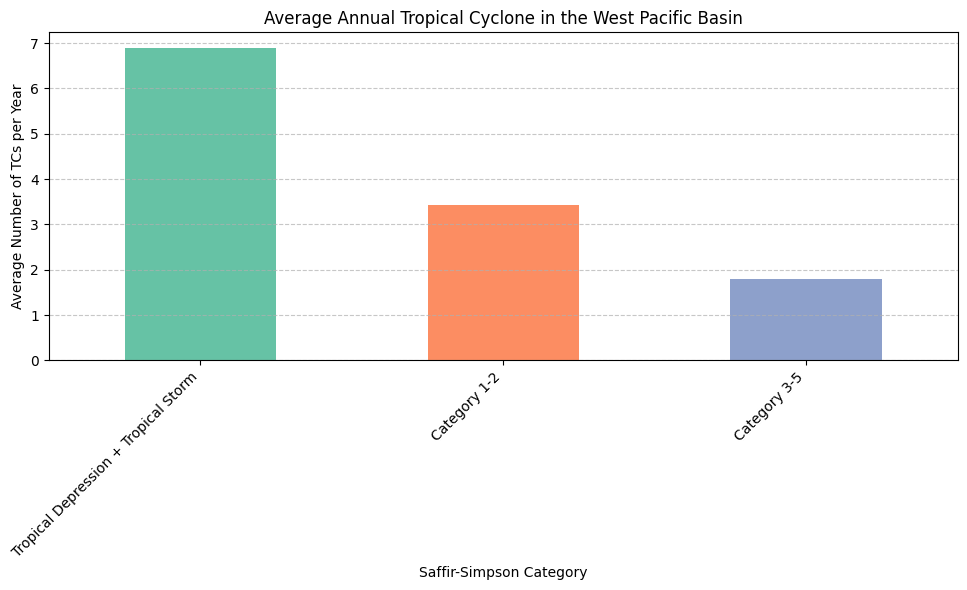

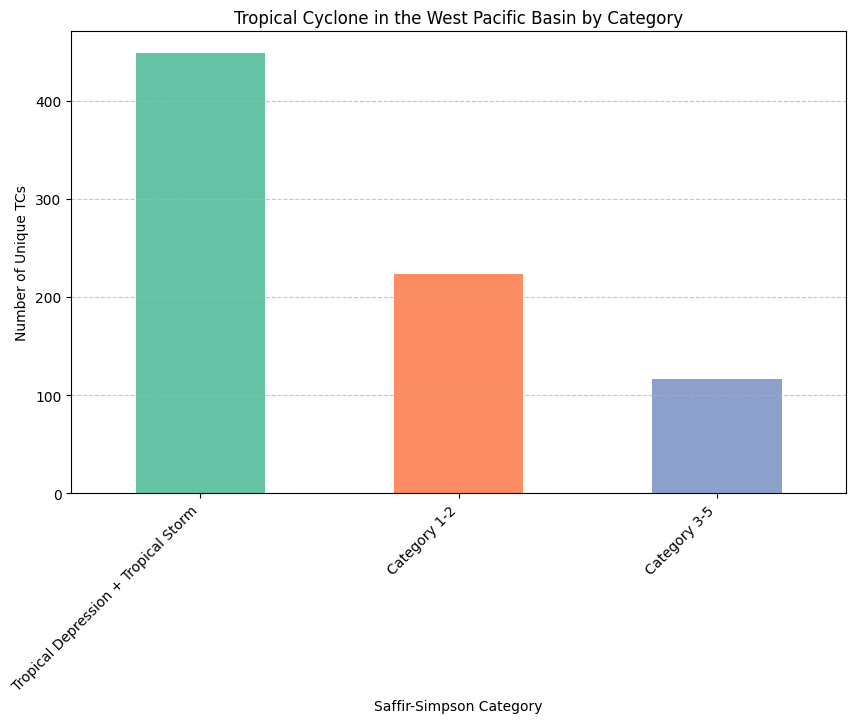

In [330]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts32 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs that make landfall
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year32 = landfall_counts32 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year32.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts32.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year32.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts32.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **hist-1950**

In [331]:
# Define file paths
tc_shapefile = "TRACK_CNRM-CM6-1-HR_hist-1950_r1i1p1f2_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 8.00
Category 1-2: 4.82
Category 3-5: 1.48
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 520
Category 1-2: 313
Category 3-5: 96


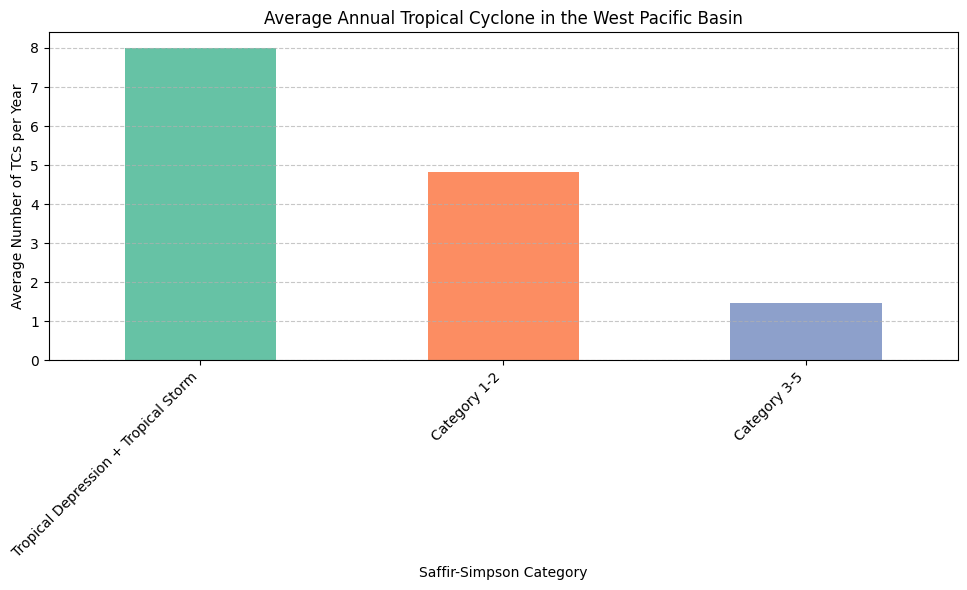

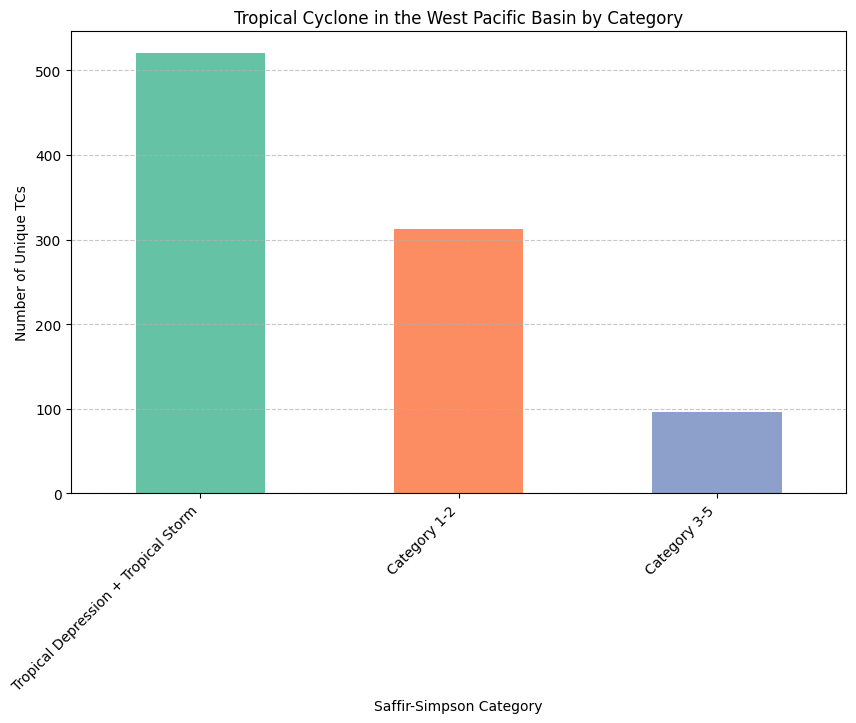

In [332]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts33 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year33 = landfall_counts33 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year33.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts33.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year33.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts33.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Result of CNRM-CM6-1-HR**

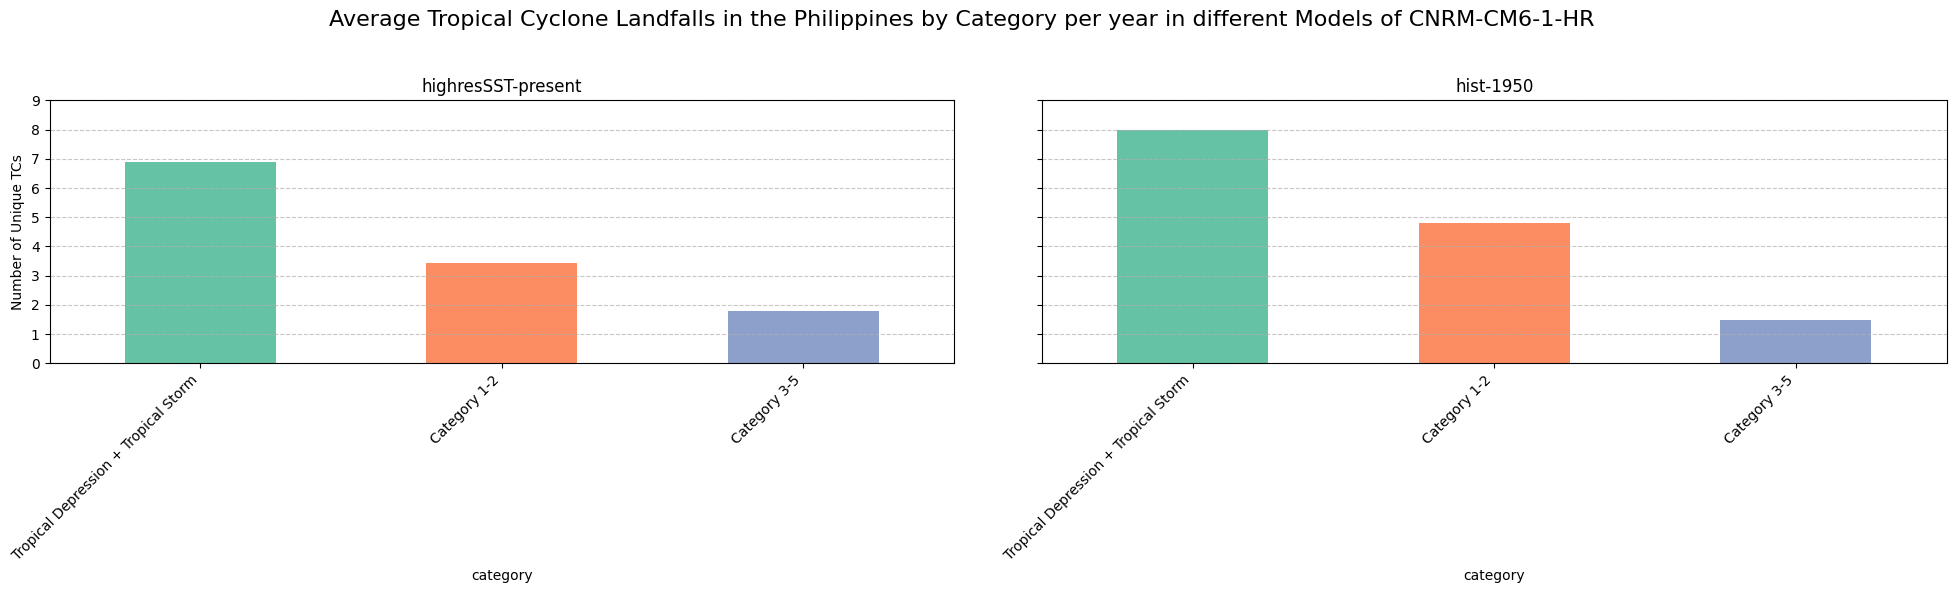

In [333]:
# List of landfall counts and their labels
avg_landfall_counts_list = [
    (avg_tcs_per_year32, "highresSST-present"),
    (avg_tcs_per_year33, "hist-1950")
]

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in avg_landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(avg_landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average Tropical Cyclone Landfalls in the Philippines by Category per year in different Models of CNRM-CM6-1-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

In [334]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("highresSST-present", landfall_counts32, avg_tcs_per_year32),
    ("hist-1950", landfall_counts33, avg_tcs_per_year33)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of CNRM-CM6-1-HR.csv', index=False)
print("\nData saved to 'Result of CNRM-CM6-1-HR.csv' ")


Data saved to 'Result of CNRM-CM6-1-HR.csv' 


# **2.2.6 CMCC-CM2-VHR4**

# **highresSST-present**

In [335]:
# Define file paths
tc_shapefile = "TRACK_CMCC-CM2-VHR4_highresSST-present_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 2.88
Category 1-2: 2.97
Category 3-5: 0.94
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 187
Category 1-2: 193
Category 3-5: 61


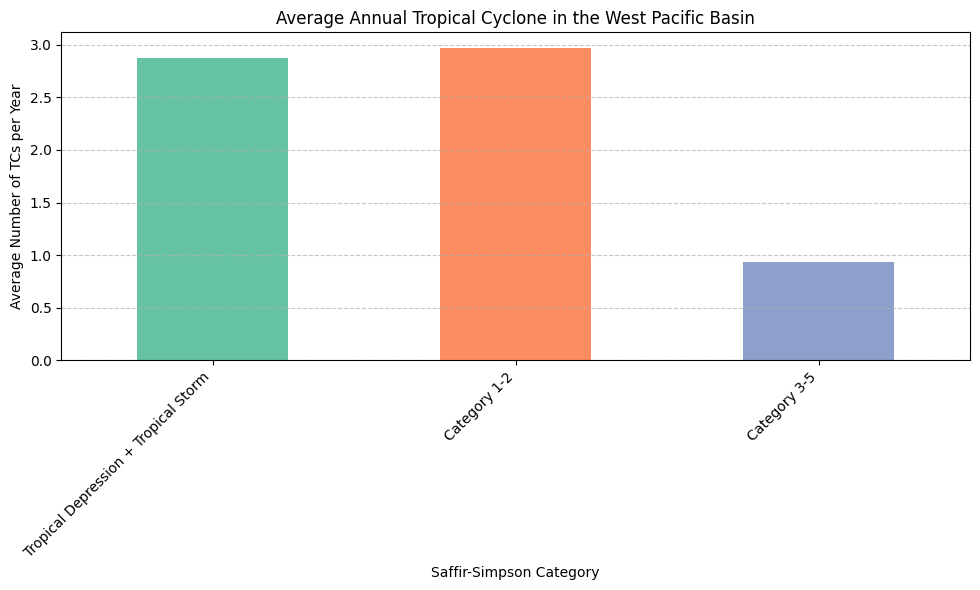

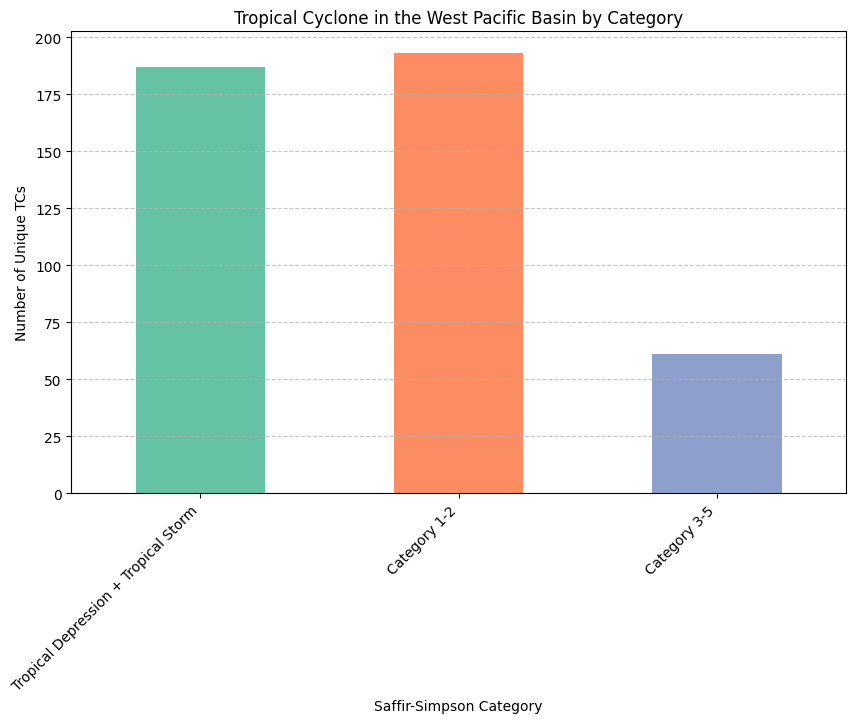

In [336]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts34 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs that make landfall
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year34 = landfall_counts34 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year34.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts34.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year34.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts34.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **hist-1950**

In [337]:
# Define file paths
tc_shapefile = "TRACK_CMCC-CM2-VHR4_hist-1950_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone in West Pacific Basin per year:
Tropical Depression + Tropical Storm: 0.74
Category 1-2: 0.49
Category 3-5: 0.02
Number of unique tropical cyclones in the West Pacific Basin by category:
Tropical Depression + Tropical Storm: 48
Category 1-2: 32
Category 3-5: 1


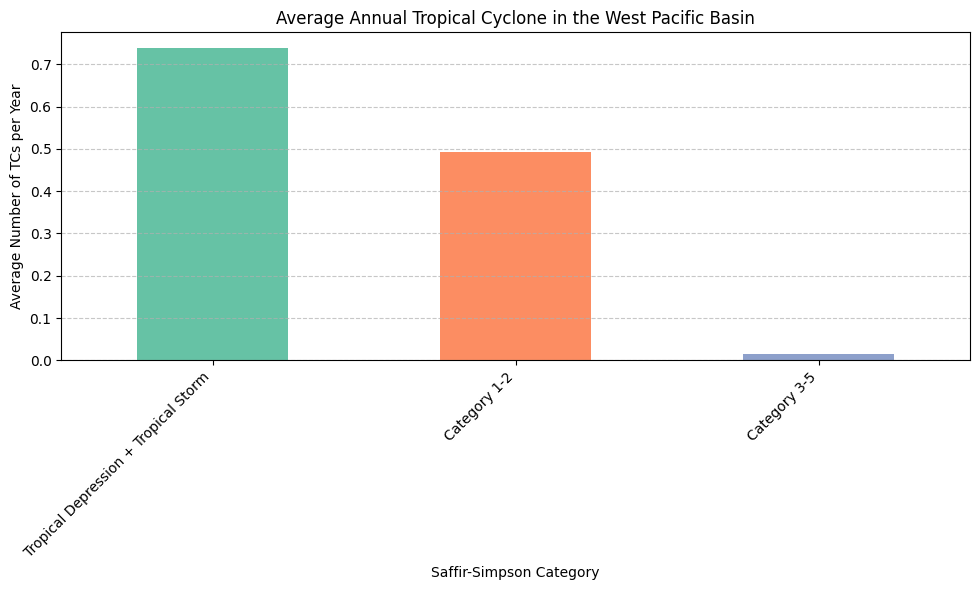

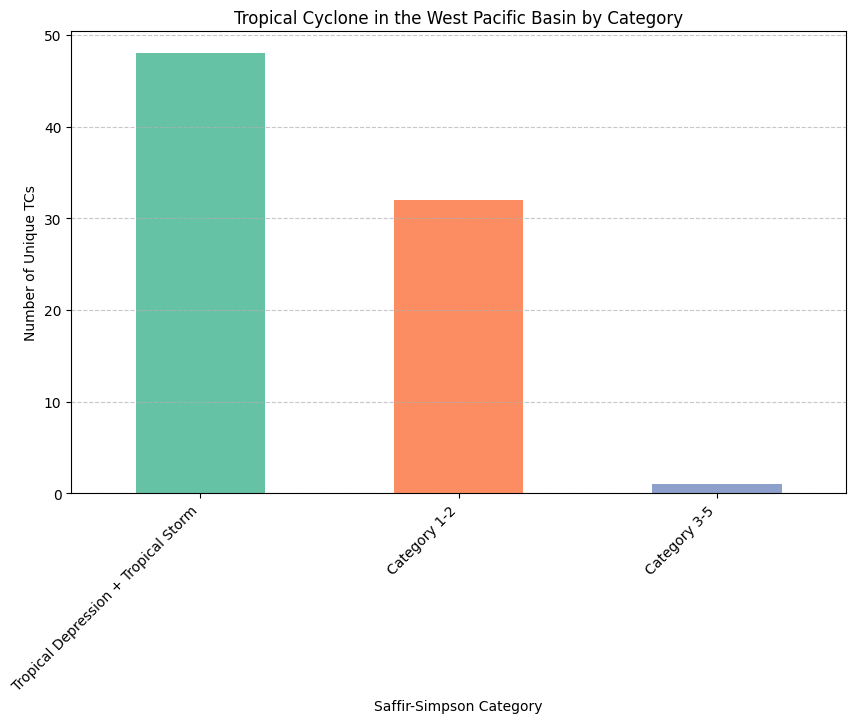

In [338]:
# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization
tc_tracks['category'] = tc_tracks['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed  to assign a single category
tc_max_wind = tc_tracks.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts35 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)

# Count unique TCs
unique_landfall_tcs = tc_tracks['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year35 = landfall_counts35 / total_years

print("\nAverage number of tropical cyclone in West Pacific Basin per year:")
for category, avg in avg_tcs_per_year35.items():
    print(f"{category}: {avg:.2f}")

print("Number of unique tropical cyclones in the West Pacific Basin by category:")
for category, count in landfall_counts35.items():
    print(f"{category}: {count}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year35.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone in the West Pacific Basin')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts35.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone in the West Pacific Basin by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Result of CMCC-CM2-VHR4**

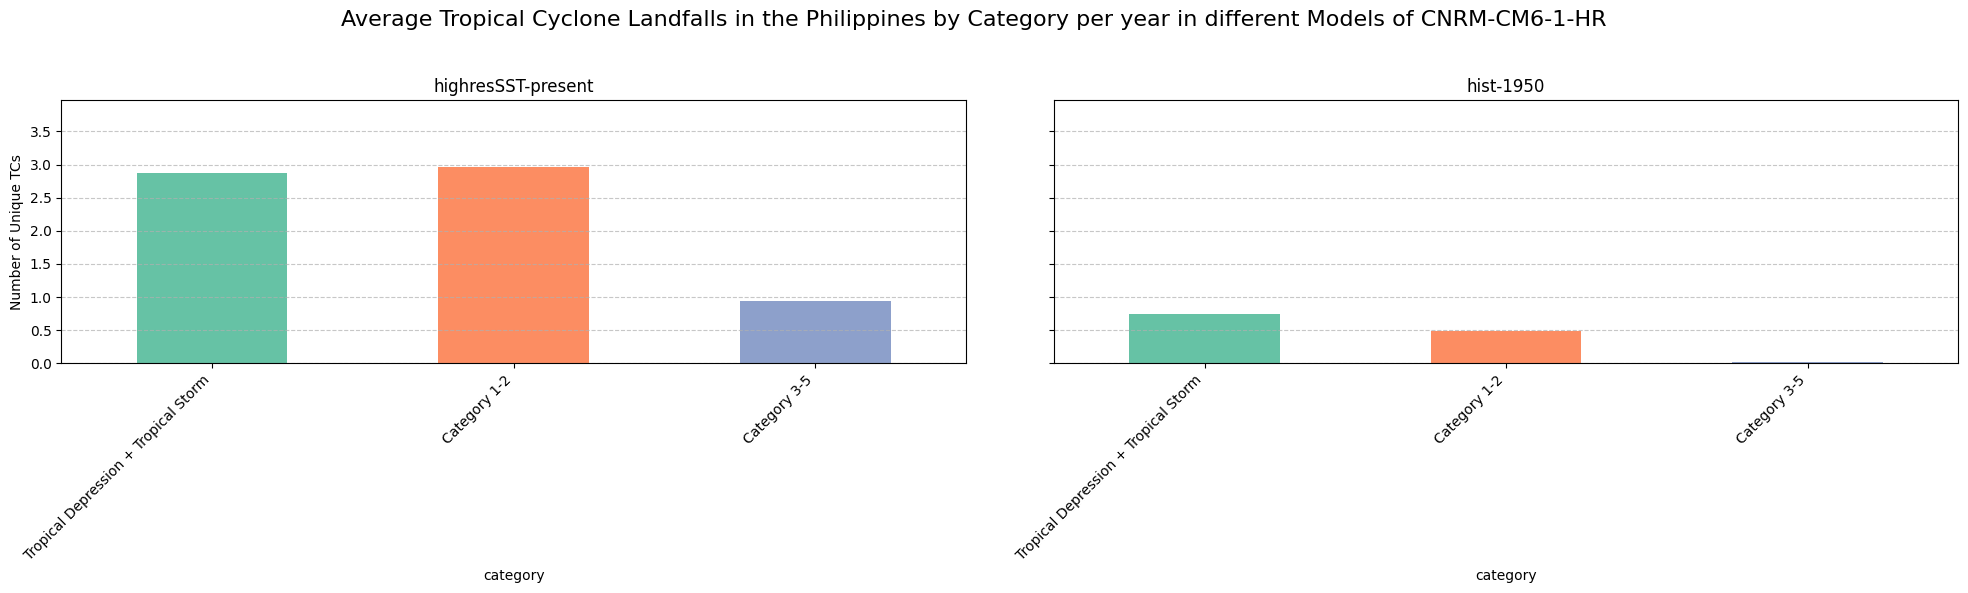

In [339]:
# List of landfall counts and their labels
avg_landfall_counts_list = [
    (avg_tcs_per_year34, "highresSST-present"),
    (avg_tcs_per_year35, "hist-1950")
]

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in avg_landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(avg_landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average Tropical Cyclone Landfalls in the Philippines by Category per year in different Models of CNRM-CM6-1-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

In [340]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("highresSST-present", landfall_counts34, avg_tcs_per_year34),
    ("hist-1950", landfall_counts35, avg_tcs_per_year35)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of CMCC-CM2-VHR4.csv', index=False)
print("\nData saved to 'Result of CMCC-CM2-VHR4.csv' ")


Data saved to 'Result of CMCC-CM2-VHR4.csv' 


# **Comparsion between IBTRACS and TRACK**

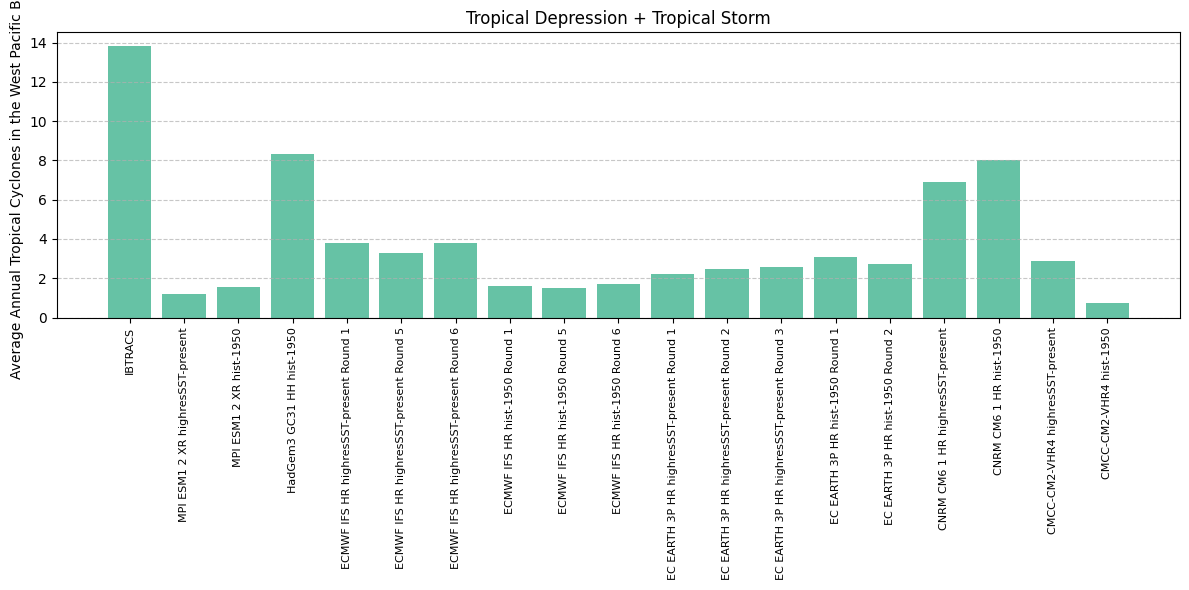

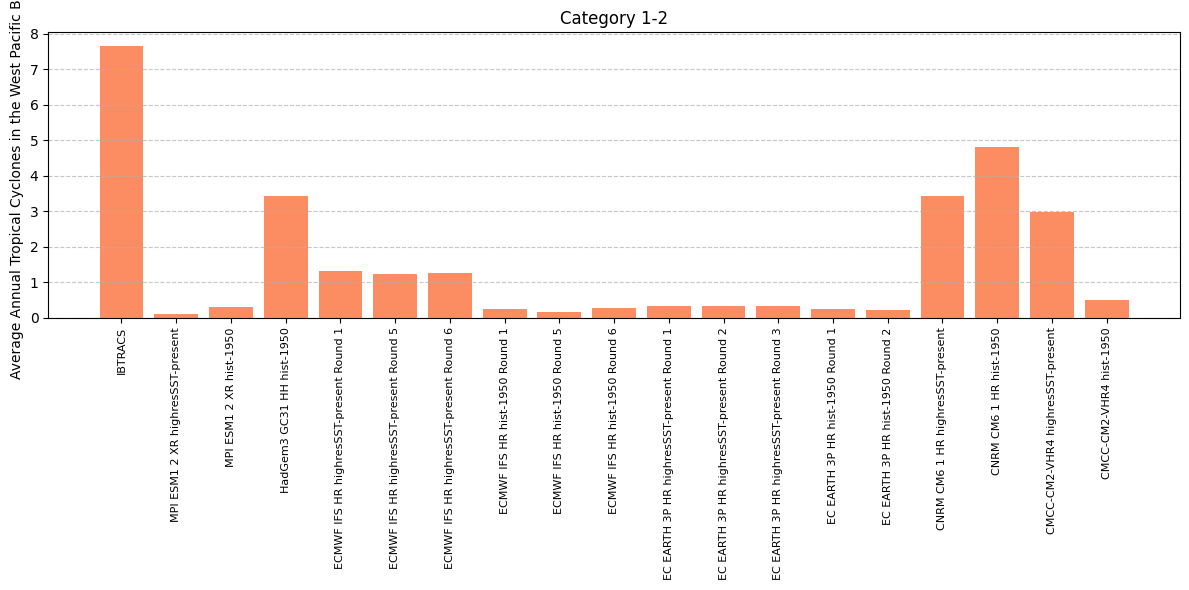

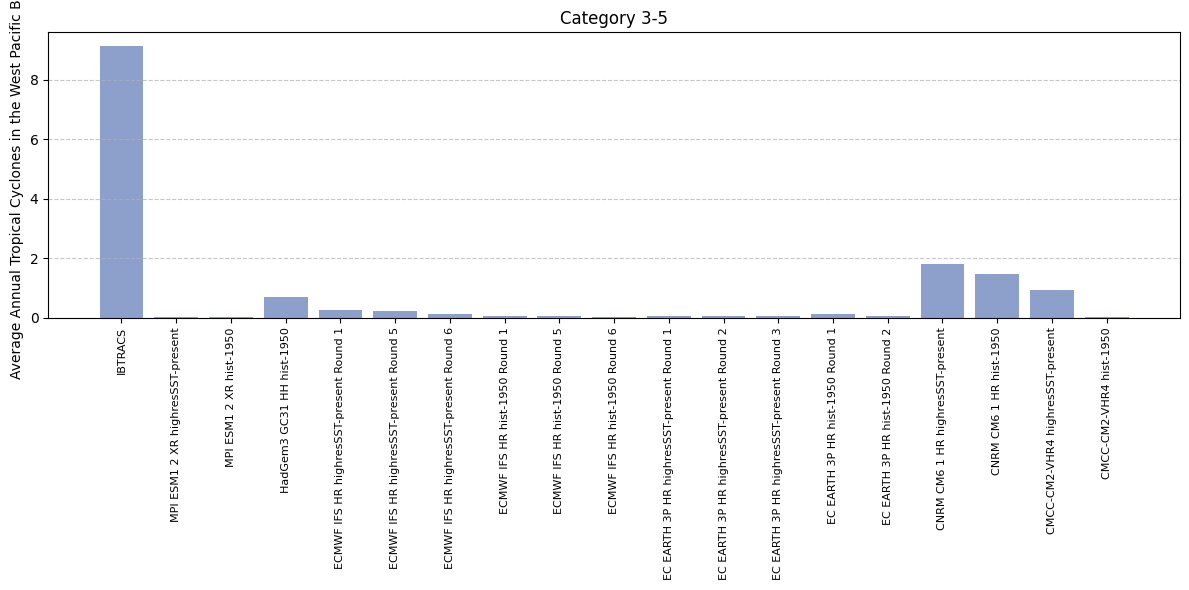

In [341]:
# title for x-axis
time_periods = ["IBTRACS",
                "MPI ESM1 2 XR highresSST-present", "MPI ESM1 2 XR hist-1950",
                "HadGem3 GC31 HH hist-1950",
                "ECMWF IFS HR highresSST-present Round 1",  "ECMWF IFS HR highresSST-present Round 5",  "ECMWF IFS HR highresSST-present Round 6",
                "ECMWF IFS HR hist-1950 Round 1", "ECMWF IFS HR hist-1950 Round 5", "ECMWF IFS HR hist-1950 Round 6",
                "EC EARTH 3P HR highresSST-present Round 1", "EC EARTH 3P HR highresSST-present Round 2", "EC EARTH 3P HR highresSST-present Round 3",
                "EC EARTH 3P HR hist-1950 Round 1",  "EC EARTH 3P HR hist-1950 Round 2",
                "CNRM CM6 1 HR highresSST-present", "CNRM CM6 1 HR hist-1950",
                "CMCC-CM2-VHR4 highresSST-present","CMCC-CM2-VHR4 hist-1950"
                ]

# Extract counts for each category across the three time periods
ts_td_counts = [
    avg_tcs_per_yearA["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year18["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year19["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year20["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year21["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year22["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year23["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year24["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year25["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year26["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year27["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year28["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year29["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year30["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year31["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year32["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year33["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year34["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year35["Tropical Depression + Tropical Storm"]
]
cat1_2_counts = [
    avg_tcs_per_yearA["Category 1-2"],
    avg_tcs_per_year18["Category 1-2"],
    avg_tcs_per_year19["Category 1-2"],
    avg_tcs_per_year20["Category 1-2"],
    avg_tcs_per_year21["Category 1-2"],
    avg_tcs_per_year22["Category 1-2"],
    avg_tcs_per_year23["Category 1-2"],
    avg_tcs_per_year24["Category 1-2"],
    avg_tcs_per_year25["Category 1-2"],
    avg_tcs_per_year26["Category 1-2"],
    avg_tcs_per_year27["Category 1-2"],
    avg_tcs_per_year28["Category 1-2"],
    avg_tcs_per_year29["Category 1-2"],
    avg_tcs_per_year30["Category 1-2"],
    avg_tcs_per_year31["Category 1-2"],
    avg_tcs_per_year32["Category 1-2"],
    avg_tcs_per_year33["Category 1-2"],
    avg_tcs_per_year34["Category 1-2"],
    avg_tcs_per_year35["Category 1-2"]
]

cat3_5_counts = [
    avg_tcs_per_yearA["Category 3-5"],
    avg_tcs_per_year18["Category 3-5"],
    avg_tcs_per_year19["Category 3-5"],
    avg_tcs_per_year20["Category 3-5"],
    avg_tcs_per_year21["Category 3-5"],
    avg_tcs_per_year22["Category 3-5"],
    avg_tcs_per_year23["Category 3-5"],
    avg_tcs_per_year24["Category 3-5"],
    avg_tcs_per_year25["Category 3-5"],
    avg_tcs_per_year26["Category 3-5"],
    avg_tcs_per_year27["Category 3-5"],
    avg_tcs_per_year28["Category 3-5"],
    avg_tcs_per_year29["Category 3-5"],
    avg_tcs_per_year30["Category 3-5"],
    avg_tcs_per_year31["Category 3-5"],
    avg_tcs_per_year32["Category 3-5"],
    avg_tcs_per_year33["Category 3-5"],
    avg_tcs_per_year34["Category 3-5"],
    avg_tcs_per_year35["Category 3-5"]
]

# Plot 1: Tropical Depression + Tropical Storm
plt.figure(figsize=(12, 6))
plt.bar(time_periods, ts_td_counts, color='#66c2a5')
plt.title('Tropical Depression + Tropical Storm')
plt.ylabel('Average Annual Tropical Cyclones in the West Pacific Basin')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Category 1-2
plt.figure(figsize=(12, 6))
plt.bar(time_periods, cat1_2_counts, color='#fc8d62')
plt.title('Category 1-2')
plt.ylabel('Average Annual Tropical Cyclones in the West Pacific Basin')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 3: Category 3-5
plt.figure(figsize=(12, 6))
plt.bar(time_periods, cat3_5_counts, color='#8da0cb')
plt.title('Category 3-5')
plt.ylabel('Average Annual Tropical Cyclones in the West Pacific Basin')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

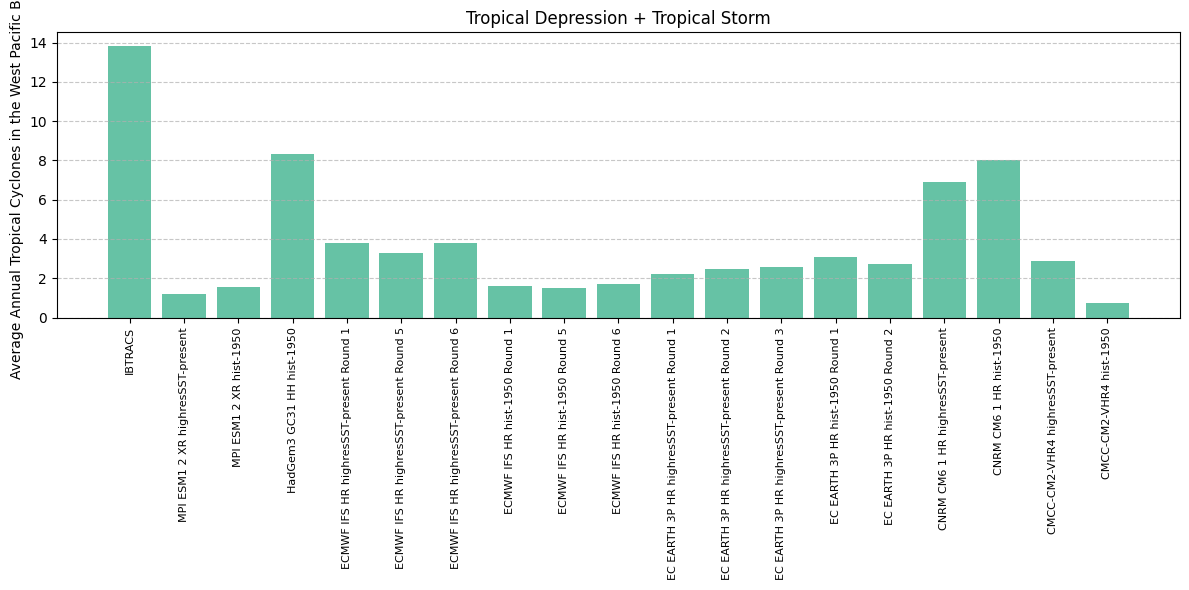

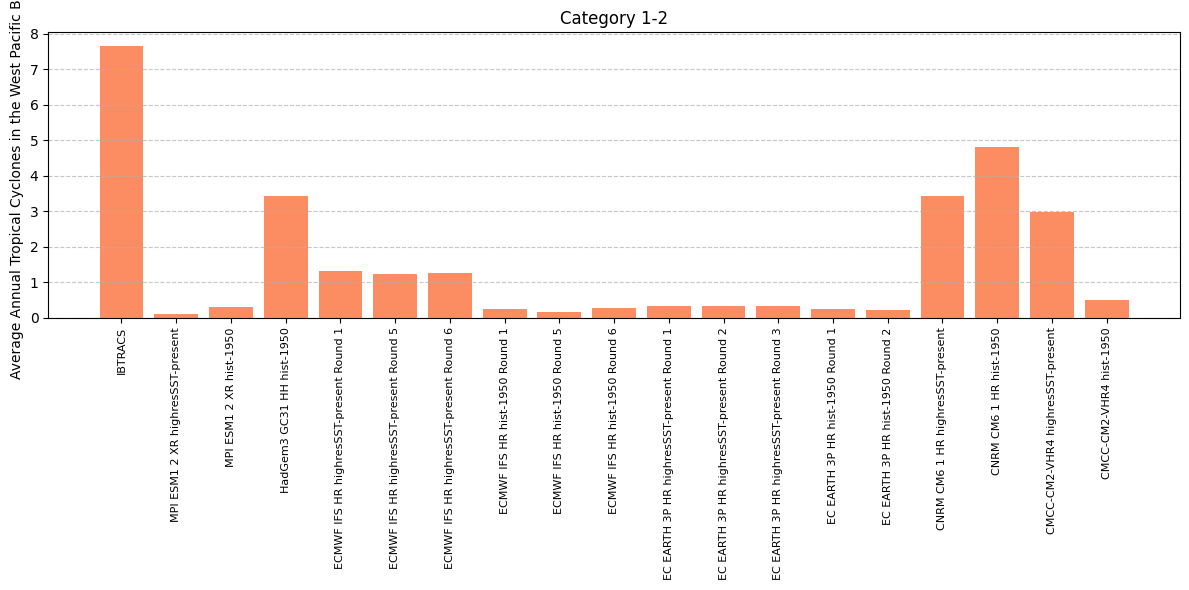

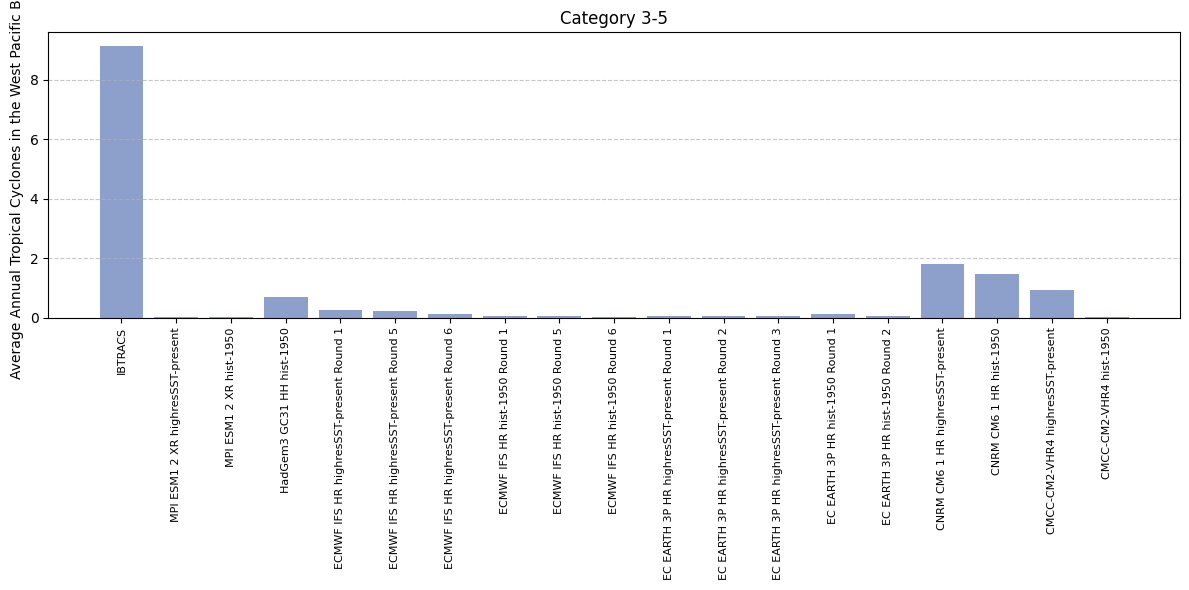

In [342]:
# title for x-axis
time_periods = ["IBTRACS",

                "MPI ESM1 2 XR highresSST-present", "MPI ESM1 2 XR hist-1950",


                "HadGem3 GC31 HH hist-1950",


                "ECMWF IFS HR highresSST-present Round 1",  "ECMWF IFS HR highresSST-present Round 5",  "ECMWF IFS HR highresSST-present Round 6",


                "ECMWF IFS HR hist-1950 Round 1", "ECMWF IFS HR hist-1950 Round 5", "ECMWF IFS HR hist-1950 Round 6",


                "EC EARTH 3P HR highresSST-present Round 1", "EC EARTH 3P HR highresSST-present Round 2", "EC EARTH 3P HR highresSST-present Round 3",


                "EC EARTH 3P HR hist-1950 Round 1",  "EC EARTH 3P HR hist-1950 Round 2",


                "CNRM CM6 1 HR highresSST-present", "CNRM CM6 1 HR hist-1950",


                "CMCC-CM2-VHR4 highresSST-present","CMCC-CM2-VHR4 hist-1950"


                ]

# Extract counts for each category across the three time periods
ts_td_counts = [
    avg_tcs_per_yearA["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year18["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year19["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year20["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year21["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year22["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year23["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year24["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year25["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year26["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year27["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year28["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year29["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year30["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year31["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year32["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year33["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year34["Tropical Depression + Tropical Storm"],
    avg_tcs_per_year35["Tropical Depression + Tropical Storm"]
]
cat1_2_counts = [
    avg_tcs_per_yearA["Category 1-2"],
    avg_tcs_per_year18["Category 1-2"],
    avg_tcs_per_year19["Category 1-2"],
    avg_tcs_per_year20["Category 1-2"],
    avg_tcs_per_year21["Category 1-2"],
    avg_tcs_per_year22["Category 1-2"],
    avg_tcs_per_year23["Category 1-2"],
    avg_tcs_per_year24["Category 1-2"],
    avg_tcs_per_year25["Category 1-2"],
    avg_tcs_per_year26["Category 1-2"],
    avg_tcs_per_year27["Category 1-2"],
    avg_tcs_per_year28["Category 1-2"],
    avg_tcs_per_year29["Category 1-2"],
    avg_tcs_per_year30["Category 1-2"],
    avg_tcs_per_year31["Category 1-2"],
    avg_tcs_per_year32["Category 1-2"],
    avg_tcs_per_year33["Category 1-2"],
    avg_tcs_per_year34["Category 1-2"],
    avg_tcs_per_year35["Category 1-2"]
]

cat3_5_counts = [
    avg_tcs_per_yearA["Category 3-5"],
    avg_tcs_per_year18["Category 3-5"],
    avg_tcs_per_year19["Category 3-5"],
    avg_tcs_per_year20["Category 3-5"],
    avg_tcs_per_year21["Category 3-5"],
    avg_tcs_per_year22["Category 3-5"],
    avg_tcs_per_year23["Category 3-5"],
    avg_tcs_per_year24["Category 3-5"],
    avg_tcs_per_year25["Category 3-5"],
    avg_tcs_per_year26["Category 3-5"],
    avg_tcs_per_year27["Category 3-5"],
    avg_tcs_per_year28["Category 3-5"],
    avg_tcs_per_year29["Category 3-5"],
    avg_tcs_per_year30["Category 3-5"],
    avg_tcs_per_year31["Category 3-5"],
    avg_tcs_per_year32["Category 3-5"],
    avg_tcs_per_year33["Category 3-5"],
    avg_tcs_per_year34["Category 3-5"],
    avg_tcs_per_year35["Category 3-5"]
]

# Plot 1: Tropical Depression + Tropical Storm
plt.figure(figsize=(12, 6))
plt.bar(time_periods, ts_td_counts, color='#66c2a5')
plt.title('Tropical Depression + Tropical Storm')
plt.ylabel('Average Annual Tropical Cyclones in the West Pacific Basin')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Category 1-2
plt.figure(figsize=(12, 6))
plt.bar(time_periods, cat1_2_counts, color='#fc8d62')
plt.title('Category 1-2')
plt.ylabel('Average Annual Tropical Cyclones in the West Pacific Basin')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 3: Category 3-5
plt.figure(figsize=(12, 6))
plt.bar(time_periods, cat3_5_counts, color='#8da0cb')
plt.title('Category 3-5')
plt.ylabel('Average Annual Tropical Cyclones in the West Pacific Basin')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()